# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.reset_option('max_rows')

In [2]:
file = 'Loan_data.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

Unnamed: 0  SL  Dummy_application_id  Status  \
0           0   0               4667539       1   
1           1   1               4670001       1   
2           2   2               4670389       1   
3           3   3               4670395       1   
4           4   4               4670451       1   

                              NATURE_OF_ORGANISATION      OCCUPATION_TYPE  \
0                                   Private Ltd. Co.             SALARIED   
1  Proprietor-Proprietorship Firm (Staff Less tha...        SELF-EMPLOYED   
2  Proprietor-Proprietorship Firm (Staff Less tha...             SERVICES   
3                                             Others             SALARIED   
4                                   Private Ltd. Co.  SERV-PRIVATE SECTOR   

   Max_dependent  Loan_To_Value  Doc_form_16  income_max  income_sum  \
0              0       0.715563            0  11396.0000  11396.0000   
1              2       0.544463            0  26472.0833  26472.0833   
2              6       0.566012            0  23487.5000  23487.5000   
3              0       0.536455            0  42270.0000  42270.0000   
4              1       0.511949            0  17506.0000  17506.0000   

   income_min  edu_max  edu_min  age_max  age_min  count_coapplicant  \
0         0.0        3        2       46       24                  1   
1         0.0        3        3       47       44                  1   
2         0.0        3        3       35       35                  1   
3         0.0        3        3       39       34                  1   
4         0.0        3        3       32       28                  1   

   REQUESTED_TENURE  PROPERTY_INSURANCE_AMT Organization_type SALARIED_SELF  \
0               240                    4553  3.Private Ltd Co      SALARIED   
1               180                   10307  3.Private Ltd Co      SELF_EMP   
2               240                    7460  3.Private Ltd Co      SELF_EMP   
3               240                    6744          1.Others      SALARIED   
4               324                       0  3.Private Ltd Co      SALARIED   

  CHANNEL_CODE  City_tier  FOIR(Fixed Obligation to Income Ratio)2  \
0          DSA          1                                      NaN   
1          DSA          3                                47.261108   
2  CROSS SALES          3                                48.668441   
3          DSA          1                                44.759877   
4    UBL Sales          1                                61.915915   

     Loan_sub_type_1 SAL_FLAG  emi_income_max  emi_income_sum  \
0      Builder Ready      SAL        0.456037        0.456037   
1  Self Construction   NONSAL        0.472611        0.472611   
2  Self Construction   NONSAL        0.486684        0.486684   
3        Builder UNC      SAL        0.447599        0.447599   
4      Builder Ready      SAL        0.619159        0.619159   

   All_No_of_TradeLines  All_open_TradeLines  All_Vin_bureau  \
0                     4                    2              32   
1                     3                    1              65   
2                     2                    2              47   
3                     2                    1              94   
4                     1                 -999              87   

   All_min_Vin_bureau  All_Delinquent_TL_24_M  No_of_enq_All  \
0                   2                       0              8   
1                  19                       2              3   
2                  37                       0              2   
3                  69                       0              2   
4                  87                       0              2   

  Latest_Bureau_prd         Bureau_TL  
0                CC           2.<6 CC  
1                HL   7.<36 AL HL LAS  
2            BL_PSL  12.>36 PL TWL GL  
3                AL     13.>36 Others  
4                CC         11.>36 CC

### Dropping features `Unnamed: 0`, `SL` & `Dummy_application_id`

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['SL'], axis=1, inplace=True)
df.drop(['Dummy_application_id'], axis=1, inplace=True)

## Renaming features

In [5]:
df.rename(columns={'FOIR(Fixed Obligation to Income Ratio)2': 'FOIR',
                  'Loan_To_Value': 'LTV',
                  'OCCUPATION_TYPE': 'Occupation_Type',
                  'NATURE_OF_ORGANISATION': 'Nature_of_Org',
                  'All_No_of_TradeLines': 'All_TLs',
                  'CHANNEL_CODE': 'Channel_Code',
                  'SALARIED_SELF': 'Salaried_Self',
                  'SAL_FLAG': 'Sal_Flag',
                  'All_Delinquent_TL_24_M': 'All_Delinquent_TL_24M',
                  'All_open_TradeLines': 'Open_TLs',
                  'PROPERTY_INSURANCE_AMT': 'Property_Insurance_Amt',
                  'REQUESTED_TENURE': 'Requested_Tenure'}, inplace=True)

In [6]:
df.head()

Status                                      Nature_of_Org  \
0       1                                   Private Ltd. Co.   
1       1  Proprietor-Proprietorship Firm (Staff Less tha...   
2       1  Proprietor-Proprietorship Firm (Staff Less tha...   
3       1                                             Others   
4       1                                   Private Ltd. Co.   

       Occupation_Type  Max_dependent       LTV  Doc_form_16  income_max  \
0             SALARIED              0  0.715563            0  11396.0000   
1        SELF-EMPLOYED              2  0.544463            0  26472.0833   
2             SERVICES              6  0.566012            0  23487.5000   
3             SALARIED              0  0.536455            0  42270.0000   
4  SERV-PRIVATE SECTOR              1  0.511949            0  17506.0000   

   income_sum  income_min  edu_max  edu_min  age_max  age_min  \
0  11396.0000         0.0        3        2       46       24   
1  26472.0833         0.0        3        3       47       44   
2  23487.5000         0.0        3        3       35       35   
3  42270.0000         0.0        3        3       39       34   
4  17506.0000         0.0        3        3       32       28   

   count_coapplicant  Requested_Tenure  Property_Insurance_Amt  \
0                  1               240                    4553   
1                  1               180                   10307   
2                  1               240                    7460   
3                  1               240                    6744   
4                  1               324                       0   

  Organization_type Salaried_Self Channel_Code  City_tier       FOIR  \
0  3.Private Ltd Co      SALARIED          DSA          1        NaN   
1  3.Private Ltd Co      SELF_EMP          DSA          3  47.261108   
2  3.Private Ltd Co      SELF_EMP  CROSS SALES          3  48.668441   
3          1.Others      SALARIED          DSA          1  44.759877   
4  3.Private Ltd Co      SALARIED    UBL Sales          1  61.915915   

     Loan_sub_type_1 Sal_Flag  emi_income_max  emi_income_sum  All_TLs  \
0      Builder Ready      SAL        0.456037        0.456037        4   
1  Self Construction   NONSAL        0.472611        0.472611        3   
2  Self Construction   NONSAL        0.486684        0.486684        2   
3        Builder UNC      SAL        0.447599        0.447599        2   
4      Builder Ready      SAL        0.619159        0.619159        1   

   Open_TLs  All_Vin_bureau  All_min_Vin_bureau  All_Delinquent_TL_24M  \
0         2              32                   2                      0   
1         1              65                  19                      2   
2         2              47                  37                      0   
3         1              94                  69                      0   
4      -999              87                  87                      0   

   No_of_enq_All Latest_Bureau_prd         Bureau_TL  
0              8                CC           2.<6 CC  
1              3                HL   7.<36 AL HL LAS  
2              2            BL_PSL  12.>36 PL TWL GL  
3              2                AL     13.>36 Others  
4              2                CC         11.>36 CC

In [7]:
df.shape

(13409, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13409 entries, 0 to 13408
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  13409 non-null  int64  
 1   Nature_of_Org           13345 non-null  object 
 2   Occupation_Type         13340 non-null  object 
 3   Max_dependent           13409 non-null  int64  
 4   LTV                     12869 non-null  float64
 5   Doc_form_16             13409 non-null  int64  
 6   income_max              13384 non-null  float64
 7   income_sum              13384 non-null  float64
 8   income_min              13384 non-null  float64
 9   edu_max                 13409 non-null  int64  
 10  edu_min                 13409 non-null  int64  
 11  age_max                 13409 non-null  int64  
 12  age_min                 13409 non-null  int64  
 13  count_coapplicant       13409 non-null  int64  
 14  Requested_Tenure        13409 non-null

In [9]:
df['Status'].value_counts()

Status
1    12429
0      980
Name: count, dtype: int64

## Converting Numerical features to Categorical

In [10]:
df['Status']=df['Status'].astype(object)
df['Doc_form_16']=df['Doc_form_16'].astype(object)
df['City_tier']=df['City_tier'].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13409 entries, 0 to 13408
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  13409 non-null  object 
 1   Nature_of_Org           13345 non-null  object 
 2   Occupation_Type         13340 non-null  object 
 3   Max_dependent           13409 non-null  int64  
 4   LTV                     12869 non-null  float64
 5   Doc_form_16             13409 non-null  object 
 6   income_max              13384 non-null  float64
 7   income_sum              13384 non-null  float64
 8   income_min              13384 non-null  float64
 9   edu_max                 13409 non-null  int64  
 10  edu_min                 13409 non-null  int64  
 11  age_max                 13409 non-null  int64  
 12  age_min                 13409 non-null  int64  
 13  count_coapplicant       13409 non-null  int64  
 14  Requested_Tenure        13409 non-null

# Descriptive Statistics of features

In [12]:
df.describe()

Max_dependent           LTV    income_max    income_sum    income_min  \
count   13409.000000  12869.000000  1.338400e+04  1.338400e+04  1.338400e+04   
mean        1.239839      0.605774  3.594421e+04  3.973012e+04  3.893080e+03   
std         1.366872      0.191422  8.448169e+04  8.540767e+04  1.546474e+04   
min         0.000000      0.009176 -1.373667e+03 -1.169056e+05 -1.169056e+05   
25%         0.000000      0.479989  1.994875e+04  2.173950e+04  0.000000e+00   
50%         1.000000      0.626418  2.534933e+04  2.828333e+04  0.000000e+00   
75%         2.000000      0.767087  3.474527e+04  4.035131e+04  0.000000e+00   
max        52.000000      4.762585  5.500000e+06  5.521000e+06  1.411964e+06   

            edu_max       edu_min       age_max       age_min  \
count  13409.000000  13409.000000  13409.000000  13409.000000   
mean       2.752480      2.275636     41.001566     31.687523   
std        0.805406      0.818712      9.891939      6.866442   
min        0.000000      0.000000     22.000000      2.000000   
25%        2.000000      2.000000     33.000000     27.000000   
50%        3.000000      2.000000     39.000000     30.000000   
75%        3.000000      3.000000     48.000000     36.000000   
max        4.000000      4.000000     90.000000     60.000000   

       count_coapplicant  Requested_Tenure  Property_Insurance_Amt  \
count       13409.000000      13409.000000            13409.000000   
mean            1.036095        232.246775             7397.174510   
std             0.255391         62.397026            10135.952837   
min             0.000000         13.000000                0.000000   
25%             1.000000        180.000000                0.000000   
50%             1.000000        240.000000             5046.000000   
75%             1.000000        240.000000            10688.000000   
max             4.000000        360.000000           166884.000000   

               FOIR  emi_income_max  emi_income_sum       All_TLs  \
count  8.844000e+03    13289.000000    13289.000000  13409.000000   
mean   3.721590e+03      128.322904      115.895273      3.856365   
std    2.508872e+05     6514.265879     6029.147150      5.506108   
min   -1.000000e+01        0.002296        0.002287      1.000000   
25%    4.083919e+01        0.379615        0.355635      1.000000   
50%    5.233058e+01        0.530578        0.486978      2.000000   
75%    5.900000e+01        0.612346        0.587248      5.000000   
max    2.008283e+07   495654.261700   495654.261700    304.000000   

           Open_TLs  All_Vin_bureau  All_min_Vin_bureau  \
count  13409.000000    13409.000000        13409.000000   
mean    -185.501454       50.862257           20.355731   
std      390.986913       37.625100           23.228050   
min     -999.000000        0.000000            0.000000   
25%        1.000000       21.000000            5.000000   
50%        1.000000       43.000000           12.000000   
75%        3.000000       71.000000           27.000000   
max      159.000000      444.000000          300.000000   

       All_Delinquent_TL_24M  No_of_enq_All  
count           13409.000000   13409.000000  
mean                0.310836    -703.219479  
std                 0.761665    2717.935669  
min                 0.000000  -11111.000000  
25%                 0.000000       2.000000  
50%                 0.000000       4.000000  
75%                 0.000000       7.000000  
max                16.000000     148.000000

In [13]:
df.describe(include = 'object')

Status     Nature_of_Org Occupation_Type  Doc_form_16  \
count    13409             13345           13340        13409   
unique       2                14              61            2   
top          1  Private Ltd. Co.        SALARIED            0   
freq     12429              3489            5763         9703   

       Organization_type Salaried_Self Channel_Code  City_tier  \
count              13409         13409        13409      13409   
unique                 5             3            8          3   
top     3.Private Ltd Co      SALARIED  CROSS SALES          2   
freq               10113          7277         6212       6740   

       Loan_sub_type_1 Sal_Flag Latest_Bureau_prd      Bureau_TL  
count            13409    13409             13409          13409  
unique               5        2                12             12  
top      Builder Ready      SAL                CL  10.<36 Others  
freq              4550     7277              2948           2341

# Missing Values

In [14]:
df.isna().sum().sort_values(ascending=False)

FOIR                      4565
LTV                        540
emi_income_max             120
emi_income_sum             120
Occupation_Type             69
Nature_of_Org               64
income_max                  25
income_sum                  25
income_min                  25
Status                       0
All_TLs                      0
Sal_Flag                     0
All_Delinquent_TL_24M        0
Open_TLs                     0
All_Vin_bureau               0
All_min_Vin_bureau           0
No_of_enq_All                0
Latest_Bureau_prd            0
Loan_sub_type_1              0
Organization_type            0
City_tier                    0
Channel_Code                 0
Salaried_Self                0
Property_Insurance_Amt       0
Requested_Tenure             0
count_coapplicant            0
age_min                      0
age_max                      0
edu_min                      0
edu_max                      0
Doc_form_16                  0
Max_dependent                0
Bureau_T

## Visualising the missing values

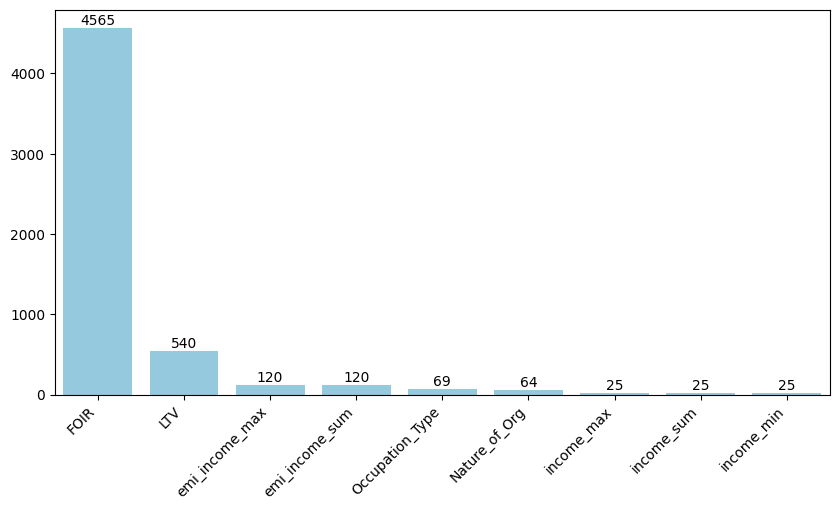

In [15]:
null = df.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=null.index[:9], y=null.values[:9], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
for index, value in null.head(9).items():
    ax.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## FOIR

Since, **FOIR** has the highest number of missing values, lets treat that first.

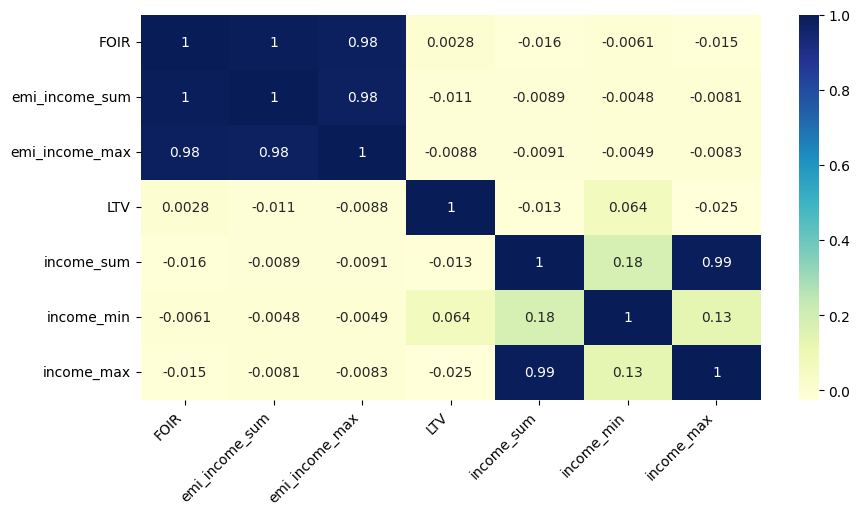

In [16]:
# Lets check the correlation of the numerical features with missing values
plt.figure(figsize=(10,5))
sns.heatmap(df[['FOIR','emi_income_sum','emi_income_max','LTV','income_sum','income_min','income_max']].corr(),annot=True,
           cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.show()

> It is evident from the above heatmap that, **FOIR** & **emi_income_sum** are perfectly correlated to with each other. So, we can drop either one of the features from further modelling and since **FOIR** has higher missing values than **emi_income_sum**, let us drop the former.

In [17]:
df1 = df.drop('FOIR',axis=1)

In [18]:
df1.shape

(13409, 32)

In [19]:
df1.isna().sum().sort_values(ascending=False)

LTV                       540
emi_income_max            120
emi_income_sum            120
Occupation_Type            69
Nature_of_Org              64
income_max                 25
income_sum                 25
income_min                 25
Status                      0
Open_TLs                    0
Sal_Flag                    0
All_TLs                     0
All_Delinquent_TL_24M       0
All_Vin_bureau              0
All_min_Vin_bureau          0
City_tier                   0
No_of_enq_All               0
Latest_Bureau_prd           0
Loan_sub_type_1             0
Organization_type           0
Channel_Code                0
Salaried_Self               0
Property_Insurance_Amt      0
Requested_Tenure            0
count_coapplicant           0
age_min                     0
age_max                     0
edu_min                     0
edu_max                     0
Doc_form_16                 0
Max_dependent               0
Bureau_TL                   0
dtype: int64

---

## Income_sum
According to the loan scheme:
* Minimum combined income of `Rs 10000/month`, is the basic eligibity criteria for applying for the loan. This can be used for basic filtering of the data.

In [20]:
df1 = df1[df1['income_sum']>10000]

In [21]:
df1.shape

(13200, 32)

In [22]:
df1.isna().sum().sort_values(ascending=False)

LTV                       486
emi_income_max             59
emi_income_sum             59
Occupation_Type            47
Nature_of_Org              42
All_TLs                     0
City_tier                   0
Loan_sub_type_1             0
Sal_Flag                    0
Status                      0
Open_TLs                    0
Channel_Code                0
All_min_Vin_bureau          0
All_Delinquent_TL_24M       0
No_of_enq_All               0
Latest_Bureau_prd           0
All_Vin_bureau              0
Organization_type           0
Salaried_Self               0
Property_Insurance_Amt      0
Requested_Tenure            0
count_coapplicant           0
age_min                     0
age_max                     0
edu_min                     0
edu_max                     0
income_min                  0
income_sum                  0
income_max                  0
Doc_form_16                 0
Max_dependent               0
Bureau_TL                   0
dtype: int64

* After filtering `income_sum`, we can see that the null values in `income_max`, `income_sum` & `income_min` have completely been removed.
* Other features like `LTV`, `emi_income_sum`, `emi_income_max`, `Occupation_Type` & `Nature_of_Org` have also experienced a reduction in the number of missing values.d.

---

## emi_income_sum

* The `emi_income_sum` is the ratio of emi to income, hence its value should be in the range (0,1)
* So, ratio going above 1 can be dismissed.

In [23]:
df1['emi_income_sum'].describe()

count    13141.000000
mean         0.463933
std          0.208095
min          0.002287
25%          0.354291
50%          0.485160
75%          0.586284
max          9.679978
Name: emi_income_sum, dtype: float64

In [24]:
df1['emi_income_sum'].skew()

12.933298444039446

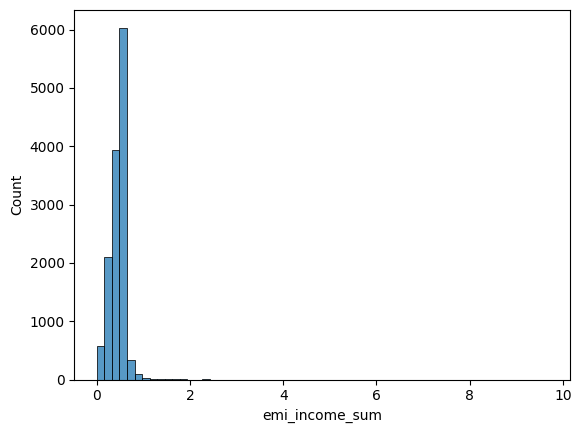

In [25]:
sns.histplot(data=df1, x='emi_income_sum', bins=60)
plt.show()

In [26]:
df1 = df1[df1['emi_income_sum'].between(0,1)]

In [27]:
df1.shape

(13074, 32)

In [28]:
df1['emi_income_sum'].describe()

count    13074.000000
mean         0.457364
std          0.152723
min          0.002287
25%          0.353537
50%          0.484157
75%          0.585579
max          0.998253
Name: emi_income_sum, dtype: float64

In [29]:
df1['emi_income_sum'].skew()

-0.4707812521139086

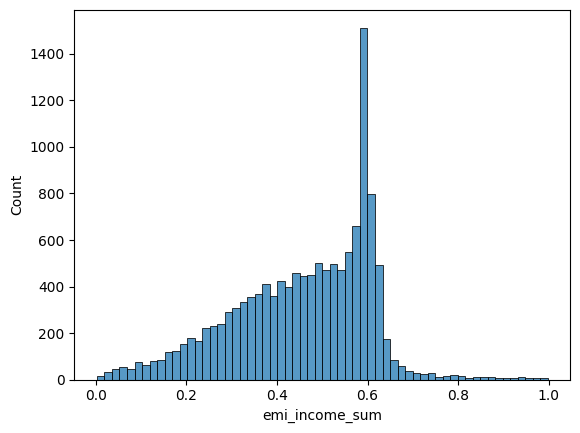

In [30]:
sns.histplot(data=df1, x='emi_income_sum', bins=60)
plt.show()

In [31]:
df1.isna().sum().sort_values(ascending=False)

LTV                       413
Occupation_Type            46
Nature_of_Org              41
All_TLs                     0
City_tier                   0
Loan_sub_type_1             0
Sal_Flag                    0
emi_income_max              0
emi_income_sum              0
Status                      0
Open_TLs                    0
Channel_Code                0
All_min_Vin_bureau          0
All_Delinquent_TL_24M       0
No_of_enq_All               0
Latest_Bureau_prd           0
All_Vin_bureau              0
Organization_type           0
Salaried_Self               0
Property_Insurance_Amt      0
Requested_Tenure            0
count_coapplicant           0
age_min                     0
age_max                     0
edu_min                     0
edu_max                     0
income_min                  0
income_sum                  0
income_max                  0
Doc_form_16                 0
Max_dependent               0
Bureau_TL                   0
dtype: int64

* We can see that, the null values in `emi_income_sum` and `emi_income_max` have been removed, and the count of other null values has also been reduced.

---

## Nature_of_Org

Let us do a `crosstab` analysis on `Nature_of_Org` and `Organization_type`

In [32]:
pd.crosstab(df1['Nature_of_Org'], df1['Organization_type'])

Organization_type                                   1.Others  2.Govt  \
Nature_of_Org                                                          
Director-Pvt. Ltd. Co. (Staff Less than 50)                0       0   
Director-Pvt. Ltd. Co. (Staff More than 50)                0       0   
Government                                                 0    1272   
MNC                                                        0       0   
Others                                                   760       0   
Partner-Partnership Firm (Staff Less than 10)              0       0   
Partner-Partnership Firm (Staff More than 10 & ...         0       0   
Partner-Partnership Firm (Staff More than 25)              0       0   
Private Ltd. Co.                                           0       0   
Proprietor-Proprietorship Firm (Staff Less than...         0       0   
Proprietor-Proprietorship Firm (Staff More than...         0       0   
Public Ltd. Co.                                            0       0   
Public Sector Undertaking                                  0      10   
Self Employed Professional                               210       0   

Organization_type                                   3.Private Ltd Co  \
Nature_of_Org                                                          
Director-Pvt. Ltd. Co. (Staff Less than 50)                      139   
Director-Pvt. Ltd. Co. (Staff More than 50)                       18   
Government                                                         0   
MNC                                                                0   
Others                                                             0   
Partner-Partnership Firm (Staff Less than 10)                     80   
Partner-Partnership Firm (Staff More than 10 & ...               107   
Partner-Partnership Firm (Staff More than 25)                    223   
Private Ltd. Co.                                                3412   
Proprietor-Proprietorship Firm (Staff Less than...              3386   
Proprietor-Proprietorship Firm (Staff More than...              2524   
Public Ltd. Co.                                                    0   
Public Sector Undertaking                                          0   
Self Employed Professional                                         0   

Organization_type                                   4.Public Ltd. Co.  5.MNC  
Nature_of_Org                                                                 
Director-Pvt. Ltd. Co. (Staff Less than 50)                         0      0  
Director-Pvt. Ltd. Co. (Staff More than 50)                         0      0  
Government                                                          0      0  
MNC                                                                 0    142  
Others                                                              0      0  
Partner-Partnership Firm (Staff Less than 10)                       0      0  
Partner-Partnership Firm (Staff More than 10 & ...                  0      0  
Partner-Partnership Firm (Staff More than 25)                       0      0  
Private Ltd. Co.                                                    0      0  
Proprietor-Proprietorship Firm (Staff Less than...                  0      0  
Proprietor-Proprietorship Firm (Staff More than...                  0      0  
Public Ltd. Co.                                                   750      0  
Public Sector Undertaking                                           0      0  
Self Employed Professional                                          0      0

* Based on the overlapping information identified between `Nature_of_Org` and `Organization_type` in the crosstab analysis, we can confidently drop `Nature_of_Org` from the dataset.
* This will not only avoid correlation issues but also eliminate the need for null value imputation in `Nature_of_Org`.

In [33]:
# Dropping Nature_of_Org
df1.drop('Nature_of_Org', axis=1, inplace=True)

In [34]:
df1.shape

(13074, 31)

In [35]:
df1.isna().sum().sort_values(ascending=False)

LTV                       413
Occupation_Type            46
Status                      0
Channel_Code                0
Latest_Bureau_prd           0
No_of_enq_All               0
All_Delinquent_TL_24M       0
All_min_Vin_bureau          0
All_Vin_bureau              0
Open_TLs                    0
All_TLs                     0
emi_income_sum              0
emi_income_max              0
Sal_Flag                    0
Loan_sub_type_1             0
City_tier                   0
Organization_type           0
Salaried_Self               0
Property_Insurance_Amt      0
Requested_Tenure            0
count_coapplicant           0
age_min                     0
age_max                     0
edu_min                     0
edu_max                     0
income_min                  0
income_sum                  0
income_max                  0
Doc_form_16                 0
Max_dependent               0
Bureau_TL                   0
dtype: int64

## Occupation_Type

Let us do a crosstab analysis on `Occupation_Type`, `Salaried_Self` and `Sal_Flag`

In [36]:
pd.crosstab(df1['Salaried_Self'], df1['Sal_Flag'])

Sal_Flag       NONSAL   SAL
Salaried_Self              
OTHERS             66     0
SALARIED            0  7111
SELF_EMP         5897     0

In [37]:
pd.set_option("display.max_rows", None)

In [38]:
pd.crosstab(df1['Occupation_Type'], df1['Sal_Flag'])

Sal_Flag              NONSAL   SAL
Occupation_Type                   
ACCOUNTANT                 3     6
ADMINSTRATOR               1     1
ADVISOR                    4     0
AGENT                     22     0
AGRICULTURIST              1     0
ATTORNEY AT LAW            1     0
BANKS SERVICE              1     4
BUSINESSMAN               37     0
CARPENTER                  5     1
CLERK                      0     1
COMPANY                    0     1
CONSULTANT                 3     0
CONTRACTOR                32     0
DIRECTOR                   8     0
DOCTOR-SALARIED            0     5
DOCTOR-SELF EMPLOYED      18     0
DRIVER                    10     1
Defence (NCO)              0     1
ENGINEERING                3     1
EXECUTIVE ASSISTANT        0     4
GENARAL RETAILER           1     0
GOVERNMENT SERVICE         0    97
HAIRDRESSER                1     0
HOUSEWIFE                  3     0
INDUSTRY                   1     0
INSPECTOR                  0     1
JEWELLER                   4     0
JOURNALIST                 1     0
LABOURER                   1     0
LECTURER                   0     2
MANAGER                    1     8
MANUAL                     1     0
MANUFACTURING            328     3
MEDIUM FLEETOPERATOR       1     0
OFFICER                    2     5
OPERATOR                   0     1
OTHERS                   322    41
OVERSEER                   1     0
PENSIONER                  0     1
POLICEMAN                  0     3
PRIVATE TAILOR             1     2
PROGRAMMER                 1     0
PROPRIETOR              2314     3
RETAIL                     5     0
RETAIL TRANSPORTER         2     0
SAL(RETIRAL AGE 58)        0   437
SAL(RETIRAL AGE 60)        0   223
SALARIED                   4  5633
SALESMAN                   0     6
SECRETARY                  0     1
SELF-EMPLOYED           1139     3
SERV-PRIVATE SECTOR        0   356
SERV-PUBLIC SECTOR         0    58
SERVICES                1095   173
STOCK BR(S)NON-COMMD       1     0
Salaried                   0    12
TAXI DRIVER                2     0
TEACHER                    3     6
TECHNICIAN                 0     2
TRADER                     9     0
TRADING                  530     2

In [39]:
pd.crosstab(df1['Occupation_Type'], df1['Salaried_Self'])

Salaried_Self         OTHERS  SALARIED  SELF_EMP
Occupation_Type                                 
ACCOUNTANT                 0         6         3
ADMINSTRATOR               0         1         1
ADVISOR                    0         0         4
AGENT                      0         0        22
AGRICULTURIST              0         0         1
ATTORNEY AT LAW            0         0         1
BANKS SERVICE              0         4         1
BUSINESSMAN                0         0        37
CARPENTER                  0         1         5
CLERK                      0         1         0
COMPANY                    0         1         0
CONSULTANT                 0         0         3
CONTRACTOR                 0         0        32
DIRECTOR                   0         0         8
DOCTOR-SALARIED            0         5         0
DOCTOR-SELF EMPLOYED       0         0        18
DRIVER                     0         1        10
Defence (NCO)              0         1         0
ENGINEERING                0         1         3
EXECUTIVE ASSISTANT        0         4         0
GENARAL RETAILER           0         0         1
GOVERNMENT SERVICE         0        97         0
HAIRDRESSER                0         0         1
HOUSEWIFE                  2         0         1
INDUSTRY                   0         0         1
INSPECTOR                  0         1         0
JEWELLER                   0         0         4
JOURNALIST                 0         0         1
LABOURER                   0         0         1
LECTURER                   0         2         0
MANAGER                    0         8         1
MANUAL                     0         0         1
MANUFACTURING              0         3       328
MEDIUM FLEETOPERATOR       0         0         1
OFFICER                    1         5         1
OPERATOR                   0         1         0
OTHERS                     6        41       316
OVERSEER                   0         0         1
PENSIONER                  0         1         0
POLICEMAN                  0         3         0
PRIVATE TAILOR             0         2         1
PROGRAMMER                 0         0         1
PROPRIETOR                13         3      2301
RETAIL                     0         0         5
RETAIL TRANSPORTER         0         0         2
SAL(RETIRAL AGE 58)        0       437         0
SAL(RETIRAL AGE 60)        0       223         0
SALARIED                   0      5633         4
SALESMAN                   0         6         0
SECRETARY                  0         1         0
SELF-EMPLOYED              4         3      1135
SERV-PRIVATE SECTOR        0       356         0
SERV-PUBLIC SECTOR         0        58         0
SERVICES                   7       173      1088
STOCK BR(S)NON-COMMD       0         0         1
Salaried                   0        12         0
TAXI DRIVER                0         0         2
TEACHER                    0         6         3
TECHNICIAN                 0         2         0
TRADER                     0         0         9
TRADING                    2         2       528

* Based on the overlapping information identified between `Occupation_Type`, `Salaried_Self` and `Sal_Flag` in the crosstab analysis, we can drop `Occupation_Type` from the dataset.
*
This will not only avoid multicollinearity issues but also eliminate the need for null value imputation in`Occupation_Type`.

In [40]:
# Dropping Occupation_Type
df1.drop('Occupation_Type', axis=1, inplace=True)

In [41]:
pd.reset_option('max_rows')

In [42]:
df1.shape

(13074, 30)

In [43]:
df1.isna().sum().sort_values(ascending=False)

LTV                       413
Status                      0
Channel_Code                0
Latest_Bureau_prd           0
No_of_enq_All               0
All_Delinquent_TL_24M       0
All_min_Vin_bureau          0
All_Vin_bureau              0
Open_TLs                    0
All_TLs                     0
emi_income_sum              0
emi_income_max              0
Sal_Flag                    0
Loan_sub_type_1             0
City_tier                   0
Salaried_Self               0
Max_dependent               0
Organization_type           0
Property_Insurance_Amt      0
Requested_Tenure            0
count_coapplicant           0
age_min                     0
age_max                     0
edu_min                     0
edu_max                     0
income_min                  0
income_sum                  0
income_max                  0
Doc_form_16                 0
Bureau_TL                   0
dtype: int64

---

## LTV

In [44]:
df1['LTV'].describe()

count    12661.000000
mean         0.606863
std          0.186683
min          0.009176
25%          0.481611
50%          0.628475
75%          0.768154
max          1.181818
Name: LTV, dtype: float64

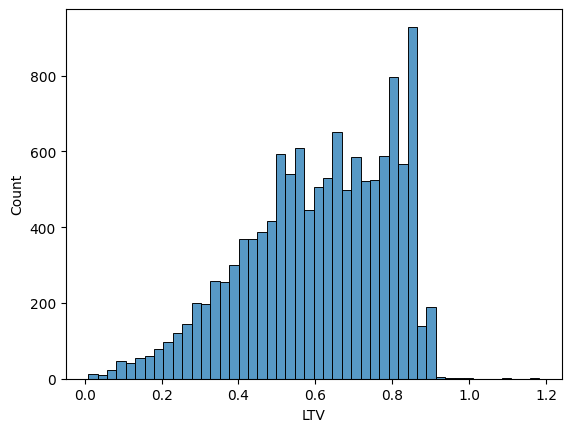

In [45]:
sns.histplot(data=df1, x='LTV')
plt.show()

In [46]:
df1['LTV'].skew()

-0.525170766135771

* Here, we can see that the distribution is `left-skewed` and hence `median` imputation for missing values can be used.

In [47]:
df1['LTV'].fillna(df1['LTV'].median(), inplace=True)

In [48]:
df1.isna().sum()

Status                    0
Max_dependent             0
LTV                       0
Doc_form_16               0
income_max                0
income_sum                0
income_min                0
edu_max                   0
edu_min                   0
age_max                   0
age_min                   0
count_coapplicant         0
Requested_Tenure          0
Property_Insurance_Amt    0
Organization_type         0
Salaried_Self             0
Channel_Code              0
City_tier                 0
Loan_sub_type_1           0
Sal_Flag                  0
emi_income_max            0
emi_income_sum            0
All_TLs                   0
Open_TLs                  0
All_Vin_bureau            0
All_min_Vin_bureau        0
All_Delinquent_TL_24M     0
No_of_enq_All             0
Latest_Bureau_prd         0
Bureau_TL                 0
dtype: int64

* **All missing values have been dealt with.**

---

# Creating Interaction Features
Let's create a few new features based on the existing ones viz. `emi_income_sum`, `income_sum`, `Requested_Tenure`, `LTV` and see how they perform.

## EMI

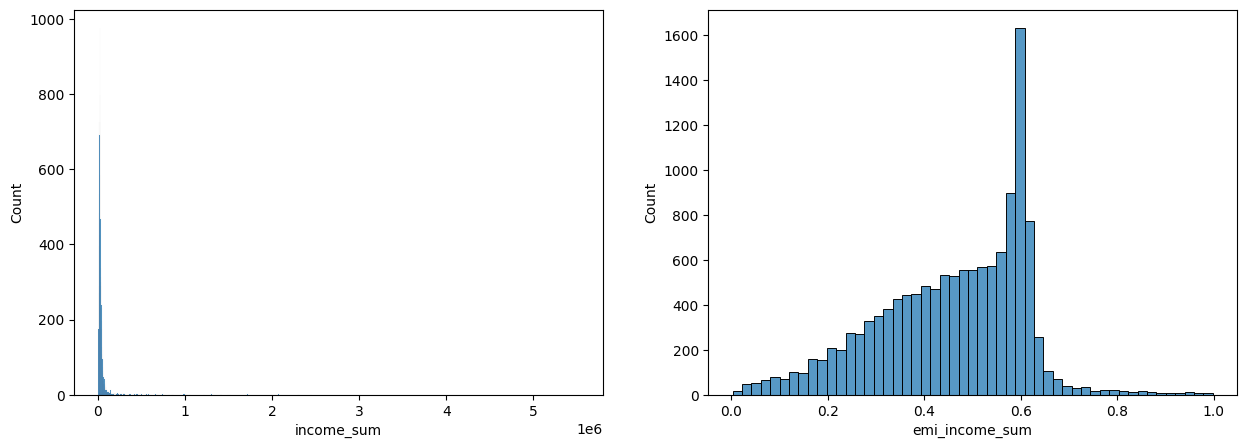

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df1, x='income_sum')
plt.subplot(1,2,2)
sns.histplot(data=df1, x='emi_income_sum')
plt.show()

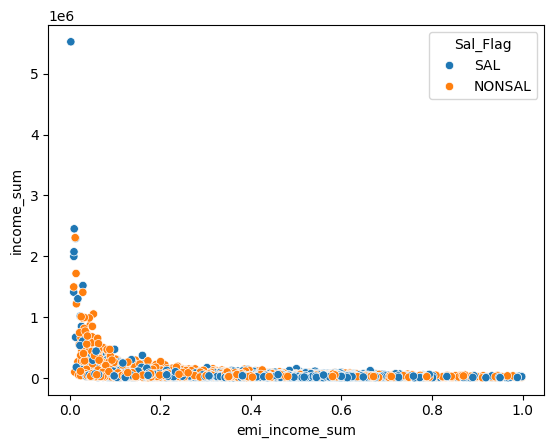

In [50]:
sns.scatterplot(data=df1, x='emi_income_sum', y='income_sum', hue='Sal_Flag')
plt.show()

In [51]:
# EMI amount from income & emi_ratio
df1['EMI'] = df1['income_sum'] * df1['emi_income_sum']

In [52]:
df1['EMI'].dtype

dtype('float64')

In [53]:
df1['EMI'].describe()

count    13074.000000
mean     14764.602880
std       7756.378109
min       1080.000020
25%       9486.999992
50%      13058.000006
75%      18071.000008
max      84891.000027
Name: EMI, dtype: float64

In [54]:
df1['EMI'] = df1['EMI'].astype('int64')

In [55]:
#np.argmax(df1['EMI'])

In [56]:
#df1.iloc[9375]

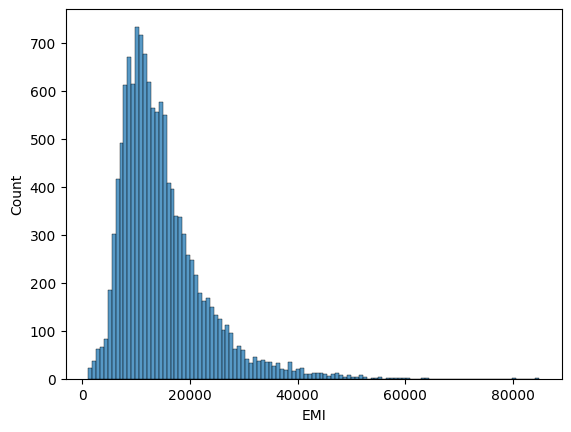

In [57]:
sns.histplot(data=df1, x='EMI')
plt.show()

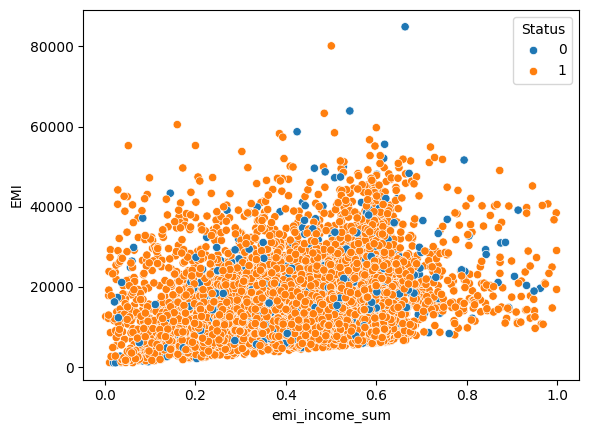

In [58]:
sns.scatterplot(data=df1, x='emi_income_sum', y='EMI', hue='Status')
plt.show()

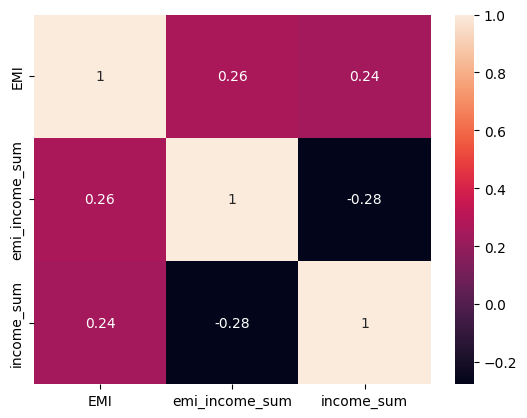

In [59]:
# Correlation of EMI with emi_income_sum, income_sum
sns.heatmap(df1[['EMI','emi_income_sum','income_sum']].corr(), annot=True)
plt.show()

---

## Amount Left

In [60]:
# Total amount left after payment of emi
df1['amt_left'] = df1['income_sum'] - df1['EMI']

In [61]:
df1.shape

(13074, 32)

In [62]:
df1['amt_left'].describe()

count    1.307400e+04
mean     2.548071e+04
std      8.464123e+04
min      3.391670e+01
25%      1.028544e+04
50%      1.486325e+04
75%      2.311012e+04
max      5.508373e+06
Name: amt_left, dtype: float64

In [63]:
df1['amt_left'] = df1['amt_left'].astype('int64')

In [64]:
df1['amt_left'].skew()

31.546489097348104

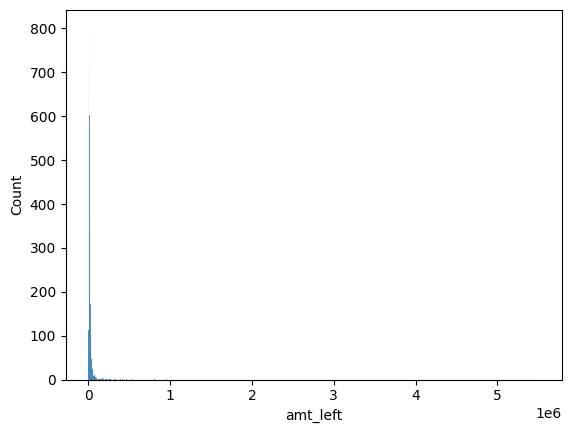

In [65]:
sns.histplot(data=df1, x='amt_left')
plt.show()

In [66]:
#np.argmax(df1['amt_left'])

In [67]:
#df1.iloc[1884]

---

## Yearly Tenures

In [68]:
# Converting the monthly requested tenures to yearly tenures
df1['Tenure_Years'] = df1['Requested_Tenure']/12

In [69]:
df1.shape

(13074, 33)

In [70]:
df1['Tenure_Years'].describe()

count    13074.000000
mean        19.352678
std          5.195116
min          2.000000
25%         15.000000
50%         20.000000
75%         20.000000
max         30.000000
Name: Tenure_Years, dtype: float64

In [71]:
df1['Tenure_Years'] = df1['Tenure_Years'].astype('int64')

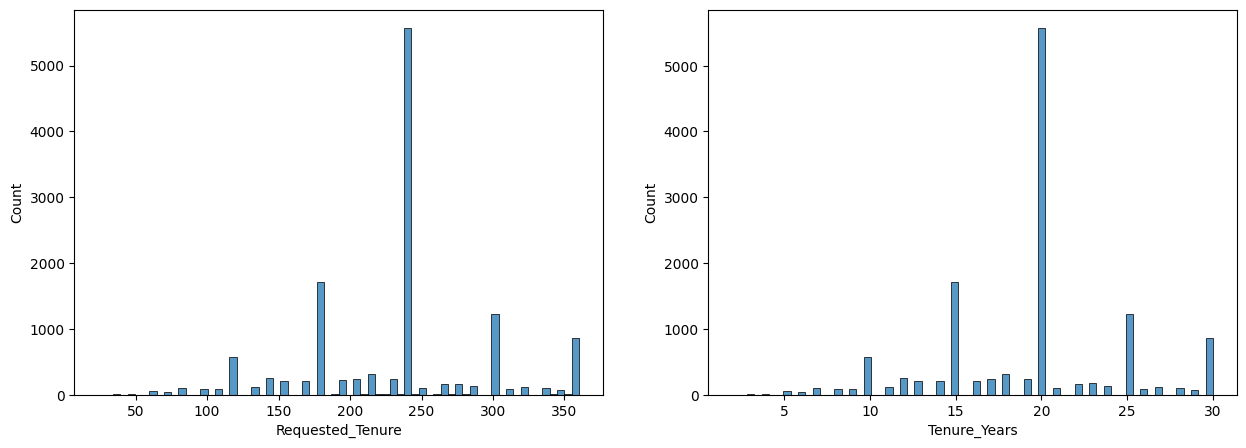

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df1, x='Requested_Tenure')
plt.subplot(1,2,2)
sns.histplot(data=df1, x='Tenure_Years')
plt.show()

---

## Loan Eligible

In [73]:
# Calculating the amount of loan eligible for a burrower
def loan_calculator(p,r,t):
    r = r/(12 * 100) # monthly interest rate
    t = t * 12 # time in month
    loan_amt = p/((r * pow(1+r, t))/(pow(1+r, t) -1)) #
    return loan_amt

In [74]:
# Applying the above function to create a new feature of Loan_eligible
df1['Loan_Eligible'] = df1.apply(lambda i: loan_calculator(i['amt_left'], 7, i['Tenure_Years']), axis=1)

In [75]:
df1.shape

(13074, 34)

In [76]:
df1['Loan_Eligible'].describe()

count    1.307400e+04
mean     3.104652e+06
std      1.057575e+07
min      3.031945e+03
25%      1.256580e+06
50%      1.836840e+06
75%      2.843321e+06
max      7.546552e+08
Name: Loan_Eligible, dtype: float64

In [77]:
df1['Loan_Eligible'] = df1['Loan_Eligible'].astype('int64')

In [78]:
df1['Loan_Eligible'].skew()

36.87772211245301

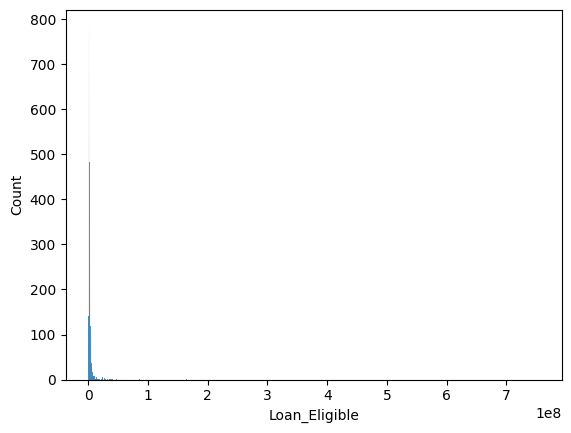

In [79]:
sns.histplot(data=df1, x='Loan_Eligible')
plt.show()

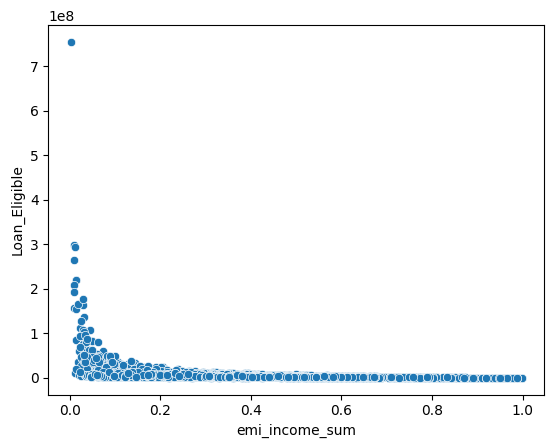

In [80]:
sns.scatterplot(data=df1, y='Loan_Eligible', x='emi_income_sum')
plt.show()

In [81]:
#np.argmin(df1['Loan_Eligible'])

In [82]:
#df1.iloc[10005]

---

## Property Value

In [83]:
# Creating feature for property value from LTV & loan_eligible
df1['Property_Value'] = df1['Loan_Eligible'] / df1['LTV']

In [84]:
df1.shape

(13074, 35)

In [85]:
df1['Property_Value'].describe()

count    1.307400e+04
mean     6.597694e+06
std      6.719181e+07
min      3.709944e+03
25%      2.051240e+06
50%      3.062477e+06
75%      5.145655e+06
max      7.387714e+09
Name: Property_Value, dtype: float64

In [86]:
df1['Property_Value'] = df1['Property_Value'].astype('int64')

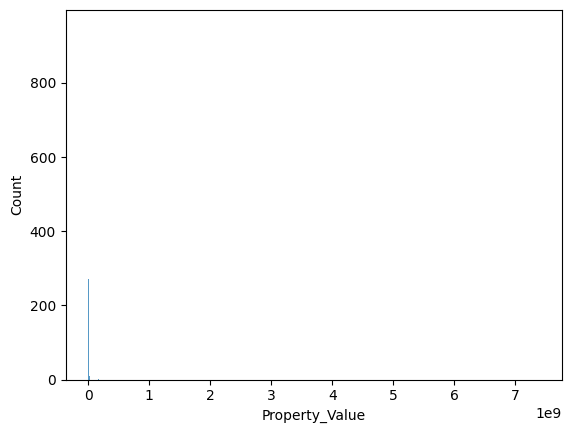

In [87]:
sns.histplot(data=df1, x='Property_Value')
plt.show()

In [88]:
#np.argmin(df1['Property_Value'])

In [89]:
#df1.iloc[7456]

---

# Backing up the dataframe

In [90]:
df1_new_features = df1.copy(deep=True)

In [91]:
#df1_new_features.head()

---

# Outliers & Skewness Management

In [92]:
num1 =['income_sum','income_min', 'income_max', 'LTV','age_max','age_min',
       'Tenure_Years','EMI','amt_left', 'Property_Insurance_Amt','Loan_Eligible',
       'Property_Value','emi_income_sum', 'emi_income_max','All_Vin_bureau','All_min_Vin_bureau',]

## Boxplot for checking the outliers visually

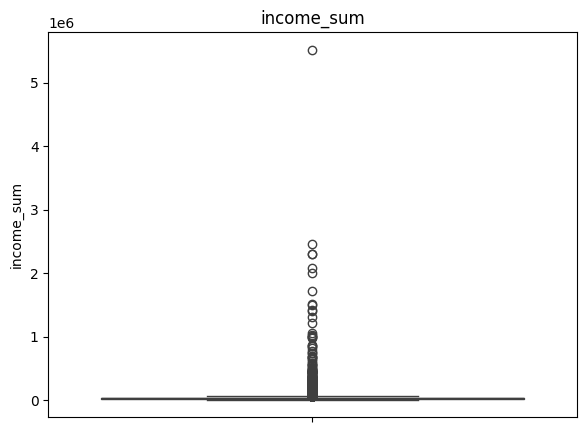

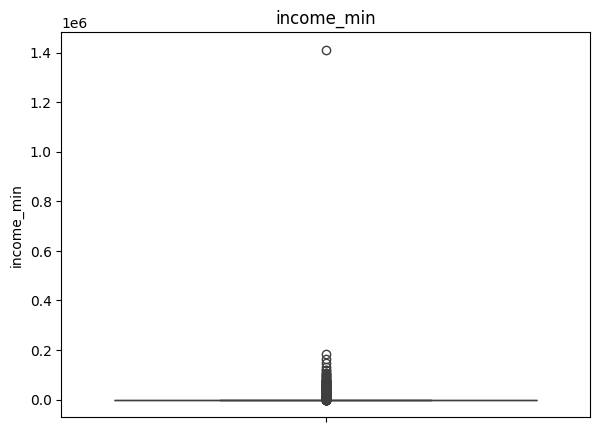

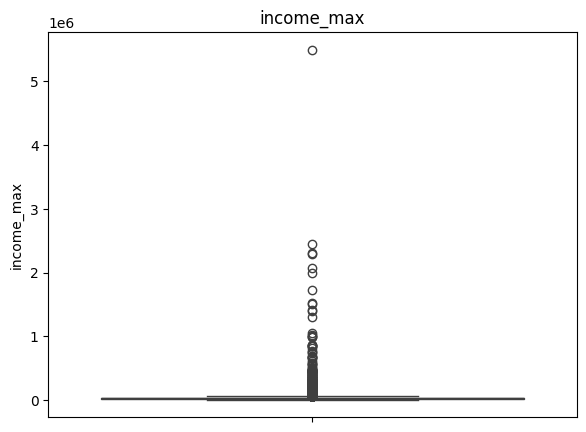

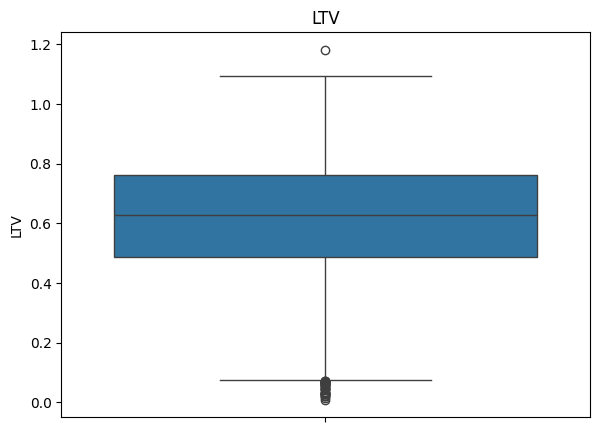

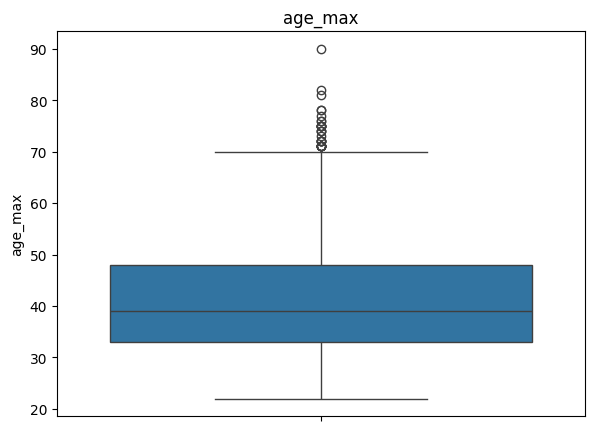

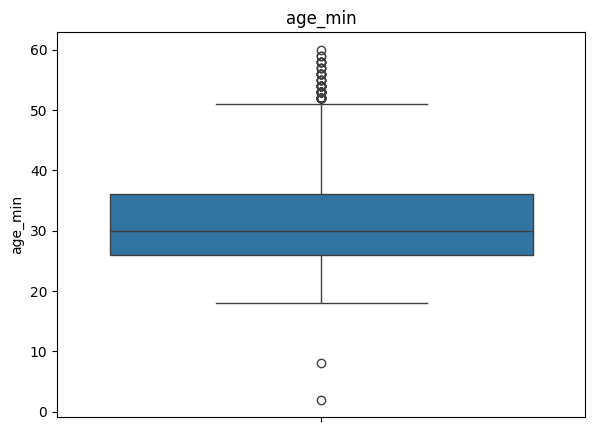

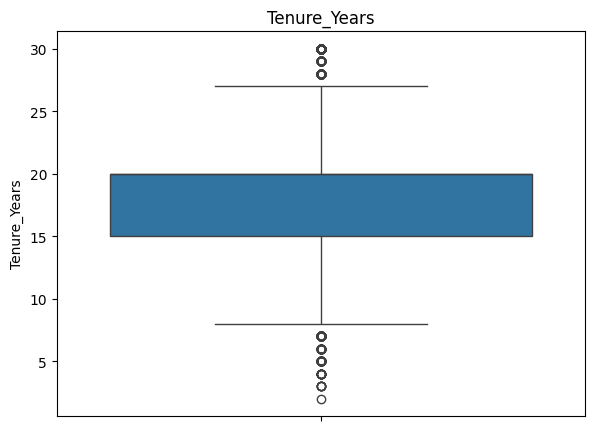

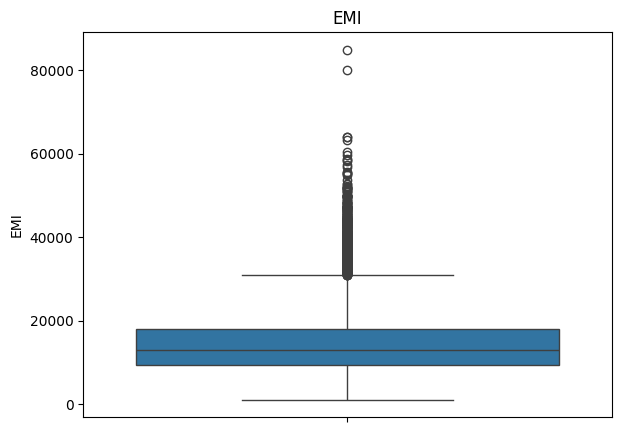

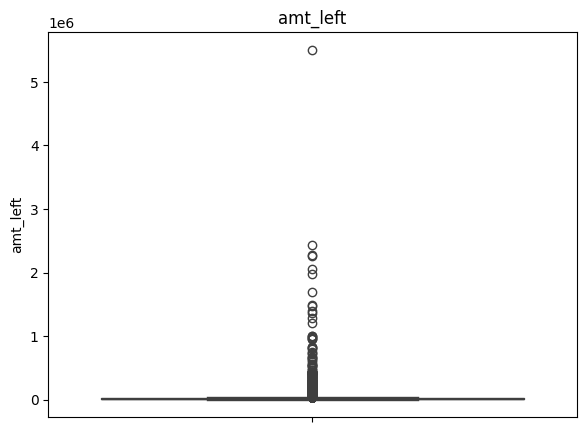

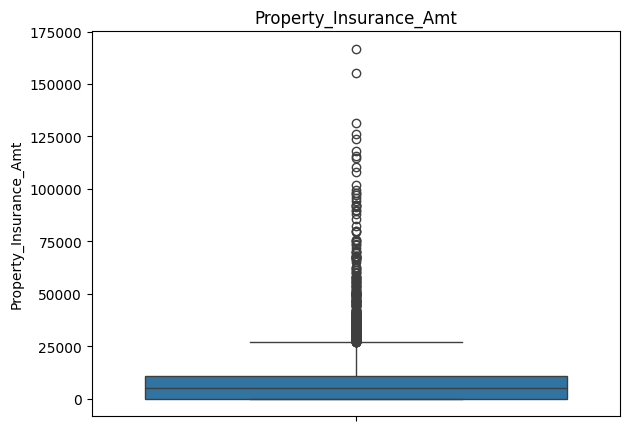

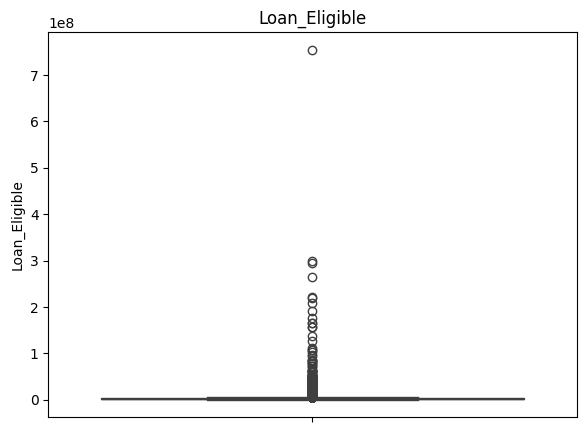

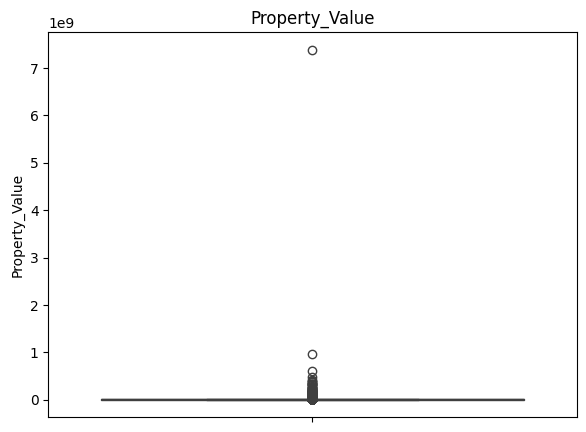

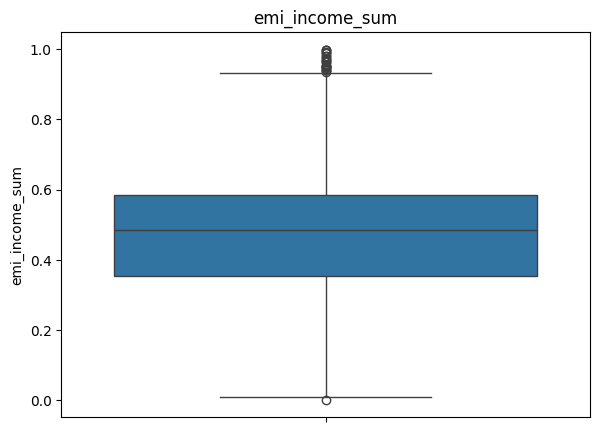

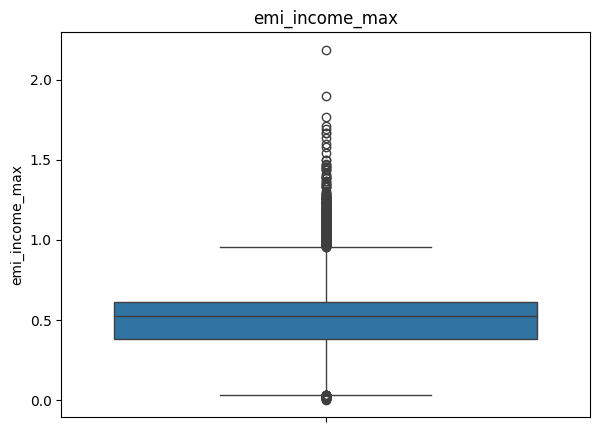

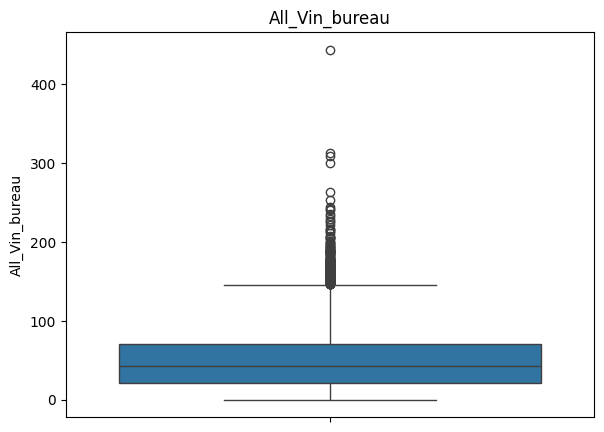

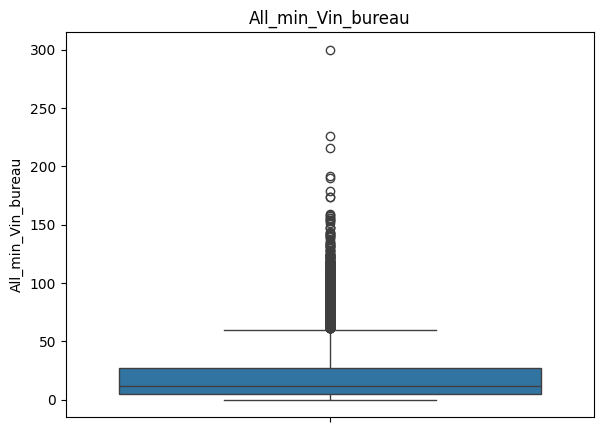

In [93]:
for i in num1:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.boxplot(df1[i])
    plt.title(i)

## Distplot

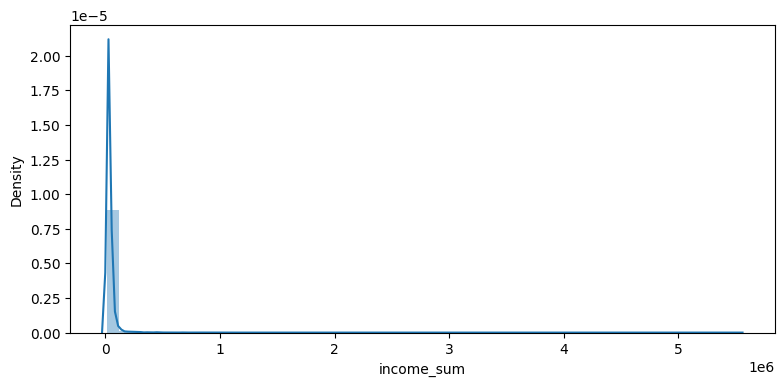

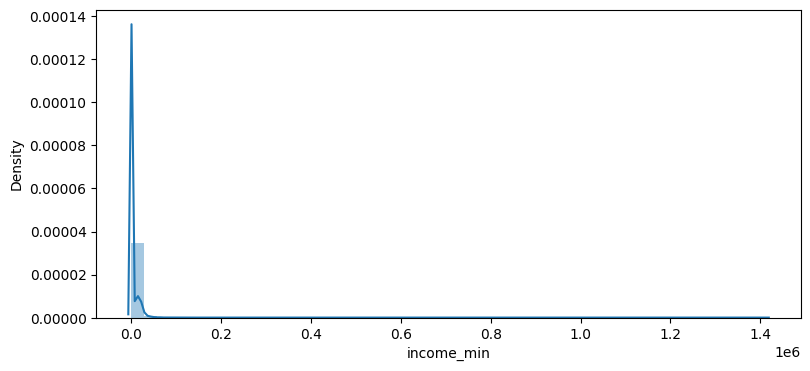

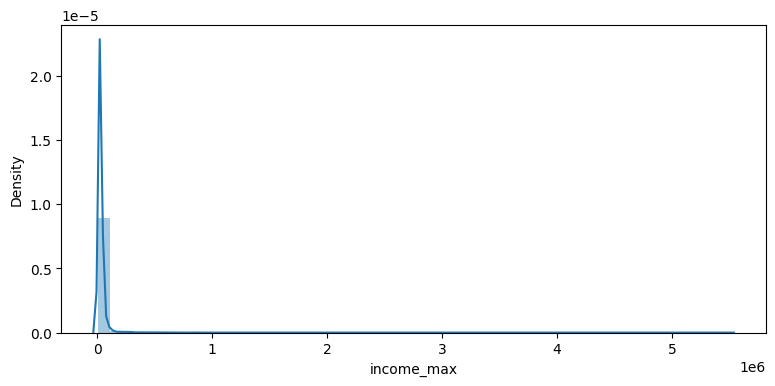

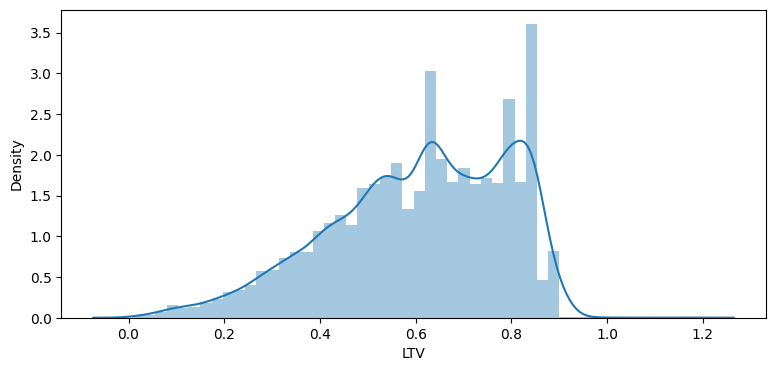

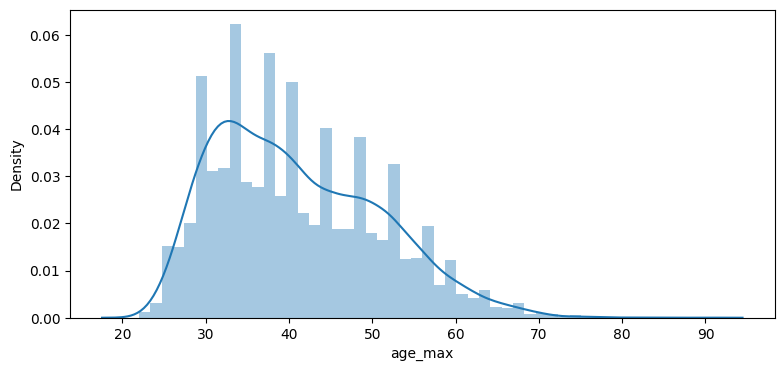

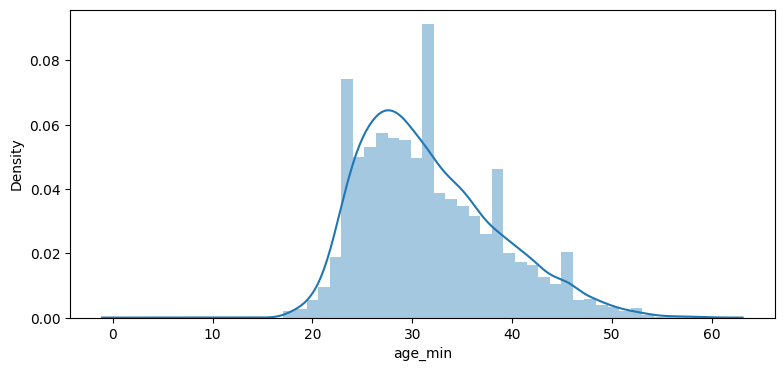

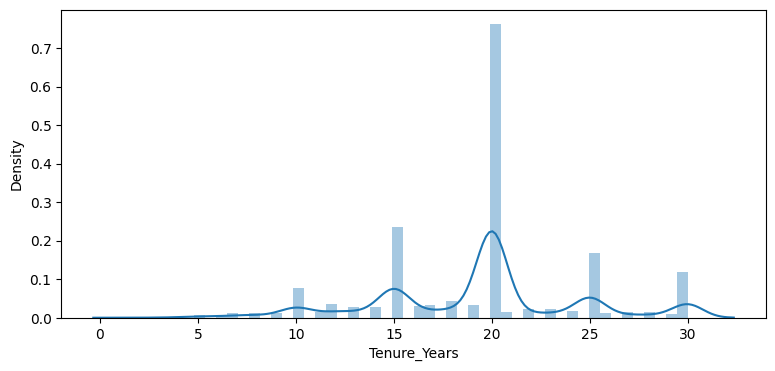

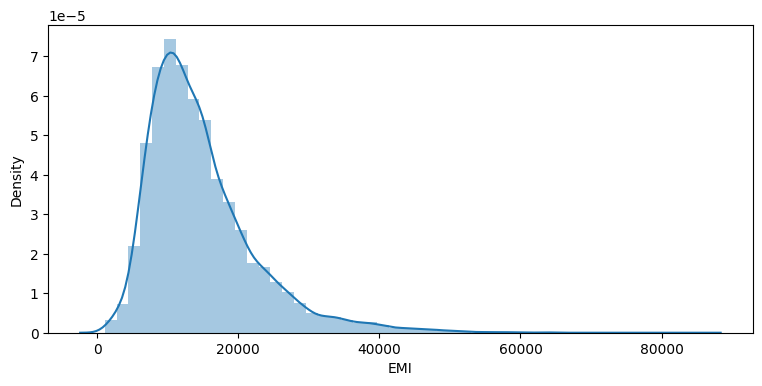

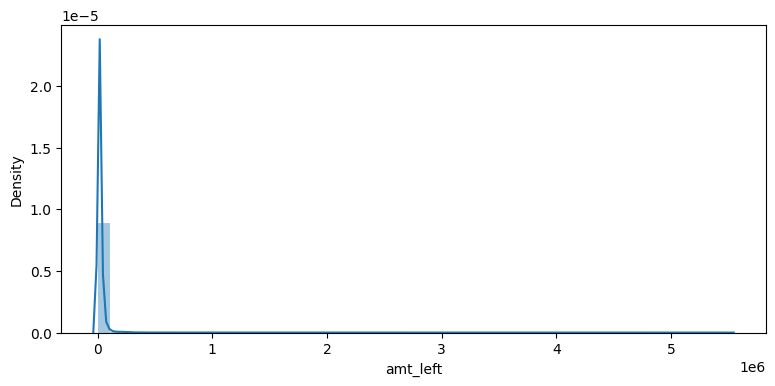

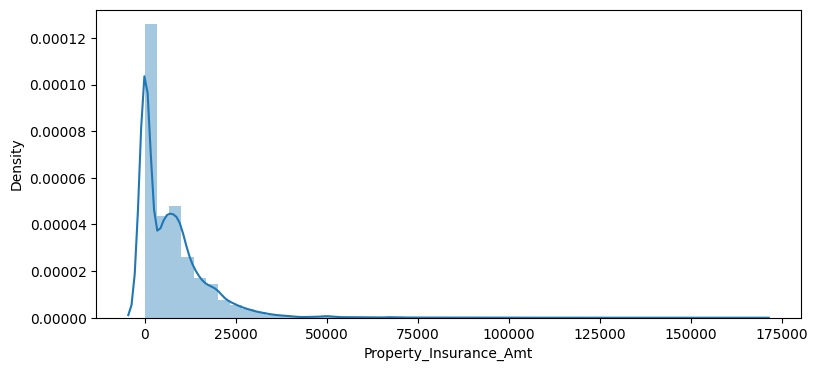

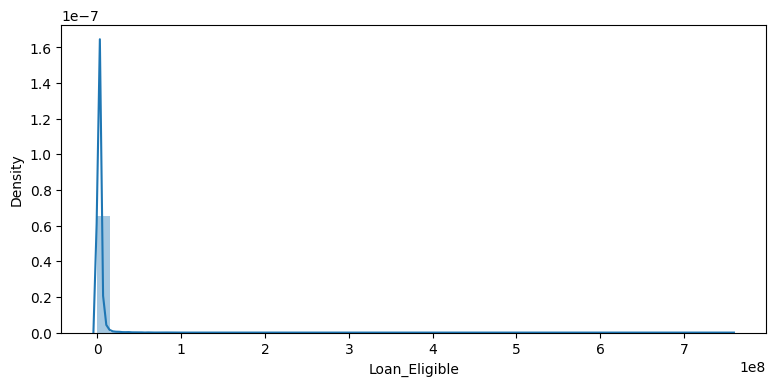

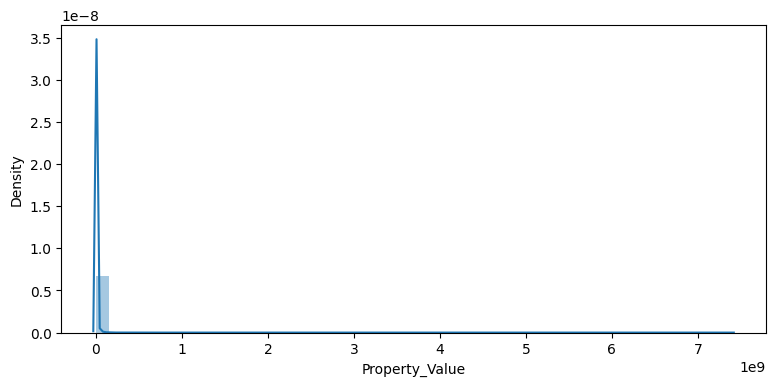

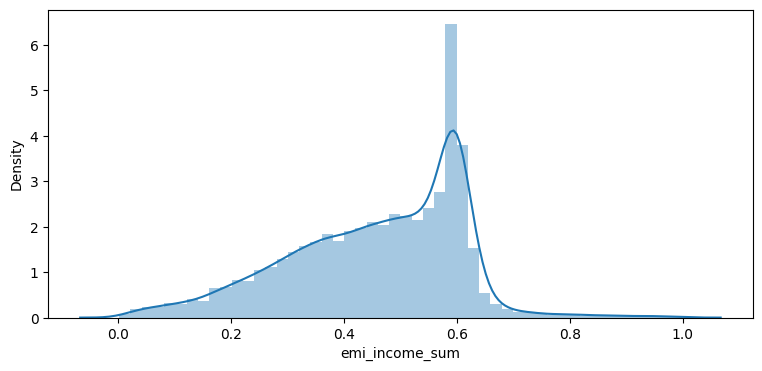

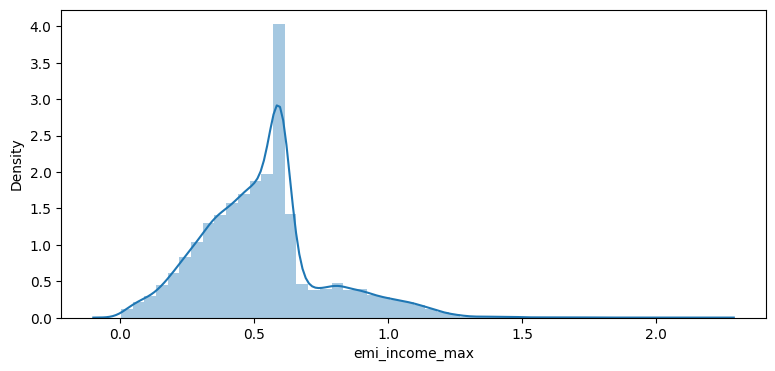

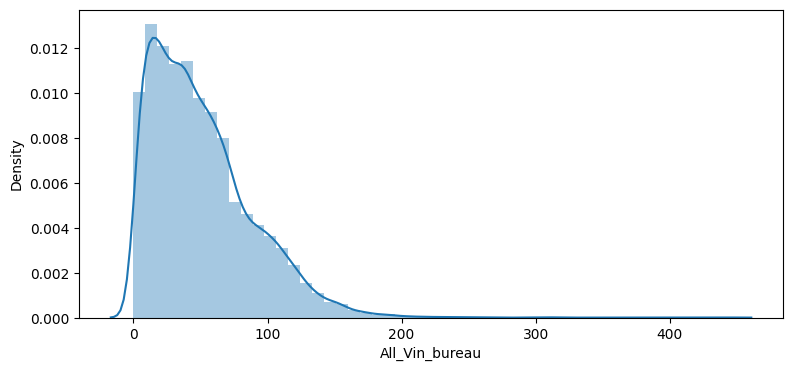

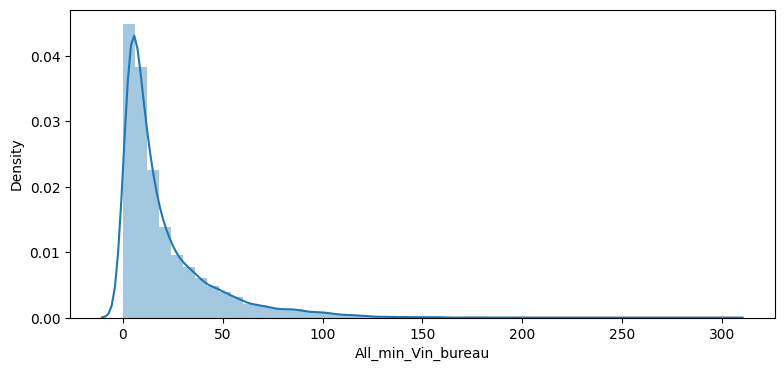

In [94]:
for i in num1:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df1[i], kde=True)
    plt.xlabel(i)

## Skewness of the features
Let's check for the skewness of the variables.

In [95]:
skewed = []
not_skewed = []

for i in num1:
    if df1[i].skew() > -0.5 and df1[i].skew() < 0.5:
        print(i, ',', round(df1[i].skew(),2), ': The feature is considered normal.\n')
        not_skewed.append(i)
    else:
        print(i, ',', round(df1[i].skew(),2),': This is a skewed feature.\n')
        skewed.append(i)

income_sum , 30.14 : This is a skewed feature.

income_min , 59.23 : This is a skewed feature.

income_max , 30.79 : This is a skewed feature.

LTV , -0.54 : This is a skewed feature.

age_max , 0.57 : This is a skewed feature.

age_min , 0.71 : This is a skewed feature.

Tenure_Years , -0.07 : The feature is considered normal.

EMI , 1.65 : This is a skewed feature.

amt_left , 31.55 : This is a skewed feature.

Property_Insurance_Amt , 3.62 : This is a skewed feature.

Loan_Eligible , 36.88 : This is a skewed feature.

Property_Value , 101.87 : This is a skewed feature.

emi_income_sum , -0.47 : The feature is considered normal.

emi_income_max , 0.73 : This is a skewed feature.

All_Vin_bureau , 1.15 : This is a skewed feature.

All_min_Vin_bureau , 2.32 : This is a skewed feature.



In [96]:
len(not_skewed), len(skewed)

(2, 14)

* We can see that majority of the features are skewed, and hence outlier detection can be done using `IQR` method to find the number of outliers. The skewed features are:

In [97]:
skewed

['income_sum',
 'income_min',
 'income_max',
 'LTV',
 'age_max',
 'age_min',
 'EMI',
 'amt_left',
 'Property_Insurance_Amt',
 'Loan_Eligible',
 'Property_Value',
 'emi_income_max',
 'All_Vin_bureau',
 'All_min_Vin_bureau']

In [98]:
not_skewed

['Tenure_Years', 'emi_income_sum']

### Visualising the skew

In [99]:
sk = {'income_sum':30.14, 'income_min':59.23, 'income_max':30.79, 'LTV':-0.54, 'age_max':0.57, 'age_min':0.71,
      'Tenure_Years':-0.07, 'EMI':1.65, 'amt_left':31.55, 'Property_Insurance_Amt':3.62, 'Loan_Eligible':36.88,
      'Property_Value':101.87, 'emi_income_sum':-0.47, 'emi_income_max':0.73, 'All_Vin_bureau':1.15,
      'All_min_Vin_bureau':2.32}

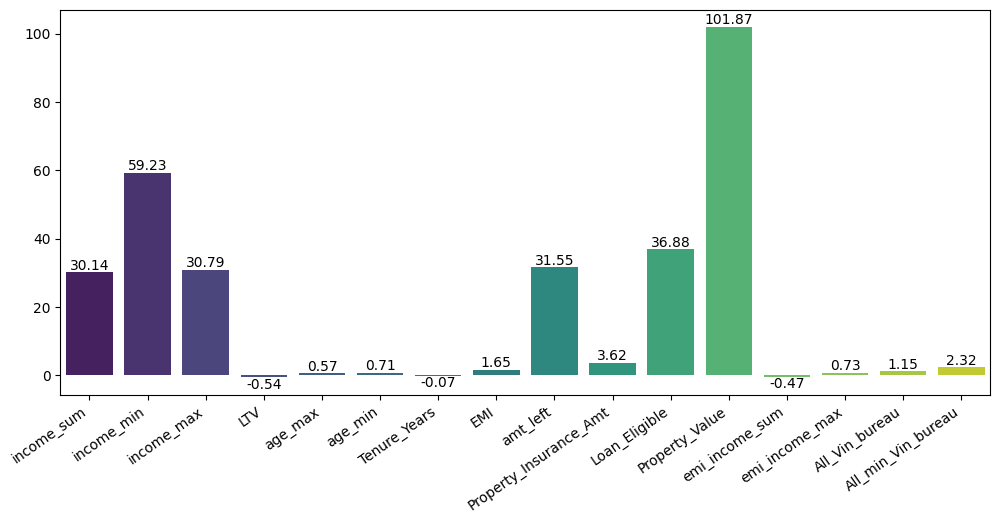

In [100]:
# Create a diverging color palette
color_palette = sns.diverging_palette(220, 20, as_cmap=True)
colors = color_palette(range(len(sk)))
# Create a bar plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=list(sk.keys()), y=list(sk.values()), palette='viridis')

# Add text labels on top of each bar
for i, v in enumerate(sk.values()):
    if v >= 0:
        ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    else:
        ax.text(i, v - 0.02, f'{v:.2f}', ha='center', va='top', fontsize=10, color='black')

# Customize plot
plt.xticks(rotation=35, ha="right")  # Rotate x-axis labels for better visibility
#plt.xlabel("Variables")
#plt.ylabel("Skewness")
#plt.title("Skewness of Each Variable")

# Show the plot
plt.show()

## Calculating the number & range of Outliers

### Using IQR for the skewed features

In [101]:
# Setting a threshold for identifying outliers using IQR
iqr_threshold = 1.5

# Calculating IQR for the features
outliers_accumulated = []

for i in skewed:
    # Calculating Q1 and Q3
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)

    # Calculating IQR
    iqr = q3 - q1

    # Calculating lower and upper bounds based on IQR
    lb = q1 - iqr_threshold * iqr
    ub = q3 + iqr_threshold * iqr

    # Outliers based on IQR
    outliers_skewed_iqr = df1[(df1[i] < lb) | (df1[i] > ub)]
    outliers_accumulated.append(outliers_skewed_iqr)

    # Print the number of outliers
    print('\nNo of Outliers in {} using IQR is'.format(i), len(outliers_skewed_iqr))
    print('\nRange of Outliers in {} using IQR is'.format(i), lb, ub)

# Print the total number of outliers across all features
total_outliers = pd.concat(outliers_accumulated)
print('\nTotal number of outliers across all features using IQR is', len(total_outliers))


No of Outliers in income_sum using IQR is 964

Range of Outliers in income_sum using IQR is -5750.279250000003 68447.79875

No of Outliers in income_min using IQR is 2717

Range of Outliers in income_min using IQR is 0.0 0.0

No of Outliers in income_max using IQR is 1042

Range of Outliers in income_max using IQR is -2472.781224999999 57454.635375

No of Outliers in LTV using IQR is 39

Range of Outliers in LTV using IQR is 0.07407092749999994 1.1769213115000001

No of Outliers in age_max using IQR is 32

Range of Outliers in age_max using IQR is 10.5 70.5

No of Outliers in age_min using IQR is 82

Range of Outliers in age_min using IQR is 11.0 51.0

No of Outliers in EMI using IQR is 558

Range of Outliers in EMI using IQR is -3391.5 30948.5

No of Outliers in amt_left using IQR is 1098

Range of Outliers in amt_left using IQR is -8951.5 42346.5

No of Outliers in Property_Insurance_Amt using IQR is 475

Range of Outliers in Property_Insurance_Amt using IQR is -16302.0 27170.0

No 

### Analysing the outliers calculated

In [102]:
#income_sum_outliers['income_sum'].describe()

In [103]:
#(income_sum_outliers['income_sum'] > 68447.79875).sum()

In [104]:
#outliers_skewed_iqr.shape

In [105]:
#total_outliers.shape

In [106]:
#income_sum_outliers = outliers_accumulated[0]

In [107]:
#LTV_outliers = outliers_accumulated[3]

In [108]:
#age_max_outliers = outliers_accumulated[4]
#age_min_outliers = outliers_accumulated[5]
#EMI_outliers = outliers_accumulated[6]
#amt_left_outliers = outliers_accumulated[7]
#Property_Insurance_Amt_outliers = outliers_accumulated[8]
#Loan_Eligible_outliers = outliers_accumulated[9]
#Property_Value_outliers = outliers_accumulated[10]
#Revenue_outliers = outliers_accumulated[11]

In [109]:
#income_sum_outliers.describe()

In [110]:
#sns.histplot(income_sum_outliers['income_sum'], bins=100)
#plt.show()

In [111]:
#LTV_outliers.describe()

In [112]:
#age_max_outliers

In [113]:
#Loan_Eligible_outliers['Loan_Eligible'].describe()

In [114]:
#plt.figure(figsize=(7,5))
#sns.histplot(df1['Loan_Eligible'], bins=100)
#plt.show()

In [115]:
#sns.histplot(LTV_outliers['LTV'], bins=100)
#plt.show()

In [116]:
#sns.scatterplot(x=EMI_outliers['amt_left'], y=EMI_outliers['Loan_Eligible'])#bins=100)
#plt.show()

In [117]:
#Loan_Eligible_outliers.describe()

In [118]:
#sns.histplot(income_sum_outliers['income_sum'], bins=200)
#plt.show()

In [119]:
#sns.histplot(Property_Insurance_Amt_outliers['Property_Value'], bins=200)
#plt.show()

In [120]:
#Property_Insurance_Amt_outliers.head(10)

### Using the empirical rule (3rd std from the mean, 99.7%) for the non-skewed features

In [121]:
outliers_accumulated1 = []

# Calculating z-scores for the features
for i in not_skewed:
    lb = round(df1[i].mean() - 3 * df1[i].std(), 6)
    ub = round(df1[i].mean() + 3 * df1[i].std(), 6)

    outliers_not_skewed = df1[(df1[i] < lb) | (df1[i] > ub)]
    outliers_accumulated1.append(outliers_not_skewed)

    # Print the number of outliers
    print('\nNo of Outliers in {} is'.format(i), len(outliers_not_skewed))
    print('\nRange of Outliers in {} is'.format(i), lb, ub)

# Print the total number of outliers across all features
total_outliers1 = pd.concat(outliers_accumulated1)
print('\nTotal number of outliers across both the features is', len(total_outliers1))


No of Outliers in Tenure_Years is 6

Range of Outliers in Tenure_Years is 3.764439 34.936648

No of Outliers in emi_income_sum is 34

Range of Outliers in emi_income_sum is -0.000803 0.915532

Total number of outliers across both the features is 40


### Analysing the outliers calculated

In [122]:
total_outliers.shape

(11242, 35)

In [123]:
total_outliers1.shape

(40, 35)

In [124]:
# Concatinating two dataframes

outliers_df = pd.concat([total_outliers, total_outliers1], axis=0, ignore_index=True)

In [125]:
outliers_accumulated1[0]

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
2093       1              2  0.292687           1     36852.0     36852.0   
4524       1              0  0.529157           0     53800.0     73800.0   
4610       0              2  0.493502           0     70785.0     70785.0   
7459       1              0  0.630156           0     83519.0     83519.0   
8084       0              2  0.194704           0     35000.0     55427.0   
12530      1              0  0.223401           1     14375.0     14375.0   

       income_min  edu_max  edu_min  age_max  age_min  count_coapplicant  \
2093          0.0        4        4       32       29                  1   
4524      20000.0        3        3       59       30                  1   
4610          0.0        1        1       55       48                  1   
7459          0.0        3        3       57       53                  1   
8084      20427.0        3        3       55       26                  1   
12530         0.0        4        1       57       42                  1   

       Requested_Tenure  Property_Insurance_Amt Organization_type  \
2093                 36                       0  3.Private Ltd Co   
4524                 24                    1628  3.Private Ltd Co   
4610                 36                       0  3.Private Ltd Co   
7459                 36                    5000            2.Govt   
8084                 36                       0  3.Private Ltd Co   
12530                36                    1337  3.Private Ltd Co   

      Salaried_Self Channel_Code City_tier Loan_sub_type_1 Sal_Flag  \
2093       SALARIED  CROSS SALES         3   Others+P_Cons      SAL   
4524       SALARIED  CROSS SALES         1   Builder Ready      SAL   
4610       SALARIED          DSA         1     Builder UNC      SAL   
7459       SALARIED  CROSS SALES         2   Builder Ready      SAL   
8084       SALARIED  CROSS SALES         2     Builder UNC      SAL   
12530      SALARIED  CROSS SALES         3   Builder Ready      SAL   

       emi_income_max  emi_income_sum  All_TLs  Open_TLs  All_Vin_bureau  \
2093         0.264653        0.264653        1         1              27   
4524         0.825037        0.601450        3         1             130   
4610         0.608279        0.608279        5         2             167   
7459         0.608197        0.608197        4         3             120   
8084         0.460629        0.290869        5         3             153   
12530        0.555339        0.555339        5         5              27   

       All_min_Vin_bureau  All_Delinquent_TL_24M  No_of_enq_All  \
2093                   27                      0              5   
4524                  124                      2              1   
4610                    7                      1              8   
7459                    7                      0              4   
8084                    4                      0             10   
12530                   2                      0              9   

      Latest_Bureau_prd         Bureau_TL    EMI  amt_left  Tenure_Years  \
2093                 CC          9.<36 CC   9752     27100             3   
4524                 PL  12.>36 PL TWL GL  44386     29414             2   
4610             Others     10.<36 Others  43056     27729             3   
7459                TWL      8.<36 TWL GL  50795     32724             3   
8084                TWL       5.<6 Others  16121     39306             3   
12530                CL    4.<6 BL CL Oth   7982      6393             3   

       Loan_Eligible  Property_Value  
2093          877673         2998677  
4524          656964         1241529  
4610          898044         1819737  
7459         1059814         1681826  
8084         1272982         6538035  
12530         207046          926791

In [126]:
#sns.scatterplot(x=outliers_not_skewed['amt_left'], y=outliers_not_skewed['EMI'])#bins=100)
#plt.show()

In [127]:
#outliers_not_skewed.shape

In [128]:
outliers_not_skewed.head(10)

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
233       1              0  0.628475           0  11150.0000  11150.0000   
429       1              1  0.628475           0  18900.0000  18900.0000   
815       1              3  0.339151           0  10173.0000  10173.0000   
1953      1              0  0.628475           0  35235.0000  38568.3333   
2299      1              2  0.377127           0  13004.0000  13004.0000   
2364      1              2  0.512234           1  30948.0000  30948.0000   
2421      1              0  0.465991           1  14800.0000  14800.0000   
3414      1              3  0.621739           0  15301.0000  15301.0000   
3549      1              0  0.816993           0  19412.9167  19412.9167   
3737      1              0  0.753693           0  25541.1667  25541.1667   

      income_min  edu_max  edu_min  age_max  age_min  count_coapplicant  \
233          0.0        3        3       31       30                  1   
429          0.0        4        3       27       22                  1   
815          0.0        3        3       42       39                  1   
1953         0.0        3        3       54       29                  2   
2299         0.0        3        2       40       35                  1   
2364         0.0        3        3       49       29                  1   
2421         0.0        3        3       56       27                  1   
3414         0.0        3        3       31       29                  1   
3549         0.0        1        1       49       46                  1   
3737         0.0        3        2       55       25                  1   

      Requested_Tenure  Property_Insurance_Amt Organization_type  \
233                360                       0  3.Private Ltd Co   
429                360                       0  3.Private Ltd Co   
815                192                       0          1.Others   
1953               240                       0  3.Private Ltd Co   
2299               240                    7695  3.Private Ltd Co   
2364               180                    6952  3.Private Ltd Co   
2421               180                    8465  3.Private Ltd Co   
3414               240                       0  3.Private Ltd Co   
3549               132                       0  3.Private Ltd Co   
3737               288                       0  3.Private Ltd Co   

     Salaried_Self Channel_Code City_tier Loan_sub_type_1 Sal_Flag  \
233       SALARIED  CROSS SALES         1     Builder UNC      SAL   
429       SALARIED  CROSS SALES         1     Builder UNC      SAL   
815       SELF_EMP          DSA         3   Builder Ready   NONSAL   
1953      SALARIED  CROSS SALES         1     Builder UNC      SAL   
2299      SELF_EMP  CROSS SALES         2    Resale Ready   NONSAL   
2364      SELF_EMP          DSA         3    Resale Ready   NONSAL   
2421      SALARIED          DSA         1   Builder Ready      SAL   
3414      SALARIED          DSA         2   Builder Ready      SAL   
3549      SELF_EMP          DSA         2     Builder UNC   NONSAL   
3737      SELF_EMP  CROSS SALES         2    Resale Ready   NONSAL   

      emi_income_max  emi_income_sum  All_TLs  Open_TLs  All_Vin_bureau  \
233         0.964395        0.964395        2         1              10   
429         0.940423        0.940423        1         1               6   
815         0.950850        0.950850        7         3             111   
1953        1.091755        0.997399        2      -999              81   
2299        0.939942        0.939942        3         2              13   
2364        0.935472        0.935472        3      -999              66   
2421        0.949257        0.949257        3         2              68   
3414        0.929939        0.929939        2         1              21   
3549        0.998253        0.998253        4      -999             104   
3737        0.928853        0.928853        3         2              45 

In [129]:
outliers_not_skewed.tail(10)

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
10394      1              0  0.628475           0  12153.0000  21315.0000   
10558      1              2  0.441549           0  41200.0000  41200.0000   
10665      1              2  0.694444           0  28643.8333  28643.8333   
11084      1              0  0.475000           0  33263.0000  41596.3333   
11234      1              3  0.824468           0  41715.0000  41715.0000   
11370      1              0  0.738555           0  26833.0000  26833.0000   
11446      1              0  0.665228           0  14924.0000  14925.0000   
11848      1              0  0.707965           1  12213.0000  12213.0000   
12778      0              0  0.666667           0  10000.0000  20000.0000   
13176      1              0  0.376648           0  13200.0000  13200.0000   

       income_min  edu_max  edu_min  age_max  age_min  count_coapplicant  \
10394   9162.0000        3        3       27       24                  1   
10558      0.0000        3        3       36       35                  1   
10665      0.0000        3        2       57       34                  1   
11084   8333.3333        2        2       46       36                  1   
11234      0.0000        4        3       48       24                  1   
11370      0.0000        3        2       45       26                  1   
11446      1.0000        4        3       28       28                  1   
11848      0.0000        2        2       27       26                  1   
12778  10000.0000        2        2       40       37                  1   
13176      0.0000        3        1       57       27                  2   

       Requested_Tenure  Property_Insurance_Amt  Organization_type  \
10394               360                       0   3.Private Ltd Co   
10558               300                       0   3.Private Ltd Co   
10665               180                       0   3.Private Ltd Co   
11084               180                       0   3.Private Ltd Co   
11234               180                   18113   3.Private Ltd Co   
11370               240                       0   3.Private Ltd Co   
11446               240                    7670  4.Public Ltd. Co.   
11848               240                       0   3.Private Ltd Co   
12778               240                       0   3.Private Ltd Co   
13176               240                       0   3.Private Ltd Co   

      Salaried_Self       Channel_Code City_tier    Loan_sub_type_1 Sal_Flag  \
10394      SALARIED        CROSS SALES         3        Builder UNC      SAL   
10558      SALARIED  Open Market sales         2  Self Construction      SAL   
10665      SELF_EMP        CROSS SALES         2  Self Construction   NONSAL   
11084      SELF_EMP        CROSS SALES         3  Self Construction   NONSAL   
11234      SELF_EMP                DSA         1        Builder UNC   NONSAL   
11370      SELF_EMP                DSA         1      Builder Ready   NONSAL   
11446      SALARIED        CROSS SALES         1        Builder UNC      SAL   
11848      SALARIED          UBL Sales         2      Builder Ready      SAL   
12778      SALARIED                DSA         3      Builder Ready      SAL   
13176      SALARIED                DSA         1      Builder Ready      SAL   

       emi_income_max  emi_income_sum  All_TLs  Open_TLs  All_Vin_bureau  \
10394        1.707315        0.973446        2         2               5   
10558        0.932087        0.932087       17         3              65   
10665        0.953992        0.953992       13         4              42   
11084        1.224153        0.978908       15        13              46   
11234        0.966679        0.966679        3         1             138   
11370        0.939850        0.939850        2         1              12   
11446        0.988676        0.988610        4         4              33   
11848        0.919103        0.919103        2         1     

* We can see that the outliers of `emi_income_sum` are not making any sense. Due to high values of these outliers, the values of `amt_left` are relatively low, which bars a customer from taking a loan in the first place.

### Visualising the outliers

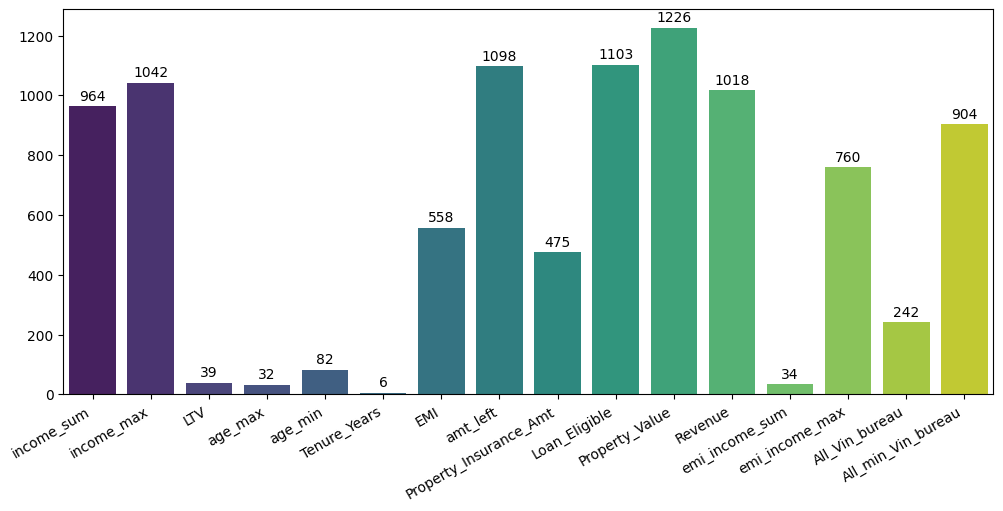

In [130]:
# Create a bar plot
outliers_for_variable = {'income_sum':964, 'income_max': 1042, 'LTV':39, 'age_max':32,
                         'age_min':82, 'Tenure_Years':6, 'EMI':558, 'amt_left':1098, 'Property_Insurance_Amt':475,
                         'Loan_Eligible':1103, 'Property_Value':1226, 'Revenue':1018, 'emi_income_sum':34,
                         'emi_income_max':760, 'All_Vin_bureau':242, 'All_min_Vin_bureau':904}

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=list(outliers_for_variable.keys()), y=list(outliers_for_variable.values()), palette="viridis")
plt.xticks(rotation=30, ha="right")  # Rotate x-axis labels for better visibility
#plt.xlabel("Variables")
#plt.ylabel("Outliers")
#plt.title("Number of Outliers for Each Variable")

# Add text labels on top of each bar
for i, v in enumerate(outliers_for_variable.values()):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

# Treating the skewness

## Income_sum

In [131]:
# Calculate percentiles based on the descriptive statistics
low_threshold = df1['income_sum'].quantile(0.25)
medium_threshold = df1['income_sum'].quantile(0.75)
IQR = medium_threshold - low_threshold
lb = low_threshold - 1.5 * IQR
ub = medium_threshold + 1.5 * IQR

# Create a new categorical column based on the thresholds
#['income_cat1'] = pd.cut(df1['income_sum'], bins=[float('-inf'), low_threshold, medium_threshold, float('inf')],
#                               labels=['low', 'medium', 'high'])

df1['income_cat2'] = pd.cut(df1['income_sum'], bins=[float('-inf'), lb, ub, float('inf')],
                            labels=['low', 'medium', 'high'])

In [132]:
#print(low_threshold,'\n')
#print(medium_threshold)

In [133]:
print(lb,'\n')
print(ub)

-5750.279250000003 

68447.79875


In [134]:
#df1['income_cat1'].value_counts().sort_index()

In [135]:
df1['income_cat2'].value_counts().sort_index()

income_cat2
low           0
medium    12110
high        964
Name: count, dtype: int64

In [136]:
#plt.figure(figsize=(7,5))
#sns.countplot(x='income_cat1', data=df1)#, hue='income_cat')
#plt.show()

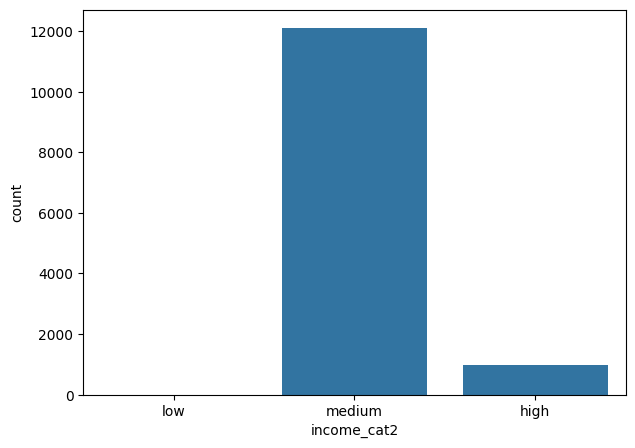

In [137]:
plt.figure(figsize=(7,5))
sns.countplot(x='income_cat2', data=df1)#, hue='income_cat')
plt.show()

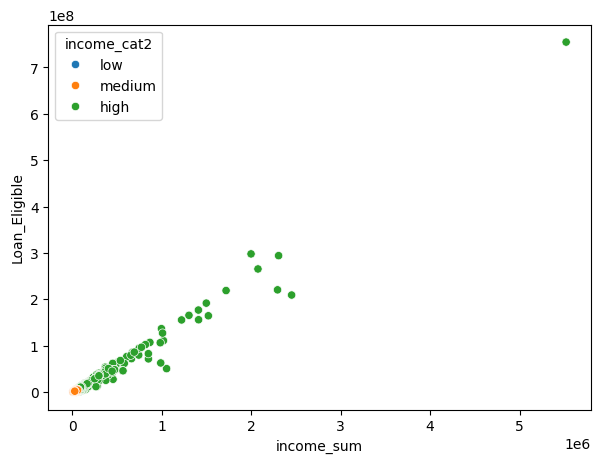

In [138]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1, x='income_sum', y='Loan_Eligible',
            hue='income_cat2')#, palette='viridis')#, alpha=0.1)
#plt.grid(False)
plt.show()

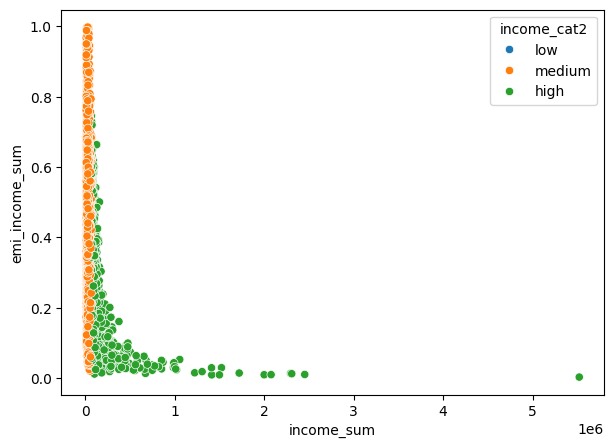

In [139]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1, x='income_sum', y='emi_income_sum',
            hue='income_cat2')#, palette='viridis')#, alpha=0.1)
#plt.grid(False)
plt.show()

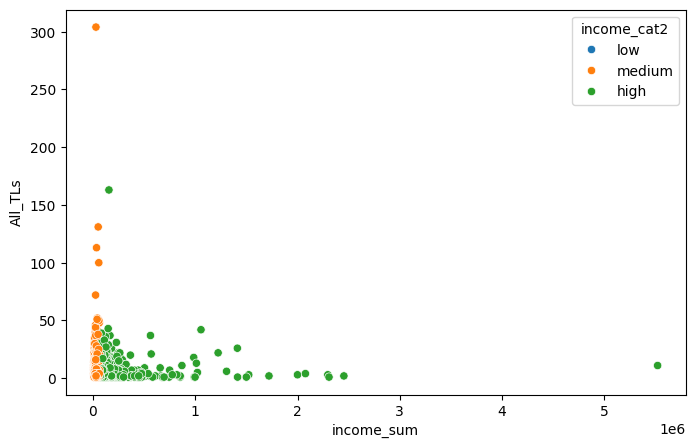

In [140]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='income_sum', y='All_TLs',
            hue='income_cat2')#, palette='viridis')#, alpha=0.1)
#plt.grid(False)
plt.show()

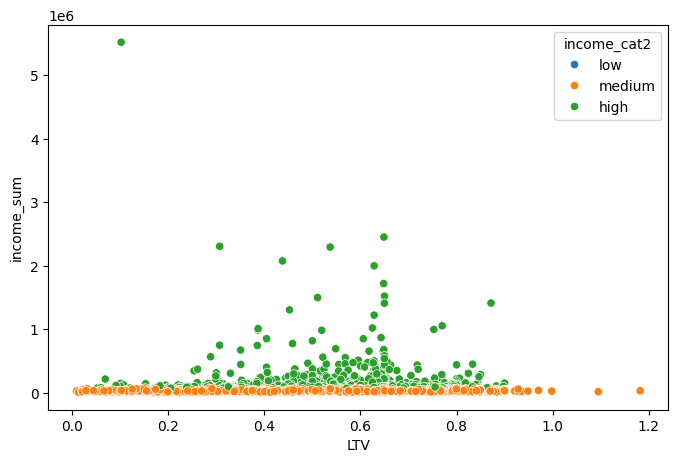

In [141]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, y='income_sum', x='LTV',
            hue='income_cat2')#, palette='viridis')#, alpha=0.1)
#plt.grid(False)
plt.show()

In [142]:
df1['income_sum'].skew()

30.13630822263466

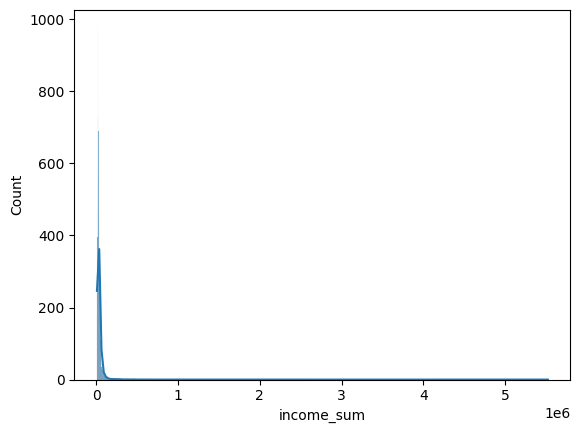

In [143]:
sns.histplot(df1['income_sum'], kde=True)
plt.show()
#print('The skew of income_sum is:', df1['income_sum'].skew())

* Lets apply some transformation & correct the skewness.

### Log transformation

In [144]:
df1['income_sum_log'] = np.log10(df['income_sum'])

In [145]:
df1['income_sum_log'].skew()

1.5542764622683174

### Boxcox transformation

In [146]:
from scipy.stats import boxcox

df1['income_sum_box'], lambda_value = boxcox(df1['income_sum'] + 1)

In [147]:
#boxcox_transformation = (x**lmbda - 1) / lmbda

In [148]:
#lambda_value = -0.5448345091305346

In [149]:
lambda_value

-0.5448345091305346

In [150]:
df1['income_sum_box'].skew()

-0.03378480649267085

* As we can see that the skewness has reduced from **30.13** to **1.55** for log transformation & **-0.033** for Boxcox transformation.
* Now lets see their respective distributions.

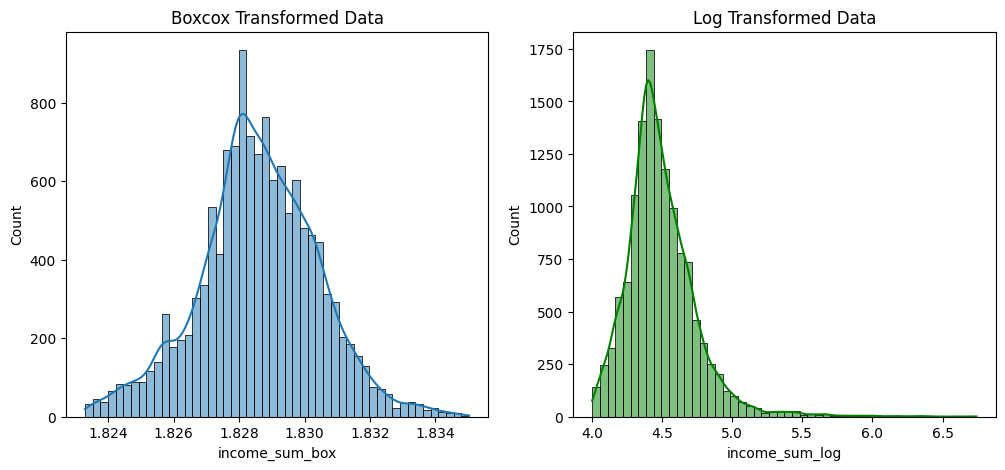

In [151]:
# Plotting the histograms of the transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df1['income_sum_box'], bins=50, kde=True)#, color='blue')
plt.title('Boxcox Transformed Data')

plt.subplot(1, 2, 2)
sns.histplot(df1['income_sum_log'], bins=50, kde=True, color='green')
plt.title('Log Transformed Data')

plt.show()

* Its evident from the above graphs that the `Boxcox` transformation of the `income_sum` feature is almost perfectly normal.


In [152]:
df1['income_sum'].skew()

30.13630822263466

In [153]:
df1['income_sum_box'].skew()

-0.03378480649267085

* Now that it has become normal, let us check for outliers again with `emperical rule, considering values outside 3rd Standard Deviation as outliers (99.7%)` method.

In [154]:
# Setting a threshold for identifying outliers
#z_score_threshold = 3

# Calculating z-scores for the features
#z_scores = zscore(df1['income_sum_box'])

# Calculating the lower and upper bounds based on z-score
lb = round(df1['income_sum_box'].mean() - 3 * df1['income_sum_box'].std(), 6)
ub = round(df1['income_sum_box'].mean() + 3 * df1['income_sum_box'].std(), 6)

# Outliers based on z-scores
#outliers_i = df1[(z_scores > z_score_threshold) | (z_scores < -z_score_threshold)]
outliers_i = df1[(df1['income_sum_box'] < lb) | (df1['income_sum_box'] > ub)]

# Print the number of outliers
print('\nNo of Outliers in income_sum_box is:', len(outliers_i))
print('\nRange of Outliers in income_sum_box is', lb, ub)


No of Outliers in income_sum_box is: 34

Range of Outliers in income_sum_box is 1.823096 1.834076


In [155]:
df1.shape

(13074, 38)

In [156]:
# Dropping income_sum_log feature
df1.drop(['income_sum_log'], axis=1, inplace=True)

In [157]:
df1.shape

(13074, 37)

## LTV

In [158]:
df1['LTV'].describe()

count    13074.000000
mean         0.607546
std          0.183750
min          0.009176
25%          0.487640
50%          0.628475
75%          0.763352
max          1.181818
Name: LTV, dtype: float64

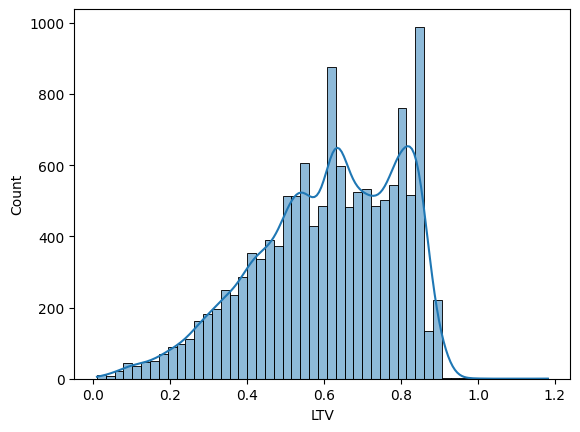

The skew of LTV is: -0.5444233635549183


In [159]:
sns.histplot(df1['LTV'], kde=True)
plt.show()
print('The skew of LTV is:', df1['LTV'].skew())

* Let us use median imputation for the outliers.

In [160]:
for x in ['LTV']:
    q75, q25 = np.percentile(df1.loc[:,x], [75, 25])
    intr_qr = q75 - q25
 
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
 
    df1.loc[df1[x] <= min, x] = np.nan
    df1.loc[df1[x] >= max, x] = np.nan

In [161]:
df1.isna().sum().sort_values(ascending=False)[:1]

LTV    39
dtype: int64

In [162]:
# Filling missing values with median
df1['LTV'].fillna(df1['LTV'].median(),inplace=True)  

In [163]:
df1['LTV'].describe()

count    13074.000000
mean         0.609190
std          0.181182
min          0.076555
25%          0.489403
50%          0.628475
75%          0.763325
max          1.094656
Name: LTV, dtype: float64

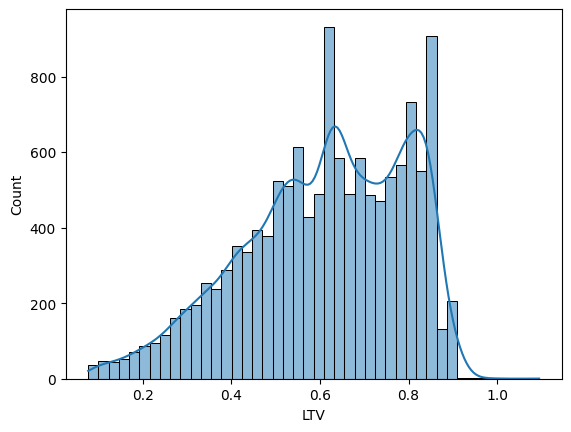

The skew of LTV is: -0.5117443888776916


In [164]:
sns.histplot(df1['LTV'], kde=True)
plt.show()
print('The skew of LTV is:', df1['LTV'].skew())

In [165]:
#df1.isna().sum().sort_values()

In [166]:
df1.shape

(13074, 37)

In [167]:
df1 = df1[df1['LTV'] < 1] # removing values greater than 1

In [168]:
df1.shape

(13073, 37)

In [169]:
df1['LTV'].skew()

-0.5130044344996313

## age_min

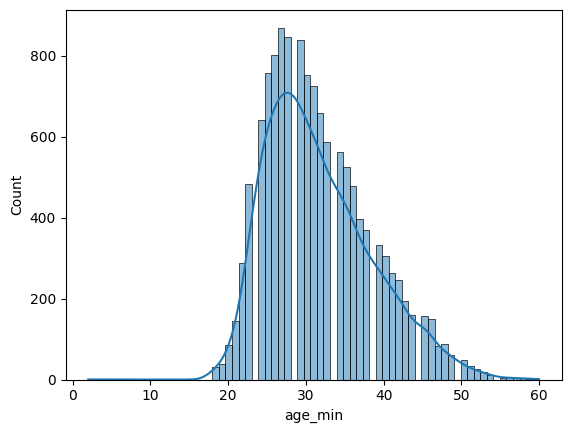

The skew of age_min is: 0.7084691193637881


In [172]:
sns.histplot(df1['age_min'], kde=True)
plt.show()
print('The skew of age_min is:', df1['age_min'].skew())

### Log transformation

In [173]:
df1['age_min_log']=np.log(df1['age_min'])

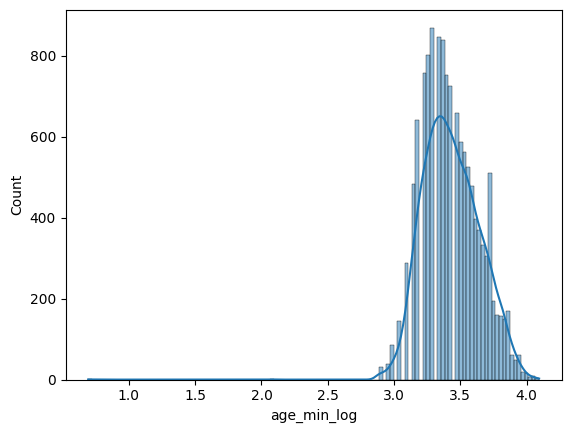

The skewness of age_min is: 0.05376321861392938


In [174]:
sns.histplot(data=df1['age_min_log'], kde=True)
plt.show()
print('The skewness of age_min is:',df1['age_min_log'].skew())

In [175]:
# Boxcox transformation
#from scipy.stats import boxcox
#df1['age_min_box'], lambda_value3 = boxcox(df1['age_min'])

In [176]:
#sns.histplot(df1['age_min_box'], kde=True)
#plt.show()

In [177]:
#df1['age_min_box'].skew() #-0.007632443156172865

---

### Checking outliers

In [178]:
# Calculating the lower and upper bounds based on z-score
lb = round(df1['age_min_log'].mean() - 3 * df1['age_min_log'].std(), 6)
ub = round(df1['age_min_log'].mean() + 3 * df1['age_min_log'].std(), 6)

# Outliers based on z-scores
#outliers_age1 = df1[(z_scores > z_score_threshold) | (z_scores < -z_score_threshold)]
outliers_age1 = df1[(df1['age_min_log'] < lb) | (df1['age_min_log'] > ub)]

# Print the number of outliers
print('\nNo of Outliers in age_min_log is:', len(outliers_age1))
print('\nRange of Outliers in age_min_log is:', lb, ub)


No of Outliers in age_min_log is: 5

Range of Outliers in age_min_log is: 2.799492 4.065637


## age_max outliers

* As `age_min` and `age_max` have the same nature, we can perform the same treatment of `age_min`

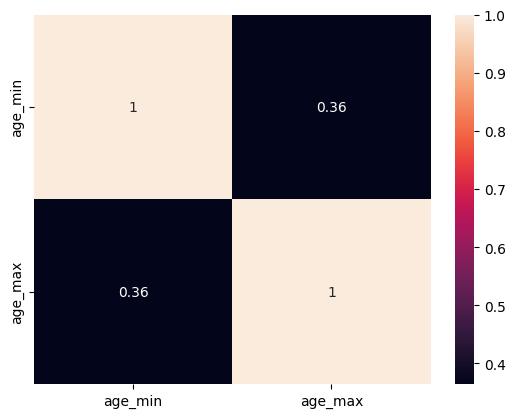

In [179]:
sns.heatmap(df1[['age_min', 'age_max']].corr(), annot=True)
plt.show()

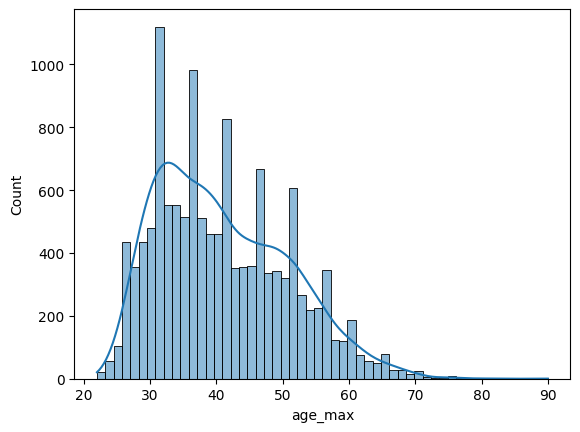

The skewness of age_max is: 0.565272133925128


In [180]:
sns.histplot(data=df1['age_max'], kde=True)
plt.show()
print('The skewness of age_max is:',df1['age_max'].skew())

### Log transformation

In [181]:
df1['age_max_log']=np.log(df1['age_max'])

In [182]:
df1['age_max_log'].skew()

0.11725082440387387

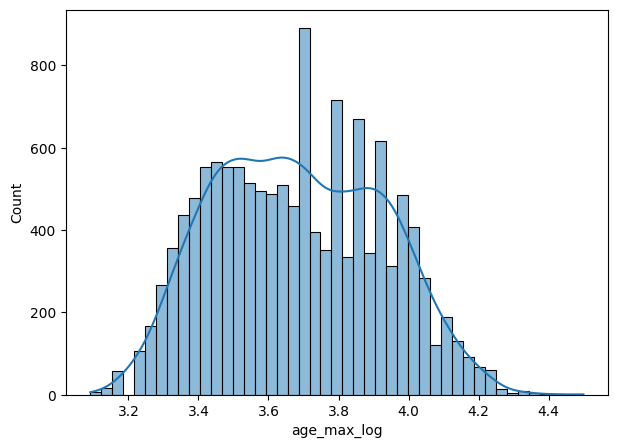

In [183]:
plt.figure(figsize=(7,5))
sns.histplot(data=df1['age_max_log'], kde=True)
plt.show()

In [184]:
df1.shape

(13073, 39)

## emi_income_sum outliers

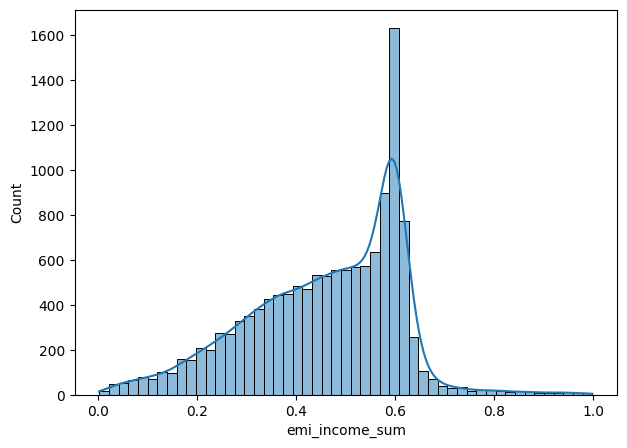

In [185]:
plt.figure(figsize=(7,5))
sns.histplot(df1['emi_income_sum'], kde=True)
plt.show()

In [186]:
df1['emi_income_sum'].skew()

-0.47068161636378414

* With a skewness of -0.44 the feature can be considered as `normal`.
* Using `z-score`, we can remove the outliers.

In [188]:
# Calculating the lower and upper bounds

lb_e = df1['emi_income_sum'].mean() - 3 * df1['emi_income_sum'].std()
ub_e = df1['emi_income_sum'].mean() + 3 * df1['emi_income_sum'].std()

outliers9 = df1[(df1['emi_income_sum'] < lb_e) | (df1['emi_income_sum'] > ub_e)]

# Printing the result
print('Number of outliers for emi_income_sum:', len(outliers9))
print('\nLower Bound:', lb_e)
print('\nUpper Bound:', ub_e)

Number of outliers for emi_income_sum: 34

Lower Bound: -0.0008225391323363751

Upper Bound: 0.9155416403390984


In [189]:
df1 = df1[df1['emi_income_sum'].between(lb_e, ub_e)]

In [190]:
df1['emi_income_sum'].skew()

-0.5591108950890162

In [191]:
df1['emi_income_sum'].describe()

count    13039.000000
mean         0.456061
std          0.150787
min          0.002287
25%          0.353169
50%          0.483545
75%          0.585138
max          0.914051
Name: emi_income_sum, dtype: float64

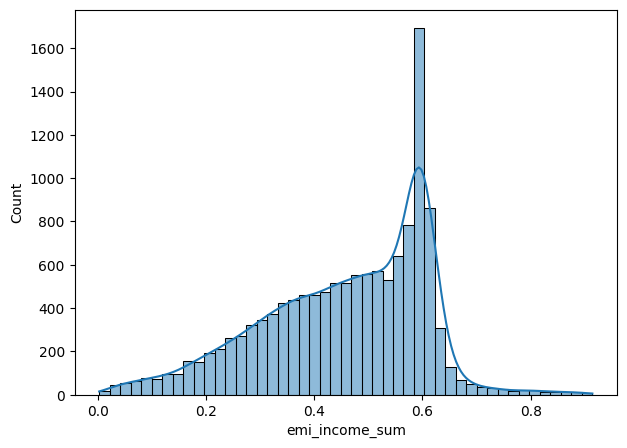

In [192]:
plt.figure(figsize=(7,5))
sns.histplot(df1['emi_income_sum'], kde=True)
plt.show()
#print(df['emi_income_sum'].skew())

## Tenure_Years outliers

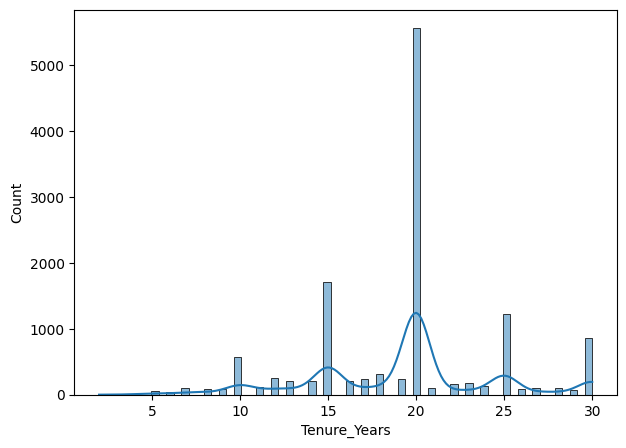

In [193]:
plt.figure(figsize=(7,5))
sns.histplot(df1['Tenure_Years'], kde=True)
plt.show()

In [194]:
df1['Tenure_Years'].skew()

-0.06698877589620733

* This is a normal distribution. No need for any transformation.
* Using empirical rule to remove the outliers.

In [195]:
# Calculating the number of outliers for the features

lb_t = df1['Tenure_Years'].mean() - 3 * df1['Tenure_Years'].std()
ub_t = df1['Tenure_Years'].mean() + 3 * df1['Tenure_Years'].std()

outliers_tenure = df1[(df1['Tenure_Years'] < lb_t) | (df1['Tenure_Years'] > ub_t)]

# Printing the results
print('Number of outliers for Tenure_Years:', len(outliers_tenure))
print('\nLower Bound:', lb_t)
print('\nUpper Bound:', ub_t)

Number of outliers for Tenure_Years: 6

Lower Bound: 3.770331585248229

Upper Bound: 34.934477065721936


In [196]:
df1 = df1[df1['Tenure_Years'].between(lb_t, ub_t)]

In [197]:
df1.shape

(13033, 39)

## Loan_Eligible skewness

In [198]:
df1['Loan_Eligible'].describe()

count    1.303300e+04
mean     3.113622e+06
std      1.059114e+07
min      7.789500e+04
25%      1.262096e+06
50%      1.841735e+06
75%      2.851385e+06
max      7.546552e+08
Name: Loan_Eligible, dtype: float64

In [199]:
df1['Loan_Eligible'].skew()

36.83018304748601

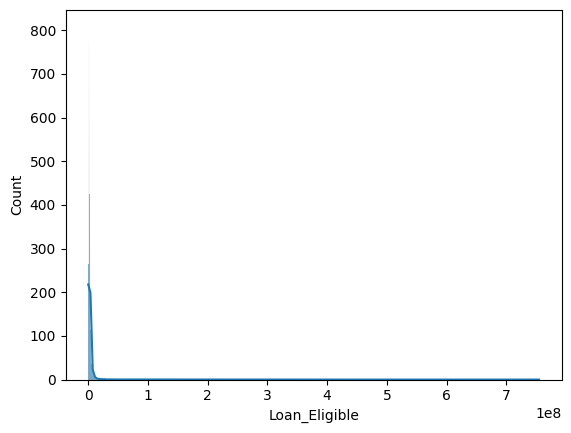

In [200]:
sns.histplot(df1['Loan_Eligible'], kde=True)
plt.show()

### Log transformation

In [201]:
df1['Loan_Eligible_Log'] = np.log(df1['Loan_Eligible'])

In [202]:
df1['Loan_Eligible_Log'].skew()

1.1714466525306693

In [203]:
df1['Loan_Eligible_Log'].describe()

count    13033.000000
mean        14.503621
std          0.738504
min         11.263117
25%         14.048284
50%         14.426219
75%         14.863315
max         20.441771
Name: Loan_Eligible_Log, dtype: float64

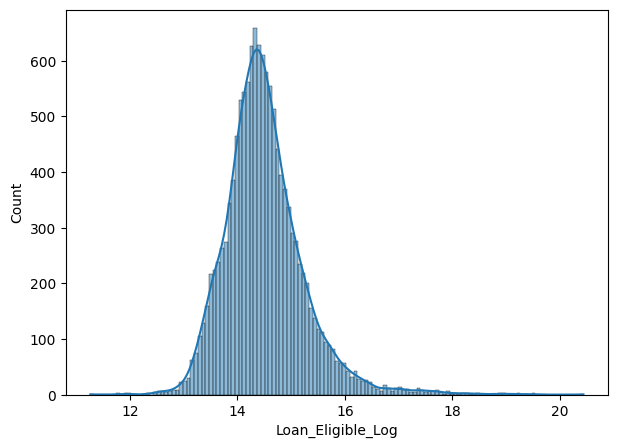

In [204]:
plt.figure(figsize=(7,5))
sns.histplot(df1['Loan_Eligible_Log'], kde=True)
plt.show()

In [205]:
# Calculating the number of outliers for the features

lb_l = df1['Loan_Eligible_Log'].mean() - 3 * df1['Loan_Eligible_Log'].std()
ub_l = df1['Loan_Eligible_Log'].mean() + 3 * df1['Loan_Eligible_Log'].std()

outliers_l = df1[(df1['Loan_Eligible_Log'] < lb_l) | (df1['Loan_Eligible_Log'] > ub_l)]

# Printing the results
print('Number of outliers for Loan_Eligible_Log:', len(outliers_l))
print('\nLower Bound:', lb_l)
print('\nUpper Bound:', ub_l)

Number of outliers for Loan_Eligible_Log: 184

Lower Bound: 12.288107539870898

Upper Bound: 16.71913411670093


---

In [206]:
### Boxcox transformation

In [207]:
#from scipy.stats import boxcox
#df1['Loan_Eligible_box'], lambda_value4 = boxcox(df1['Loan_Eligible'])

In [208]:
#lambda_value4 #-0.3101164467767404

In [209]:
#df1['Loan_Eligible_box'].describe()

In [210]:
#df1['Loan_Eligible_box'].skew() #-0.08712694357957541

In [211]:
#plt.figure(figsize=(7,5))
#sns.histplot(df1['Loan_Eligible_box'], kde=True)
#plt.show()

---

## Property_Value transformation

### Log transformation

In [212]:
df1['Property_Value_Log'] = np.log(df1['Property_Value'])

In [213]:
df1['Property_Value_Log'].skew()

1.3007733977637213

In [214]:
df1['Property_Value_Log'].describe()

count    13033.000000
mean        15.065841
std          0.823980
min         12.011808
25%         14.537415
50%         14.936339
75%         15.455524
max         22.723084
Name: Property_Value_Log, dtype: float64

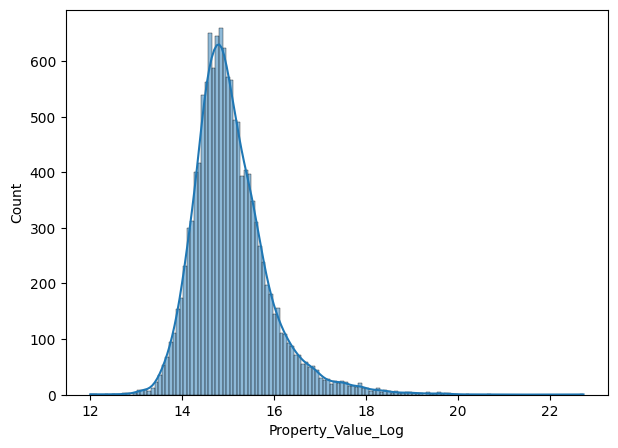

In [215]:
plt.figure(figsize=(7,5))
sns.histplot(df1['Property_Value_Log'], kde=True)
plt.show()

In [216]:
# Calculating the number of outliers for the features

lb_p = df1['Property_Value_Log'].mean() - 3 * df1['Property_Value_Log'].std()
ub_p = df1['Property_Value_Log'].mean() + 3 * df1['Property_Value_Log'].std()

outliers_p = df1[(df1['Property_Value_Log'] < lb_p) | (df1['Property_Value_Log'] > ub_p)]

# Printing the results
print('Number of outliers for Property_Value_Log:', len(outliers_p))
print('\nLower Bound:', lb_p)
print('\nUpper Bound:', ub_p)

Number of outliers for Property_Value_Log: 203

Lower Bound: 12.593900067080252

Upper Bound: 17.537781867330413


---

In [217]:
### Boxcox transformation

In [218]:
#from scipy.stats import boxcox
#df1['Property_Value_box'], lambda_value5 = boxcox(df1['Property_Value'])

In [219]:
#lambda_value5 #-0.35668166755201736

In [220]:
#df1['Property_Value_box'].describe()

In [221]:
#df1['Property_Value_box'].skew() #-0.05938497995568338

In [222]:
#plt.figure(figsize=(7,5))
#sns.histplot(df1['Loan_Eligbile_box'], kde=True)
#plt.show()

---

# Backing up the dataframe

In [223]:
df1_new_features1 = df1.copy(deep=True)

In [224]:
df1_new_features1.shape

(13033, 41)

In [225]:
#df1_new_features1.head()

---

# Conversion of some Numerical features

## Property_Insurance_Amt

In [226]:
df1['Property_Insurance_Amt'].describe()

count     13033.000000
mean       7519.208931
std       10147.610737
min           0.000000
25%           0.000000
50%        5206.000000
75%       10868.000000
max      166884.000000
Name: Property_Insurance_Amt, dtype: float64

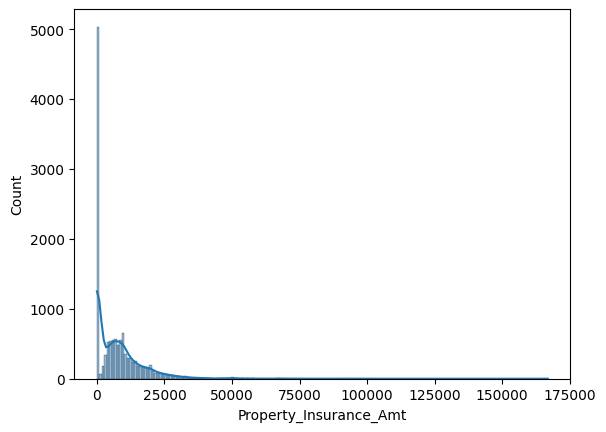

In [227]:
sns.histplot(df1['Property_Insurance_Amt'], kde=True)
plt.show()

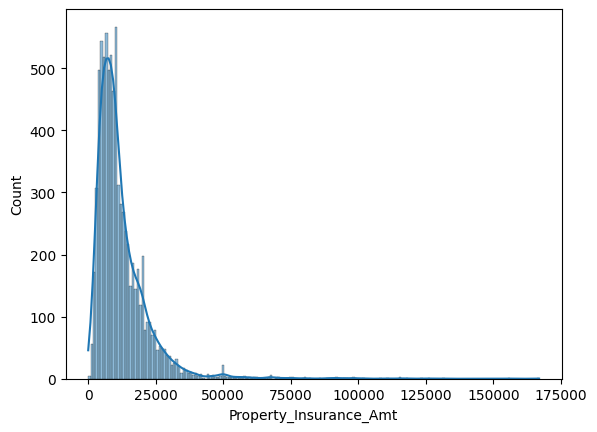

In [228]:
# Histogram of values other than zero
sns.histplot(df1[df1['Property_Insurance_Amt'] > 0]['Property_Insurance_Amt'], kde=True)
plt.show()

In [229]:
df1['Property_Insurance_Amt'].skew()

3.6212373427387776

In [230]:
(df1[df1['Property_Insurance_Amt'] > 0]['Property_Insurance_Amt']).skew()

4.14268783297792

In [231]:
(df1['Property_Insurance_Amt'] == 0).sum()

5031

In [232]:
(df1['Property_Insurance_Amt'] > 0).sum()

8002

* `Property_Insurance_Amt` has `5031` values of `0`s
* `Property_Insurance_Amt` has `8003` values of `non-zeroes`
* Let us convert this into a categorical feature of two classes viz. `Not Insured` and `Insured`

In [233]:
df1['Pprty_Ins_Amt_cat'] = df1['Property_Insurance_Amt'].apply(lambda x:'Not Insured' if x==0 else 'Insured')

In [234]:
df1.shape

(13033, 42)

In [235]:
df1['Pprty_Ins_Amt_cat'].value_counts()

Pprty_Ins_Amt_cat
Insured        8002
Not Insured    5031
Name: count, dtype: int64

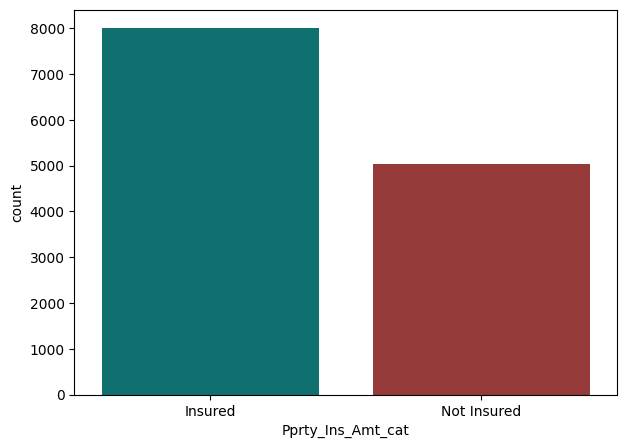

In [236]:
plt.figure(figsize=(7,5))
sns.countplot(x='Pprty_Ins_Amt_cat', data=df1, palette=['teal','brown'])
plt.show()

## All_Vin_bureau & All_min_Vin_bureau

* `All_vin_bureau` and `All_min_vin_bureau` are given in months and is being converted to years.
* After conversion, we can consider these features for `categorical` selection.

In [237]:
df1[['All_Vin_bureau', 'All_min_Vin_bureau']].describe().transpose()

count       mean        std  min   25%   50%   75%  \
All_Vin_bureau      13033.0  50.776797  37.502946  0.0  21.0  43.0  71.0   
All_min_Vin_bureau  13033.0  20.360316  23.209623  0.0   5.0  12.0  27.0   

                      max  
All_Vin_bureau      444.0  
All_min_Vin_bureau  300.0

In [238]:
df1['All_Vin_bureau'].skew(), df1['All_min_Vin_bureau'].skew()

(1.1484091062923005, 2.319793200876411)

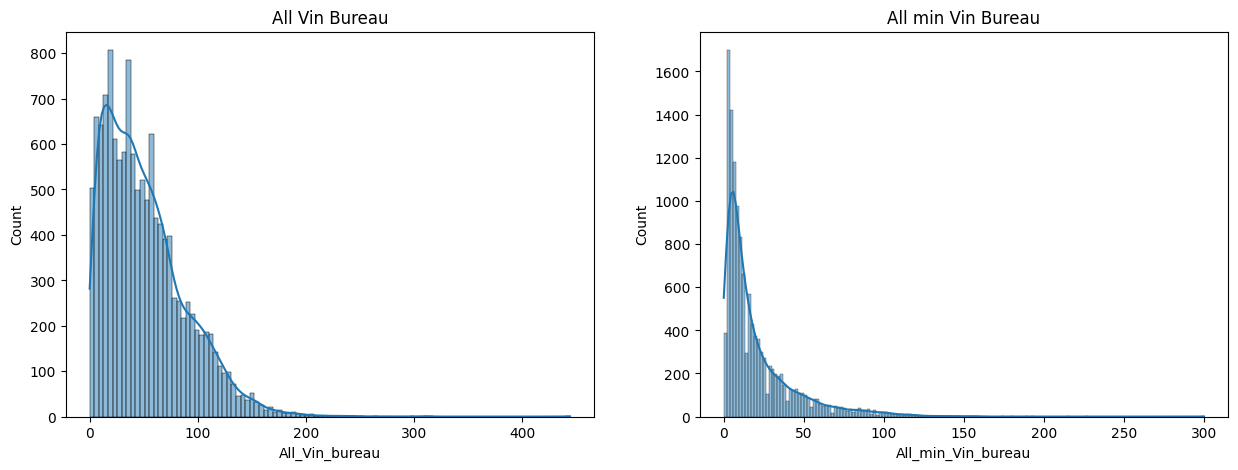

In [239]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df1['All_Vin_bureau'], kde=True)
plt.title('All Vin Bureau')

plt.subplot(1,2,2)
sns.histplot(df1['All_min_Vin_bureau'], kde=True)
plt.title('All min Vin Bureau')

plt.show()

In [240]:
# Converting the months to year
df1['no_of_years'] = round(df1['All_Vin_bureau']/12, 1)

df1['no_of_years_min'] = round(df1['All_min_Vin_bureau']/12, 1)

In [241]:
df1.shape

(13033, 44)

In [242]:
# Checking the skewness again
df1['no_of_years'].skew(), df1['no_of_years_min'].skew()

(1.14794381721828, 2.315448090083279)

In [243]:
df1[['no_of_years', 'no_of_years_min']].describe().transpose()

count      mean       std  min  25%  50%  75%   max
no_of_years      13033.0  4.231037  3.125679  0.0  1.8  3.6  5.9  37.0
no_of_years_min  13033.0  1.695112  1.935409  0.0  0.4  1.0  2.2  25.0

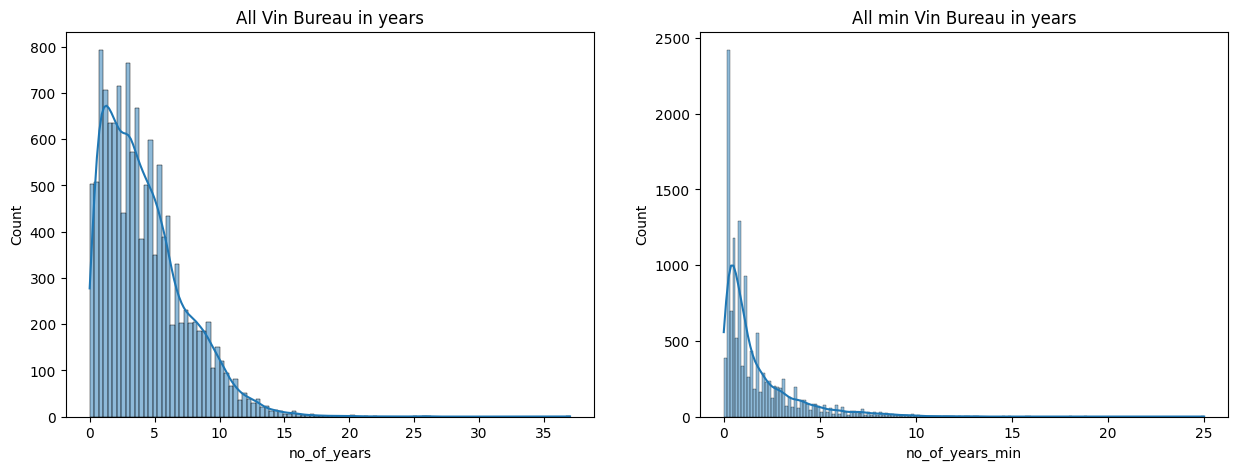

In [244]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df1['no_of_years'], kde=True)
plt.title('All Vin Bureau in years')

plt.subplot(1,2,2)
sns.histplot(df1['no_of_years_min'], kde=True)
plt.title('All min Vin Bureau in years')

plt.show()

---

# Dropping features
* Let us now drop the features not needed.

In [245]:
df1.shape

(13033, 44)

In [246]:
df1.head()

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
0      1              0  0.715563           0  11396.0000  11396.0000   
1      1              2  0.544463           0  26472.0833  26472.0833   
2      1              6  0.566012           0  23487.5000  23487.5000   
3      1              0  0.536455           0  42270.0000  42270.0000   
4      1              1  0.511949           0  17506.0000  17506.0000   

   income_min  edu_max  edu_min  age_max  age_min  count_coapplicant  \
0         0.0        3        2       46       24                  1   
1         0.0        3        3       47       44                  1   
2         0.0        3        3       35       35                  1   
3         0.0        3        3       39       34                  1   
4         0.0        3        3       32       28                  1   

   Requested_Tenure  Property_Insurance_Amt Organization_type Salaried_Self  \
0               240                    4553  3.Private Ltd Co      SALARIED   
1               180                   10307  3.Private Ltd Co      SELF_EMP   
2               240                    7460  3.Private Ltd Co      SELF_EMP   
3               240                    6744          1.Others      SALARIED   
4               324                       0  3.Private Ltd Co      SALARIED   

  Channel_Code City_tier    Loan_sub_type_1 Sal_Flag  emi_income_max  \
0          DSA         1      Builder Ready      SAL        0.456037   
1          DSA         3  Self Construction   NONSAL        0.472611   
2  CROSS SALES         3  Self Construction   NONSAL        0.486684   
3          DSA         1        Builder UNC      SAL        0.447599   
4    UBL Sales         1      Builder Ready      SAL        0.619159   

   emi_income_sum  All_TLs  Open_TLs  All_Vin_bureau  All_min_Vin_bureau  \
0        0.456037        4         2              32                   2   
1        0.472611        3         1              65                  19   
2        0.486684        2         2              47                  37   
3        0.447599        2         1              94                  69   
4        0.619159        1      -999              87                  87   

   All_Delinquent_TL_24M  No_of_enq_All Latest_Bureau_prd         Bureau_TL  \
0                      0              8                CC           2.<6 CC   
1                      2              3                HL   7.<36 AL HL LAS   
2                      0              2            BL_PSL  12.>36 PL TWL GL   
3                      0              2                AL     13.>36 Others   
4                      0              2                CC         11.>36 CC   

     EMI  amt_left  Tenure_Years  Loan_Eligible  Property_Value income_cat2  \
0   5196      6200            20         799691         1117568      medium   
1  12511     13961            15        1553244         2852797      medium   
2  11431     12056            20        1555013         2747315      medium   
3  18920     23350            20        3011741         5614156      medium   
4  10838      6668            27         969446         1893638      medium   

   income_sum_box  age_min_log  age_max_log  Loan_Eligible_Log  \
0        1.824110     3.178054     3.828641          13.591981   
1        1.828274     3.784190     3.850148          14.255856   
2        1.827793     3.555348     3.555348          14.256994   
3        1.829882     3.526361     3.663562          14.918029   
4        1.826468     3.332205     3.465736          13.784480   

   Property_Value_Log Pprty_Ins_Amt_cat  no_of_years  no_of_years_min  
0           13.926665           Insured          2.7              0.2  
1           14.863810           Insured          5.4              1.6  
2           14.826135           Insured          3.9              3.1  
3           15.540802           Insured          7.8              5.8  
4           14.454010       Not Insured          7.2      

In [247]:
df1.drop(['age_max','age_min','Requested_Tenure','Property_Insurance_Amt','All_Vin_bureau','All_min_Vin_bureau'],axis=1, inplace=True)

In [248]:
df1.shape

(13033, 38)

In [249]:
df1.head()

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
0      1              0  0.715563           0  11396.0000  11396.0000   
1      1              2  0.544463           0  26472.0833  26472.0833   
2      1              6  0.566012           0  23487.5000  23487.5000   
3      1              0  0.536455           0  42270.0000  42270.0000   
4      1              1  0.511949           0  17506.0000  17506.0000   

   income_min  edu_max  edu_min  count_coapplicant Organization_type  \
0         0.0        3        2                  1  3.Private Ltd Co   
1         0.0        3        3                  1  3.Private Ltd Co   
2         0.0        3        3                  1  3.Private Ltd Co   
3         0.0        3        3                  1          1.Others   
4         0.0        3        3                  1  3.Private Ltd Co   

  Salaried_Self Channel_Code City_tier    Loan_sub_type_1 Sal_Flag  \
0      SALARIED          DSA         1      Builder Ready      SAL   
1      SELF_EMP          DSA         3  Self Construction   NONSAL   
2      SELF_EMP  CROSS SALES         3  Self Construction   NONSAL   
3      SALARIED          DSA         1        Builder UNC      SAL   
4      SALARIED    UBL Sales         1      Builder Ready      SAL   

   emi_income_max  emi_income_sum  All_TLs  Open_TLs  All_Delinquent_TL_24M  \
0        0.456037        0.456037        4         2                      0   
1        0.472611        0.472611        3         1                      2   
2        0.486684        0.486684        2         2                      0   
3        0.447599        0.447599        2         1                      0   
4        0.619159        0.619159        1      -999                      0   

   No_of_enq_All Latest_Bureau_prd         Bureau_TL    EMI  amt_left  \
0              8                CC           2.<6 CC   5196      6200   
1              3                HL   7.<36 AL HL LAS  12511     13961   
2              2            BL_PSL  12.>36 PL TWL GL  11431     12056   
3              2                AL     13.>36 Others  18920     23350   
4              2                CC         11.>36 CC  10838      6668   

   Tenure_Years  Loan_Eligible  Property_Value income_cat2  income_sum_box  \
0            20         799691         1117568      medium        1.824110   
1            15        1553244         2852797      medium        1.828274   
2            20        1555013         2747315      medium        1.827793   
3            20        3011741         5614156      medium        1.829882   
4            27         969446         1893638      medium        1.826468   

   age_min_log  age_max_log  Loan_Eligible_Log  Property_Value_Log  \
0     3.178054     3.828641          13.591981           13.926665   
1     3.784190     3.850148          14.255856           14.863810   
2     3.555348     3.555348          14.256994           14.826135   
3     3.526361     3.663562          14.918029           15.540802   
4     3.332205     3.465736          13.784480           14.454010   

  Pprty_Ins_Amt_cat  no_of_years  no_of_years_min  
0           Insured          2.7              0.2  
1           Insured          5.4              1.6  
2           Insured          3.9              3.1  
3           Insured          7.8              5.8  
4       Not Insured          7.2              7.2

---

# Correlation of numerical features

In [252]:
#num3 =['LTV','income_max','income_sum','income_min','emi_income_max','emi_income_sum','EMI','amt_left',
#     'Tenure_Years', 'Loan_Eligible', 'Property_Value', 'income_sum_box', 'age_min_log', 'age_max_log']

num3 =['LTV','income_max','income_sum','income_min','emi_income_max','emi_income_sum','EMI','amt_left',
     'Tenure_Years', 'Loan_Eligible', 'Loan_Eligible_Log', 'Property_Value',
       'Property_Value_Log', 'income_sum_box', 'age_min_log', 'age_max_log']

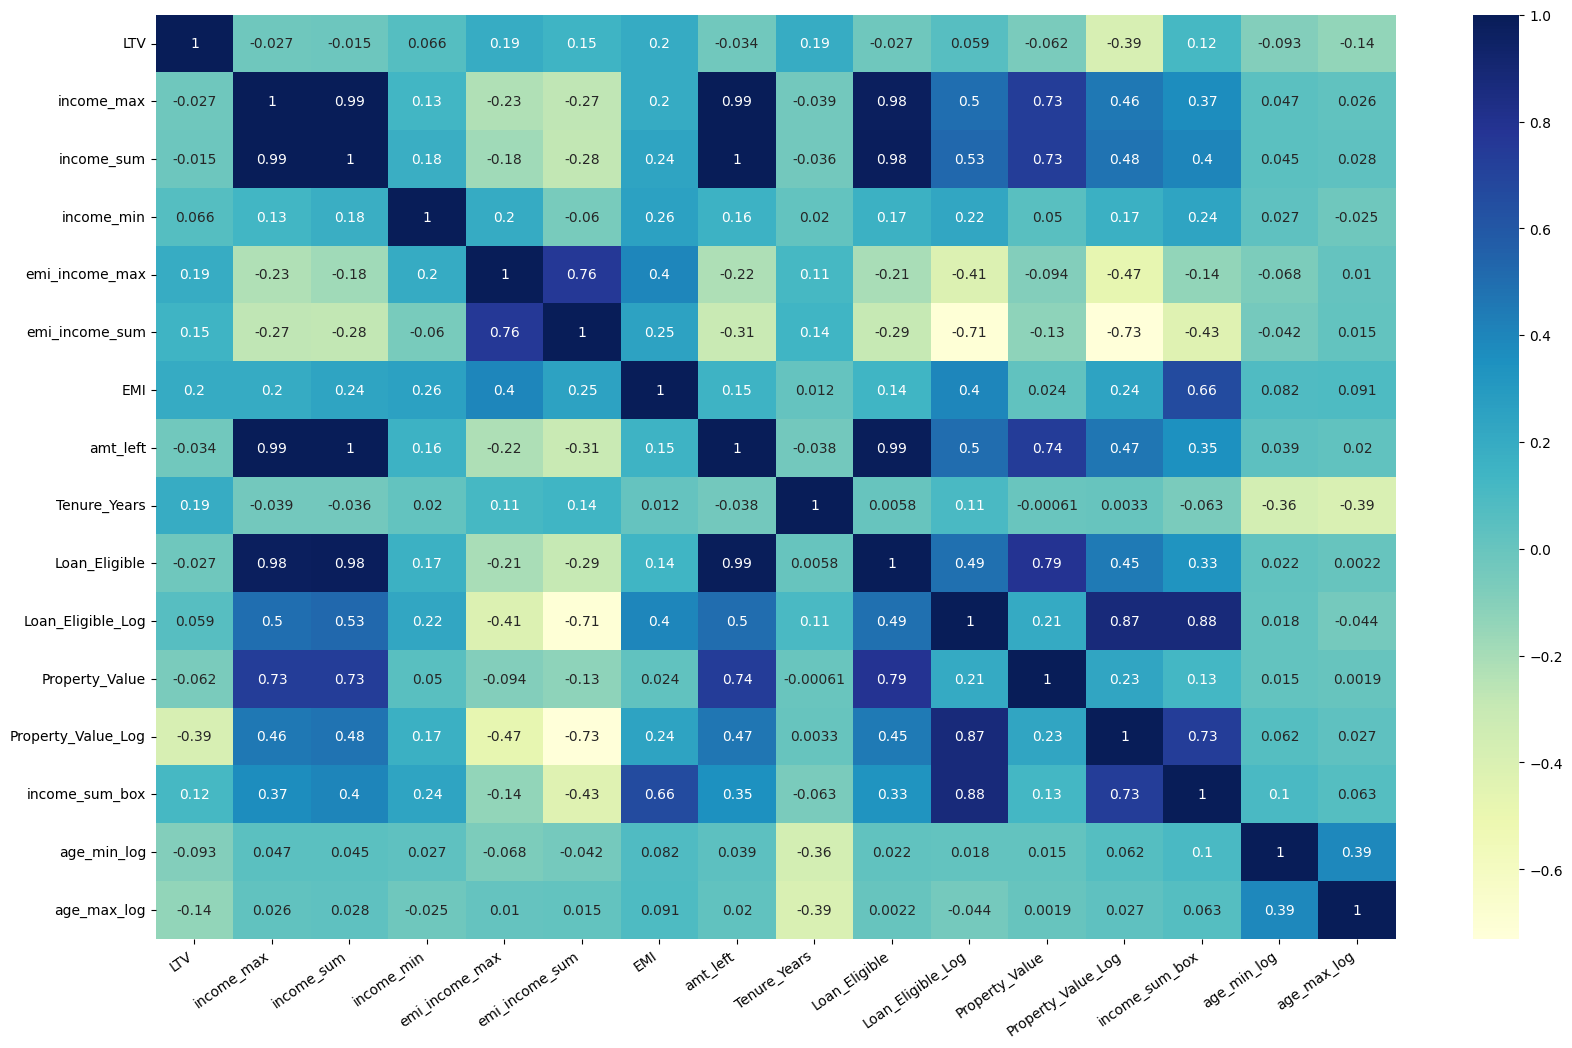

In [253]:
plt.figure(figsize=(20,12))
sns.heatmap(df1[num3].corr(), annot=True, cmap="YlGnBu")
plt.xticks(rotation=35, ha='right')
plt.show()

In [254]:
# with the following function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [255]:
corr_features = correlation(df1[num3], 0.7)
len(set(corr_features))

7

In [256]:
corr_features

{'Loan_Eligible',
 'Loan_Eligible_Log',
 'Property_Value_Log',
 'amt_left',
 'emi_income_max',
 'income_max',
 'income_sum'}

* **'Loan_Eligible', 'Property_Value', 'amt_left', 'emi_income_max', 'income_max', 'income_sum' are highly correlated features with correlation greater than 0.7**.

> Let us check for `income_min`.

In [257]:
# zero values
(df1['income_min'] == 0).sum()

10327

In [258]:
# non-zero values
(df1['income_min'] > 0).sum()

2706

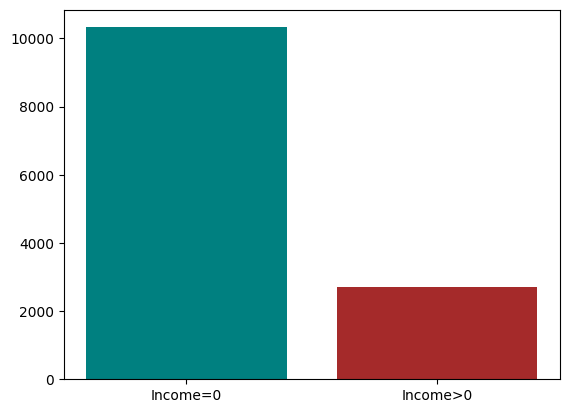

In [259]:
z1 = (df1['income_min'] == 0).sum()
z2 = (df1['income_min'] > 0).sum()
inc = ['Income=0','Income>0']
cnt = [z1,z2]
plt.bar(inc, cnt, color=['teal','brown'])
plt.show()

> `income_min` has almost **80%** zeroes which cannot be treated or removed. Due to this, the correlation with `income_sum` is very less. Hence `income_min` can be dropped.

In [260]:
df1.shape

(13033, 38)

In [261]:
df1.head()

Status  Max_dependent       LTV Doc_form_16  income_max  income_sum  \
0      1              0  0.715563           0  11396.0000  11396.0000   
1      1              2  0.544463           0  26472.0833  26472.0833   
2      1              6  0.566012           0  23487.5000  23487.5000   
3      1              0  0.536455           0  42270.0000  42270.0000   
4      1              1  0.511949           0  17506.0000  17506.0000   

   income_min  edu_max  edu_min  count_coapplicant Organization_type  \
0         0.0        3        2                  1  3.Private Ltd Co   
1         0.0        3        3                  1  3.Private Ltd Co   
2         0.0        3        3                  1  3.Private Ltd Co   
3         0.0        3        3                  1          1.Others   
4         0.0        3        3                  1  3.Private Ltd Co   

  Salaried_Self Channel_Code City_tier    Loan_sub_type_1 Sal_Flag  \
0      SALARIED          DSA         1      Builder Ready      SAL   
1      SELF_EMP          DSA         3  Self Construction   NONSAL   
2      SELF_EMP  CROSS SALES         3  Self Construction   NONSAL   
3      SALARIED          DSA         1        Builder UNC      SAL   
4      SALARIED    UBL Sales         1      Builder Ready      SAL   

   emi_income_max  emi_income_sum  All_TLs  Open_TLs  All_Delinquent_TL_24M  \
0        0.456037        0.456037        4         2                      0   
1        0.472611        0.472611        3         1                      2   
2        0.486684        0.486684        2         2                      0   
3        0.447599        0.447599        2         1                      0   
4        0.619159        0.619159        1      -999                      0   

   No_of_enq_All Latest_Bureau_prd         Bureau_TL    EMI  amt_left  \
0              8                CC           2.<6 CC   5196      6200   
1              3                HL   7.<36 AL HL LAS  12511     13961   
2              2            BL_PSL  12.>36 PL TWL GL  11431     12056   
3              2                AL     13.>36 Others  18920     23350   
4              2                CC         11.>36 CC  10838      6668   

   Tenure_Years  Loan_Eligible  Property_Value income_cat2  income_sum_box  \
0            20         799691         1117568      medium        1.824110   
1            15        1553244         2852797      medium        1.828274   
2            20        1555013         2747315      medium        1.827793   
3            20        3011741         5614156      medium        1.829882   
4            27         969446         1893638      medium        1.826468   

   age_min_log  age_max_log  Loan_Eligible_Log  Property_Value_Log  \
0     3.178054     3.828641          13.591981           13.926665   
1     3.784190     3.850148          14.255856           14.863810   
2     3.555348     3.555348          14.256994           14.826135   
3     3.526361     3.663562          14.918029           15.540802   
4     3.332205     3.465736          13.784480           14.454010   

  Pprty_Ins_Amt_cat  no_of_years  no_of_years_min  
0           Insured          2.7              0.2  
1           Insured          5.4              1.6  
2           Insured          3.9              3.1  
3           Insured          7.8              5.8  
4       Not Insured          7.2              7.2

In [262]:
# Dropping features
#df_model = df1.drop(['income_max','income_sum','income_min','emi_income_max','amt_left','Loan_Eligible','Property_Value'], axis=1)

#df_model = df1.drop(['income_max','income_sum','income_min','emi_income_max','amt_left'], axis=1)

df_model = df1.drop(['income_max','income_sum','income_min','emi_income_max','amt_left','Loan_Eligible',
                     'Loan_Eligible_Log','Property_Value_Log','Property_Value'], axis=1)

In [263]:
df_model.shape

(13033, 29)

In [264]:
df_model.head()

Status  Max_dependent       LTV Doc_form_16  edu_max  edu_min  \
0      1              0  0.715563           0        3        2   
1      1              2  0.544463           0        3        3   
2      1              6  0.566012           0        3        3   
3      1              0  0.536455           0        3        3   
4      1              1  0.511949           0        3        3   

   count_coapplicant Organization_type Salaried_Self Channel_Code City_tier  \
0                  1  3.Private Ltd Co      SALARIED          DSA         1   
1                  1  3.Private Ltd Co      SELF_EMP          DSA         3   
2                  1  3.Private Ltd Co      SELF_EMP  CROSS SALES         3   
3                  1          1.Others      SALARIED          DSA         1   
4                  1  3.Private Ltd Co      SALARIED    UBL Sales         1   

     Loan_sub_type_1 Sal_Flag  emi_income_sum  All_TLs  Open_TLs  \
0      Builder Ready      SAL        0.456037        4         2   
1  Self Construction   NONSAL        0.472611        3         1   
2  Self Construction   NONSAL        0.486684        2         2   
3        Builder UNC      SAL        0.447599        2         1   
4      Builder Ready      SAL        0.619159        1      -999   

   All_Delinquent_TL_24M  No_of_enq_All Latest_Bureau_prd         Bureau_TL  \
0                      0              8                CC           2.<6 CC   
1                      2              3                HL   7.<36 AL HL LAS   
2                      0              2            BL_PSL  12.>36 PL TWL GL   
3                      0              2                AL     13.>36 Others   
4                      0              2                CC         11.>36 CC   

     EMI  Tenure_Years income_cat2  income_sum_box  age_min_log  age_max_log  \
0   5196            20      medium        1.824110     3.178054     3.828641   
1  12511            15      medium        1.828274     3.784190     3.850148   
2  11431            20      medium        1.827793     3.555348     3.555348   
3  18920            20      medium        1.829882     3.526361     3.663562   
4  10838            27      medium        1.826468     3.332205     3.465736   

  Pprty_Ins_Amt_cat  no_of_years  no_of_years_min  
0           Insured          2.7              0.2  
1           Insured          5.4              1.6  
2           Insured          3.9              3.1  
3           Insured          7.8              5.8  
4       Not Insured          7.2              7.2

In [265]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13033 entries, 0 to 13408
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Status                 13033 non-null  object  
 1   Max_dependent          13033 non-null  int64   
 2   LTV                    13033 non-null  float64 
 3   Doc_form_16            13033 non-null  object  
 4   edu_max                13033 non-null  int64   
 5   edu_min                13033 non-null  int64   
 6   count_coapplicant      13033 non-null  int64   
 7   Organization_type      13033 non-null  object  
 8   Salaried_Self          13033 non-null  object  
 9   Channel_Code           13033 non-null  object  
 10  City_tier              13033 non-null  object  
 11  Loan_sub_type_1        13033 non-null  object  
 12  Sal_Flag               13033 non-null  object  
 13  emi_income_sum         13033 non-null  float64 
 14  All_TLs                13033 non-null  int6

In [266]:
# Numerical features after dropping high correlation features
num_model = ['LTV','emi_income_sum','Tenure_Years', 'EMI', 'income_sum_box', 'age_min_log', 'age_max_log']

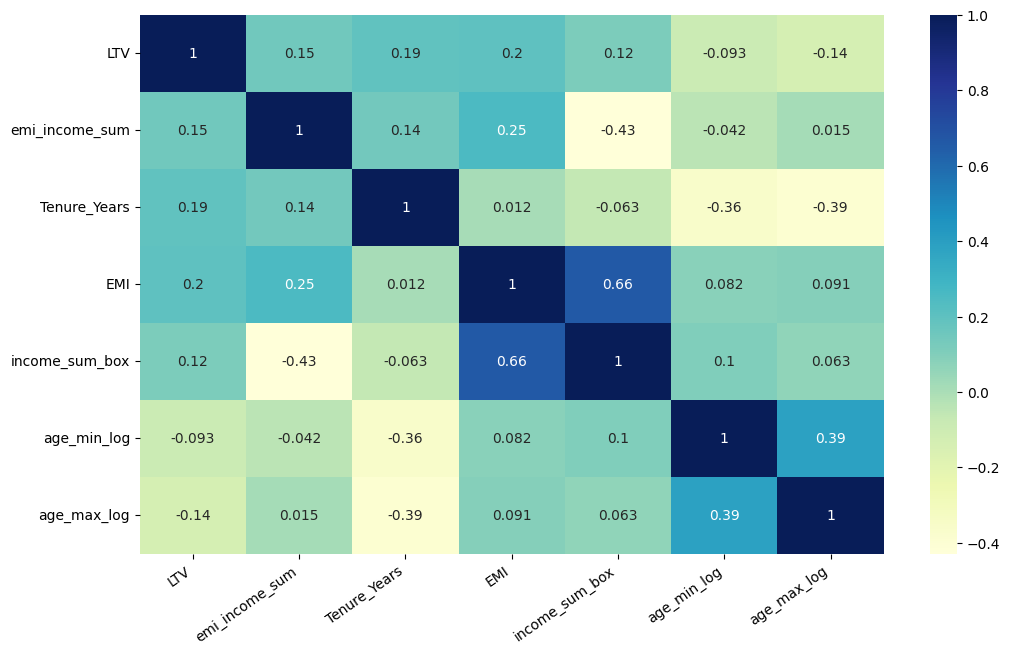

In [458]:
plt.figure(figsize=(12,7))
sns.heatmap(df_model[num_model].corr(), annot=True, cmap="YlGnBu")
plt.xticks(rotation=35, ha='right')
plt.show()

> * The heatmap shows that the numerical features selected for the model have relatively poor correlation.

# Multi-Collinearity of the selected features

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(features):
    a = df1[features]
    a['intercept'] = 1
    vif = pd.DataFrame()
    vif['Features'] = a.columns

    vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
    
    # Filter out the 'intercept' row
    vif = vif[vif['Features'] != 'intercept']

    return vif

In [460]:
fea = ['LTV', 'EMI', 'Tenure_Years', 'income_sum_box', 'age_min_log', 'age_max_log']

calculate_vif(fea)

Features       VIF
0             LTV  1.092675
1             EMI  1.863564
2    Tenure_Years  1.297533
3  income_sum_box  1.807362
4     age_min_log  1.260392
5     age_max_log  1.308167

In [459]:
fea = ['LTV', 'emi_income_sum', 'Tenure_Years', 'income_sum_box', 'age_min_log', 'age_max_log']

calculate_vif(fea)

Features       VIF
0             LTV  1.111704
1  emi_income_sum  1.318090
2    Tenure_Years  1.310199
3  income_sum_box  1.302374
4     age_min_log  1.260829
5     age_max_log  1.309556

In [269]:
calculate_vif(num_model)

Features       VIF
0             LTV  1.111710
1  emi_income_sum  3.467068
2    Tenure_Years  1.311425
3             EMI  4.901868
4  income_sum_box  5.685788
5     age_min_log  1.260837
6     age_max_log  1.310730

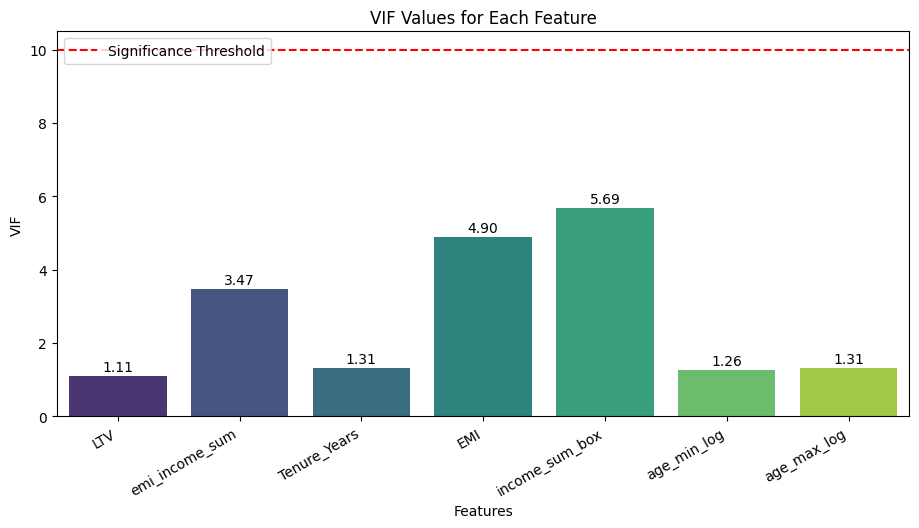

In [270]:
plt.figure(figsize=(11,5))
sns.barplot(x=calculate_vif(num_model)['Features'], y=calculate_vif(num_model)['VIF'], palette='viridis')
plt.axhline(10, color='red', linestyle='--', label='Significance Threshold')
plt.xlabel('Features')
plt.xticks(rotation=30, ha='right')
plt.ylabel('VIF')
plt.legend(loc='upper left')
plt.title('VIF Values for Each Feature')

# Add text labels on top of each bar
for i, v in enumerate(calculate_vif(num_model)['VIF']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

* **LTV: VIF = 1.11.** The VIF is close to 1, suggesting that there is little to no correlation with other variables. This is a good sign.

* **emi_income_sum: VIF = 3.51.** The VIF is between 1 and 5, indicating a moderate level of correlation with other variables. It's generally acceptable but worth keeping an eye on.

* **Tenure_Years: VIF = 1.33.** The VIF is close to 1, suggesting that there is little to no correlation with other variables. This is a good sign.

* **Revenue: VIF = 1.13.** The VIF is close to 1, suggesting that there is little to no correlation with other variables. This is a good sign.

* **EMI: VIF = 4.90.** The VIF is between 1 and 5, indicating a moderate level of correlation with other variables. It's generally acceptable but worth keeping an eye on.

* **income_sum_box: VIF = 5.73.** The VIF is greater than 5, suggesting a high level of correlation with other variables. This might indicate multicollinearity issues that need attention.

* **age_min_log: VIF = 1.26.** The VIF is close to 1, suggesting that there is little to no correlation with other variables. This is a good sign.

* **age_max_log: VIF = 1.31.** The VIF is close to 1, suggesting that there is little to no correlation with other variables. This is a good sign.

---

# Feature Selection of numerical features

* Let us use **t-Test** for the selection of the numerical features considered for model building.

In [271]:
# selecting features based on t-test
significant_num_features = [] # storing the significant values

from scipy import stats

for x in num_model:
    p_value = stats.ttest_ind(df_model.loc[df_model['Status']==1][x], df_model.loc[df_model['Status']==0][x])[1]
    if p_value < 0.05:
        significant_num_features.append(x)
        print(f'The variable {x} is statistically significant with a p_value = {p_value:.2}')
    else:
        print(f'The variable {x} is not statistically significant with a p_value = {p_value:.2}')

The variable LTV is statistically significant with a p_value = 5.5e-09
The variable emi_income_sum is not statistically significant with a p_value = 0.88
The variable Tenure_Years is statistically significant with a p_value = 0.0033
The variable EMI is statistically significant with a p_value = 2e-10
The variable income_sum_box is statistically significant with a p_value = 4.3e-08
The variable age_min_log is not statistically significant with a p_value = 0.12
The variable age_max_log is not statistically significant with a p_value = 0.11


> **We can see that `LTV`, `Tenure_Years`, `EMI` and `income_sum_box` are statistically significant features according to t-Test.**

> These features can now be used for model building.

* Let us now visualise these p values graphically.

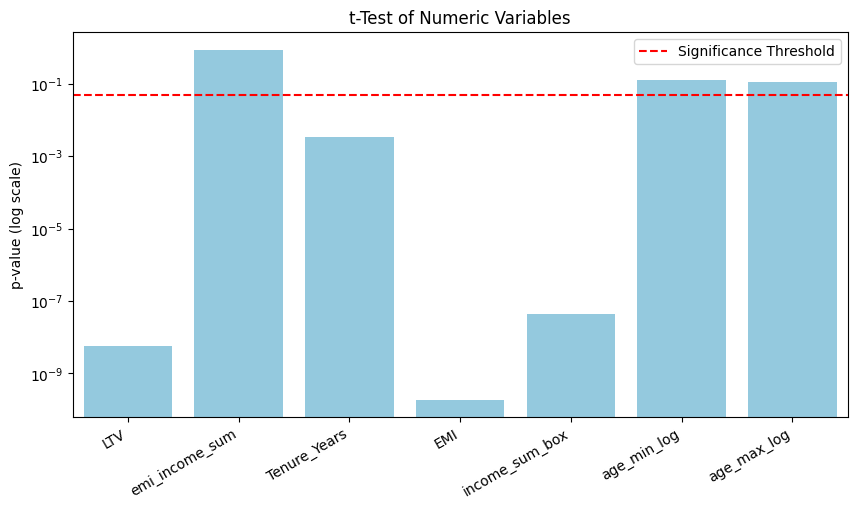

In [272]:
num_model = ['LTV', 'emi_income_sum', 'Tenure_Years', 'EMI', 'income_sum_box', 'age_min_log', 'age_max_log']
p_values = [5.7e-09, 0.88, 0.0033, 1.9e-10, 4.3e-08, 0.13, 0.11]

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=num_model, y=p_values, color='skyblue')
plt.yscale('log')  # Log scale for better visualization of small p-values
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold')
#plt.xlabel('Numeric Variables')
plt.ylabel('p-value (log scale)')
plt.title('t-Test of Numeric Variables')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.show()

# Final dataframe after numerical features selection

In [273]:
df_final = df_model[['LTV','Tenure_Years', 'EMI', 'income_sum_box', 'Status']]

In [274]:
df_final.shape

(13033, 5)

In [275]:
df_final.head()

LTV  Tenure_Years    EMI  income_sum_box Status
0  0.715563            20   5196        1.824110      1
1  0.544463            15  12511        1.828274      1
2  0.566012            20  11431        1.827793      1
3  0.536455            20  18920        1.829882      1
4  0.511949            27  10838        1.826468      1

---

# Feature engineering of Categorical features

In [276]:
# All numerical features
num_model

['LTV',
 'emi_income_sum',
 'Tenure_Years',
 'EMI',
 'income_sum_box',
 'age_min_log',
 'age_max_log']

In [277]:
# All columns
all_cols = list(df_model.columns)

In [278]:
all_cols

['Status',
 'Max_dependent',
 'LTV',
 'Doc_form_16',
 'edu_max',
 'edu_min',
 'count_coapplicant',
 'Organization_type',
 'Salaried_Self',
 'Channel_Code',
 'City_tier',
 'Loan_sub_type_1',
 'Sal_Flag',
 'emi_income_sum',
 'All_TLs',
 'Open_TLs',
 'All_Delinquent_TL_24M',
 'No_of_enq_All',
 'Latest_Bureau_prd',
 'Bureau_TL',
 'EMI',
 'Tenure_Years',
 'income_cat2',
 'income_sum_box',
 'age_min_log',
 'age_max_log',
 'Pprty_Ins_Amt_cat',
 'no_of_years',
 'no_of_years_min']

In [279]:
# Getting only the categorical columns
all_cats = set(all_cols) - set(num_model)
all_cats = list(all_cats)

In [280]:
all_cats

['Sal_Flag',
 'Organization_type',
 'Open_TLs',
 'Salaried_Self',
 'Status',
 'no_of_years_min',
 'income_cat2',
 'Max_dependent',
 'Loan_sub_type_1',
 'count_coapplicant',
 'All_Delinquent_TL_24M',
 'edu_min',
 'Bureau_TL',
 'edu_max',
 'No_of_enq_All',
 'Latest_Bureau_prd',
 'Doc_form_16',
 'Pprty_Ins_Amt_cat',
 'no_of_years',
 'Channel_Code',
 'All_TLs',
 'City_tier']

In [281]:
# Dataframe with only categorical features
df_model[all_cats].columns

Index(['Sal_Flag', 'Organization_type', 'Open_TLs', 'Salaried_Self', 'Status',
       'no_of_years_min', 'income_cat2', 'Max_dependent', 'Loan_sub_type_1',
       'count_coapplicant', 'All_Delinquent_TL_24M', 'edu_min', 'Bureau_TL',
       'edu_max', 'No_of_enq_All', 'Latest_Bureau_prd', 'Doc_form_16',
       'Pprty_Ins_Amt_cat', 'no_of_years', 'Channel_Code', 'All_TLs',
       'City_tier'],
      dtype='object')

In [282]:
df_cat =  df_model[all_cats]

In [283]:
df_cat.shape

(13033, 22)

In [284]:
df_cat.head()

Sal_Flag Organization_type  Open_TLs Salaried_Self Status  no_of_years_min  \
0      SAL  3.Private Ltd Co         2      SALARIED      1              0.2   
1   NONSAL  3.Private Ltd Co         1      SELF_EMP      1              1.6   
2   NONSAL  3.Private Ltd Co         2      SELF_EMP      1              3.1   
3      SAL          1.Others         1      SALARIED      1              5.8   
4      SAL  3.Private Ltd Co      -999      SALARIED      1              7.2   

  income_cat2  Max_dependent    Loan_sub_type_1  count_coapplicant  \
0      medium              0      Builder Ready                  1   
1      medium              2  Self Construction                  1   
2      medium              6  Self Construction                  1   
3      medium              0        Builder UNC                  1   
4      medium              1      Builder Ready                  1   

   All_Delinquent_TL_24M  edu_min         Bureau_TL  edu_max  No_of_enq_All  \
0                      0        2           2.<6 CC        3              8   
1                      2        3   7.<36 AL HL LAS        3              3   
2                      0        3  12.>36 PL TWL GL        3              2   
3                      0        3     13.>36 Others        3              2   
4                      0        3         11.>36 CC        3              2   

  Latest_Bureau_prd Doc_form_16 Pprty_Ins_Amt_cat  no_of_years Channel_Code  \
0                CC           0           Insured          2.7          DSA   
1                HL           0           Insured          5.4          DSA   
2            BL_PSL           0           Insured          3.9  CROSS SALES   
3                AL           0           Insured          7.8          DSA   
4                CC           0       Not Insured          7.2    UBL Sales   

   All_TLs City_tier  
0        4         1  
1        3         3  
2        2         3  
3        2         1  
4        1         1

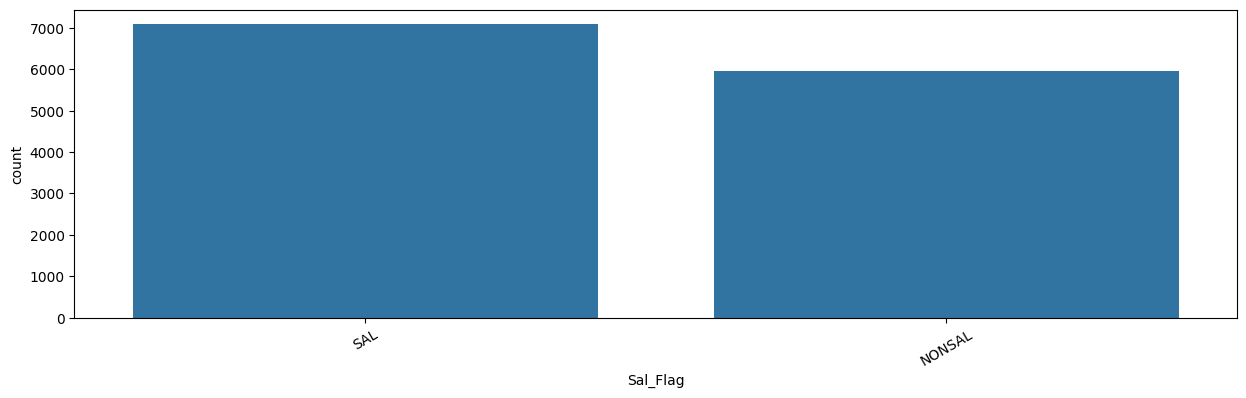

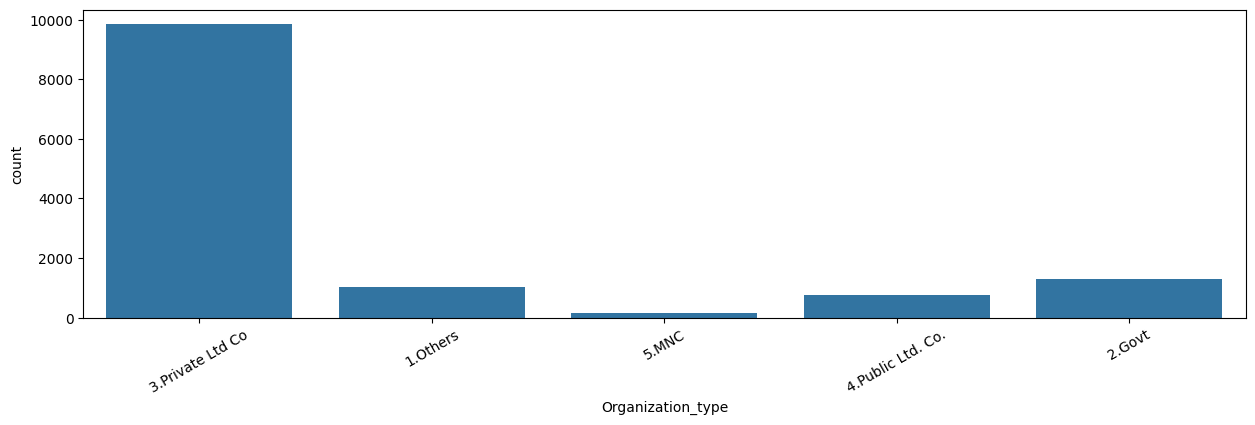

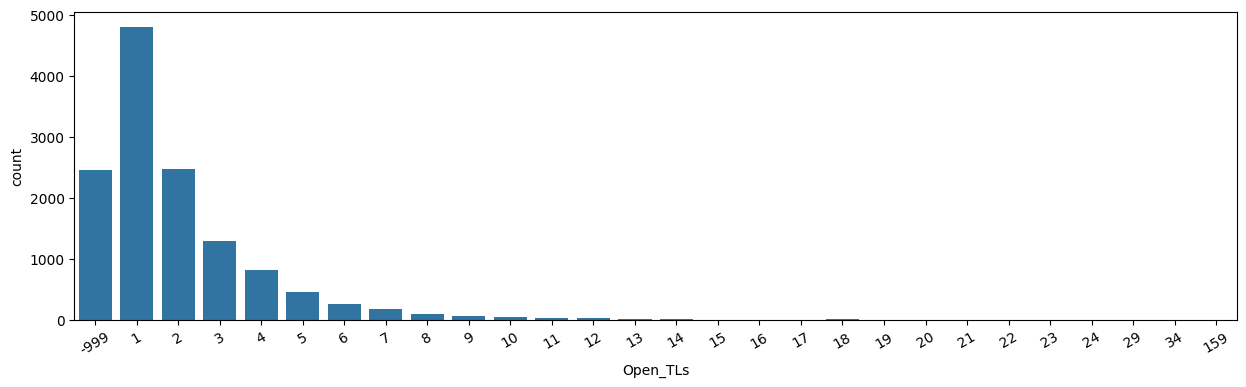

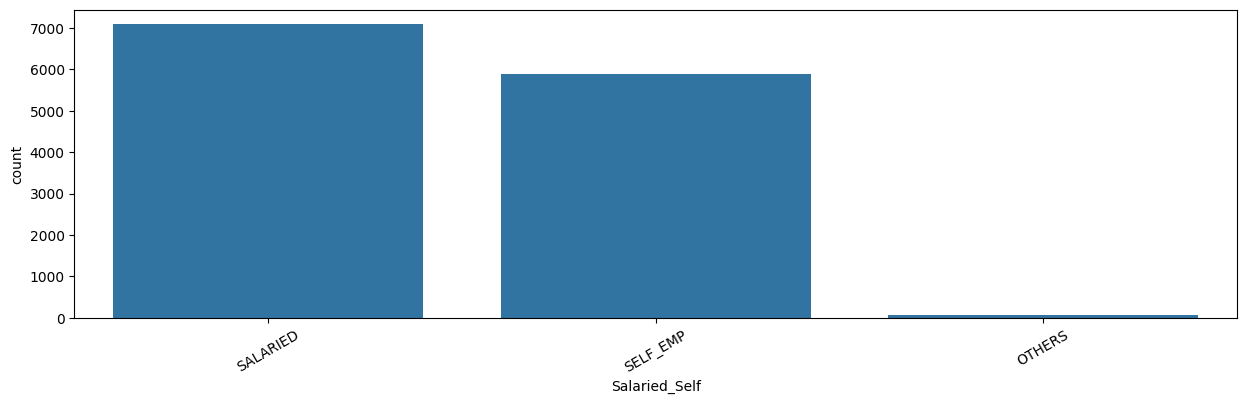

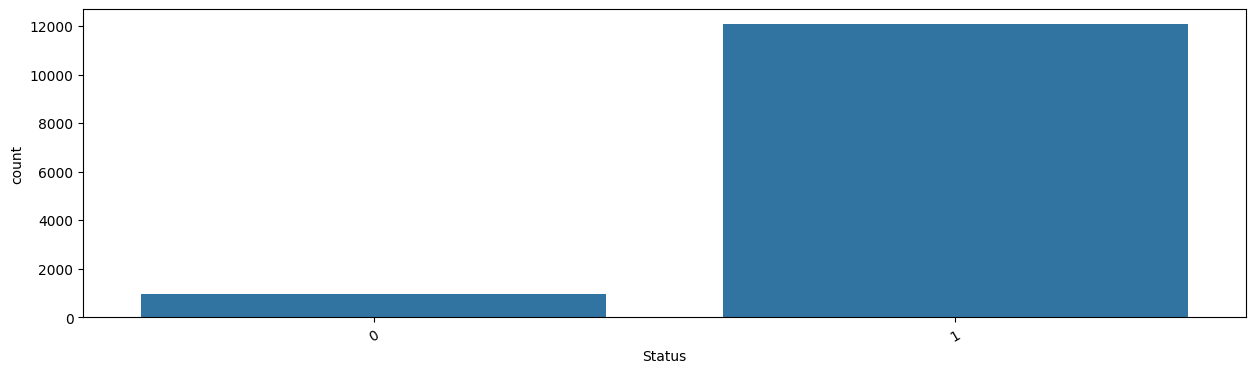

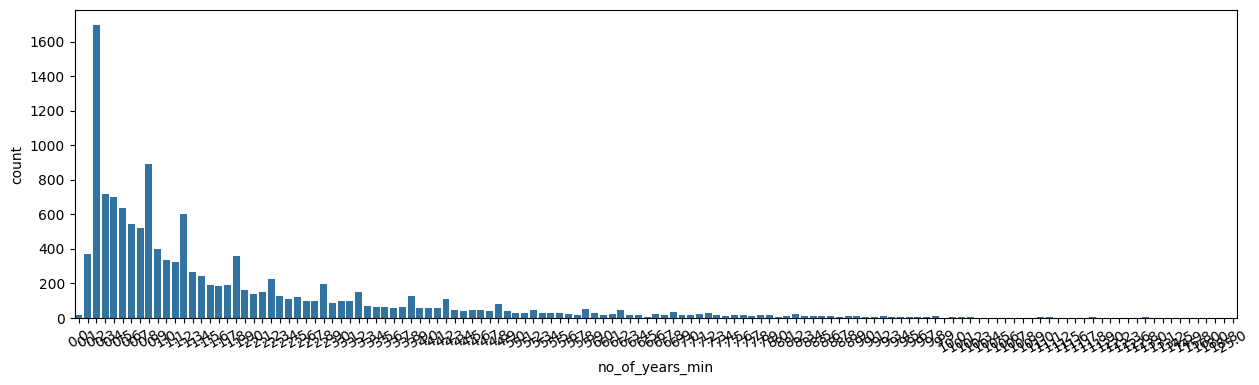

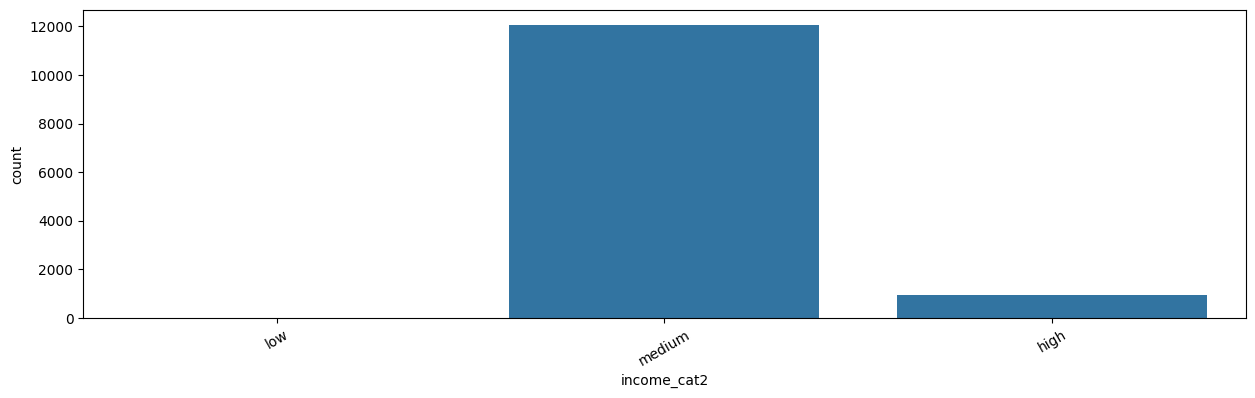

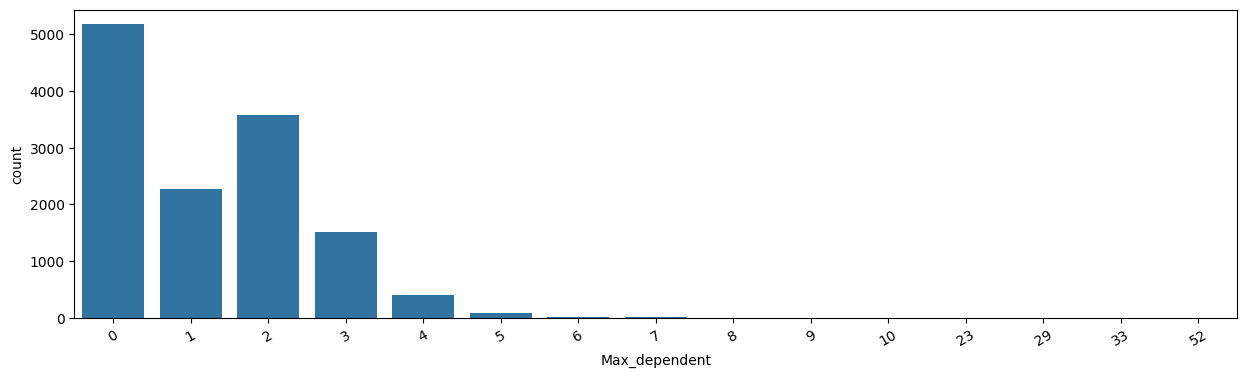

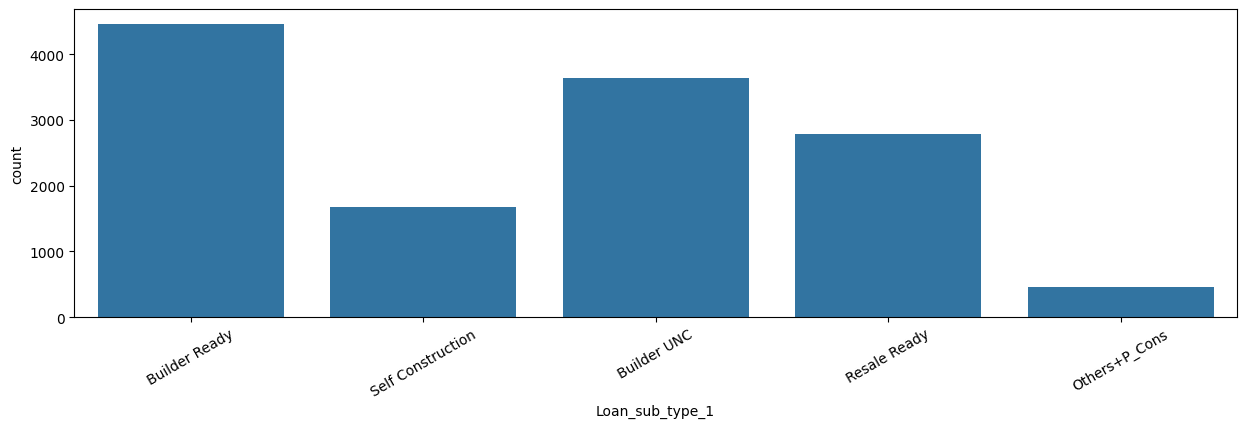

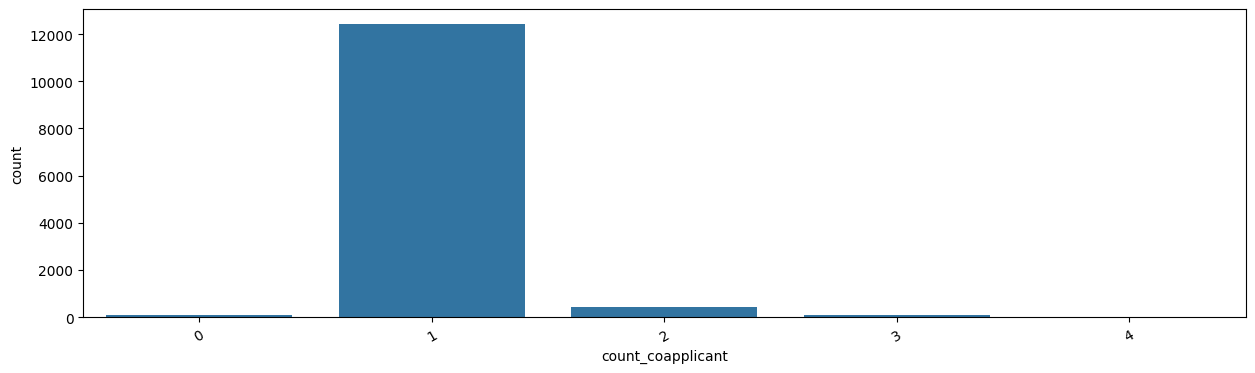

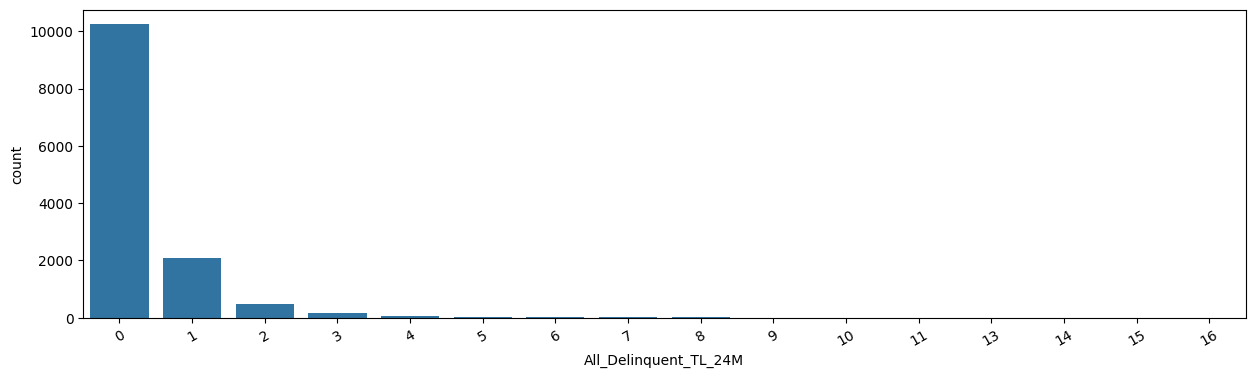

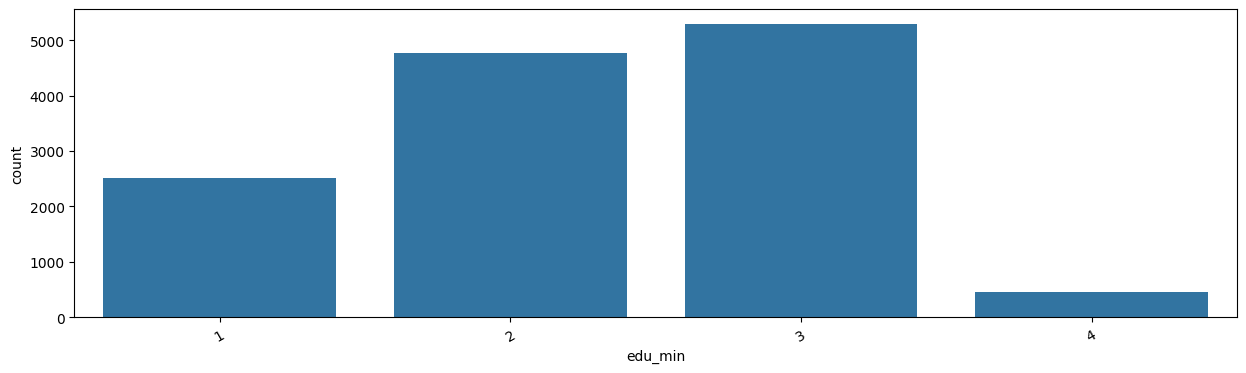

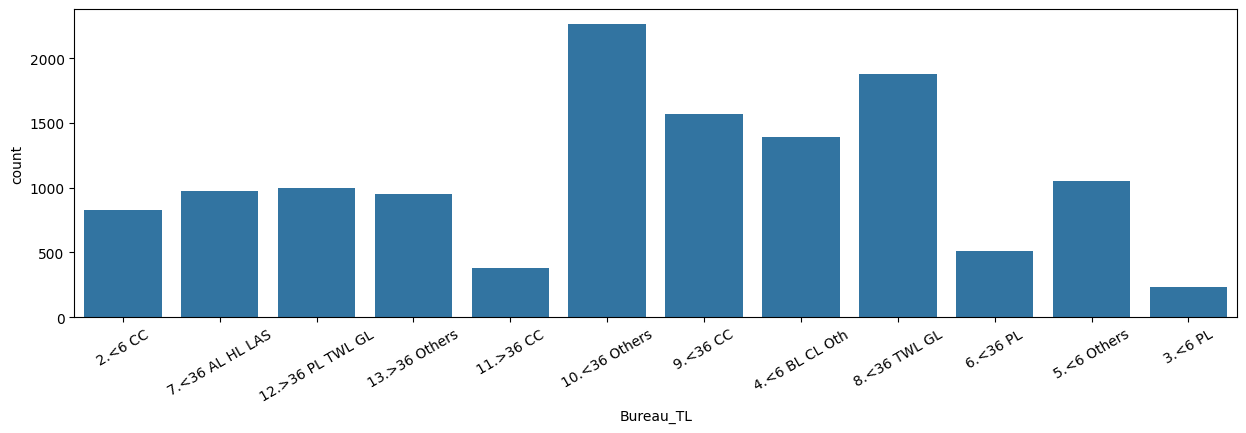

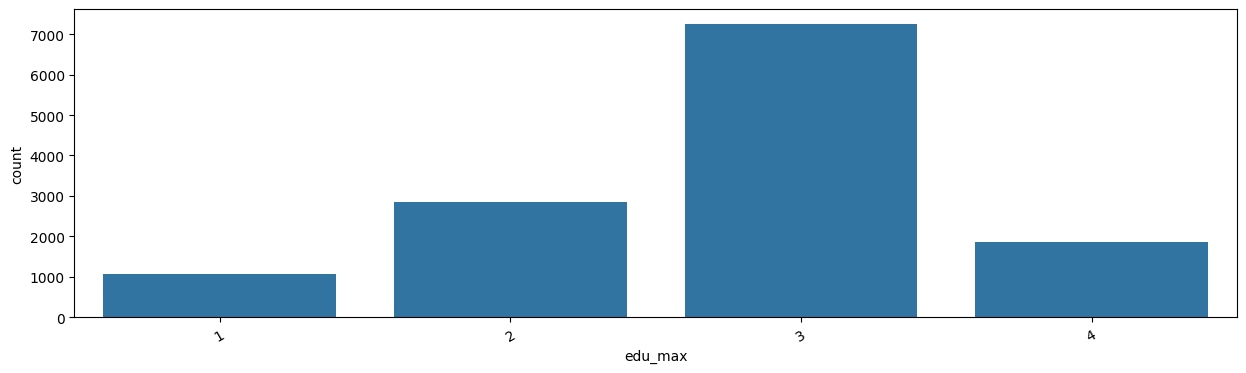

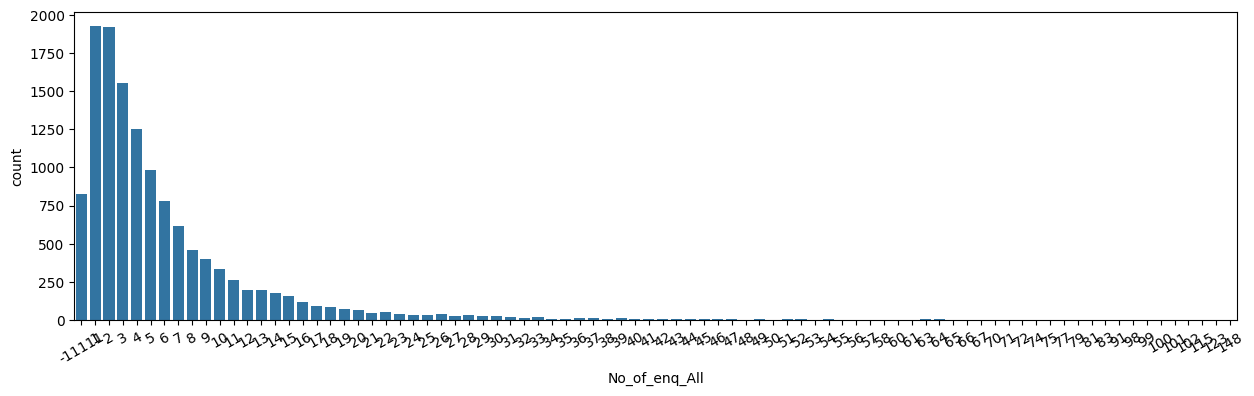

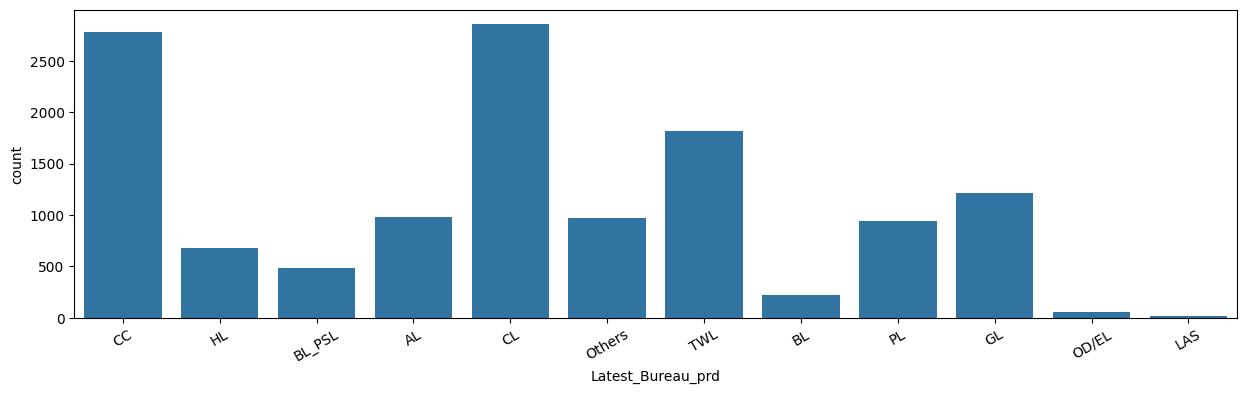

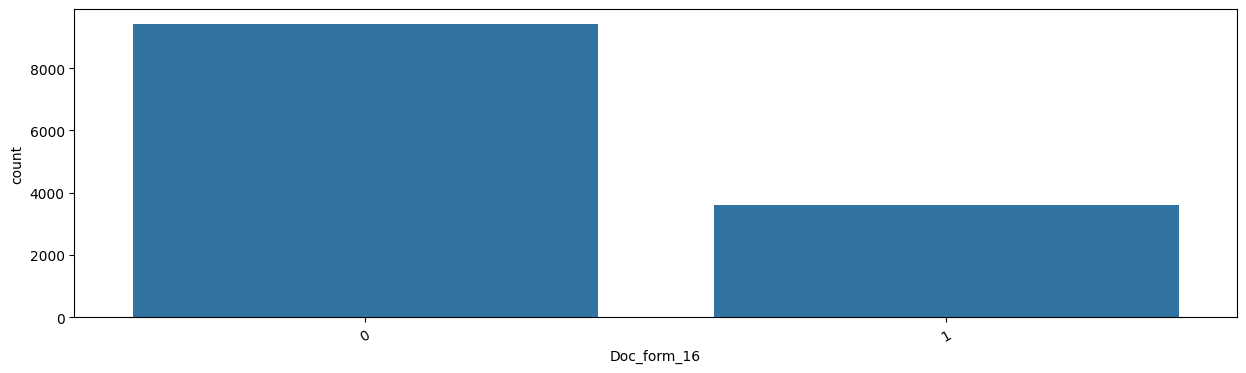

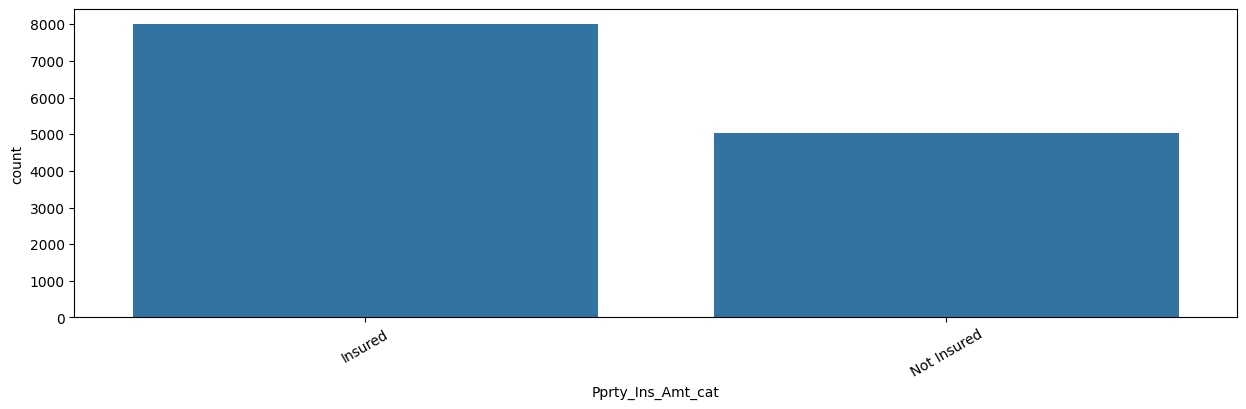

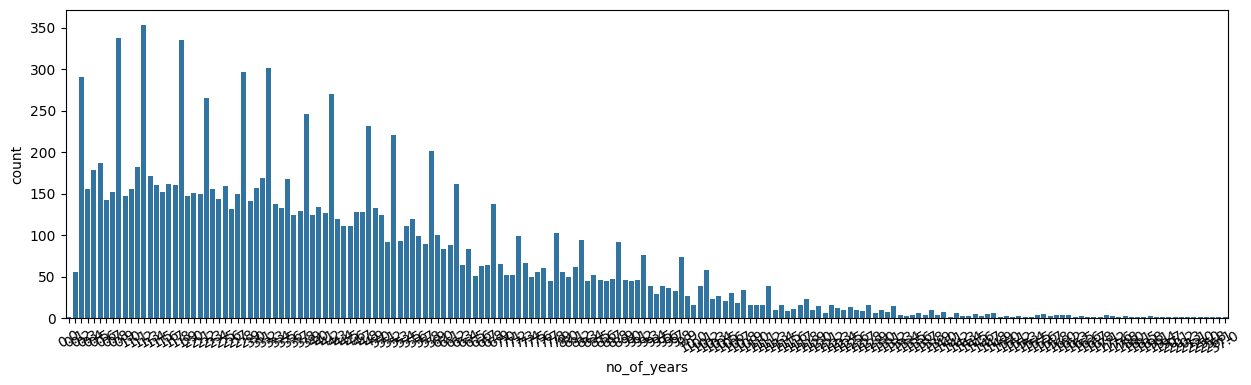

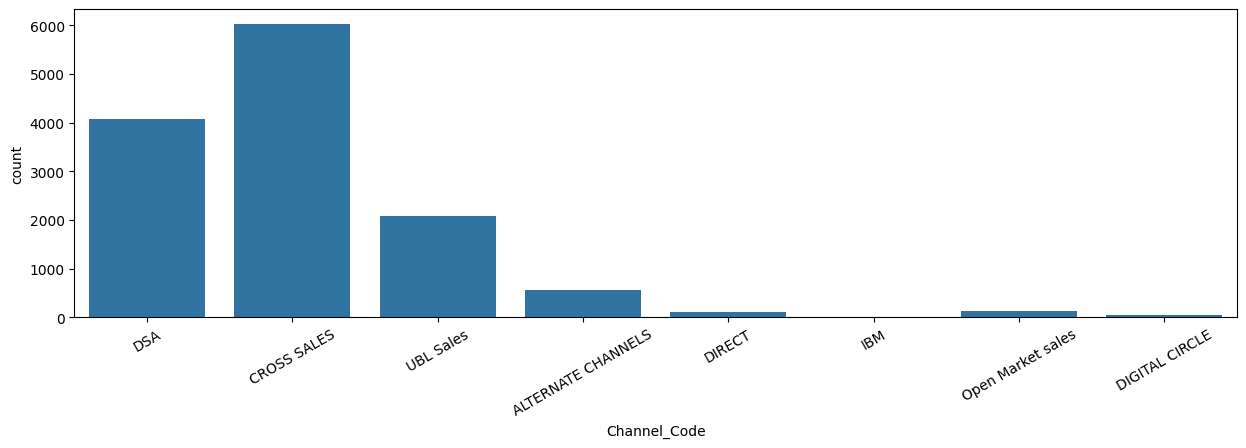

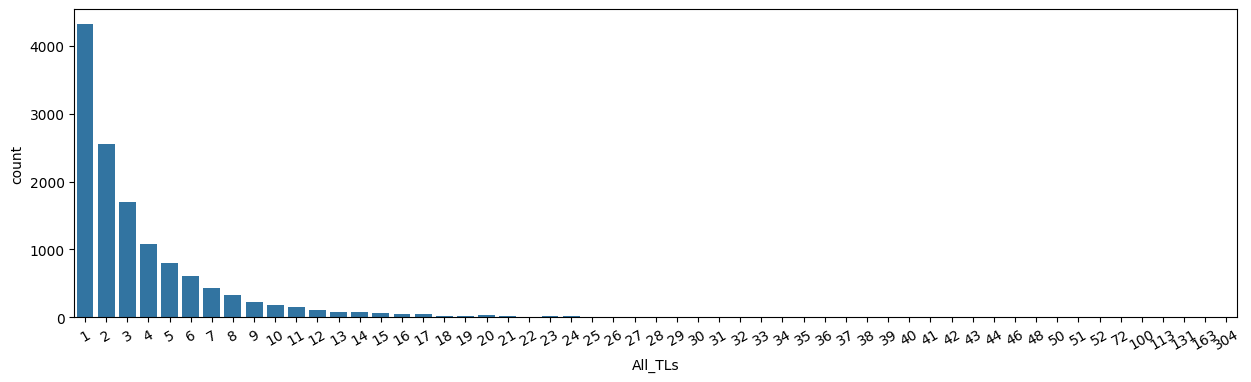

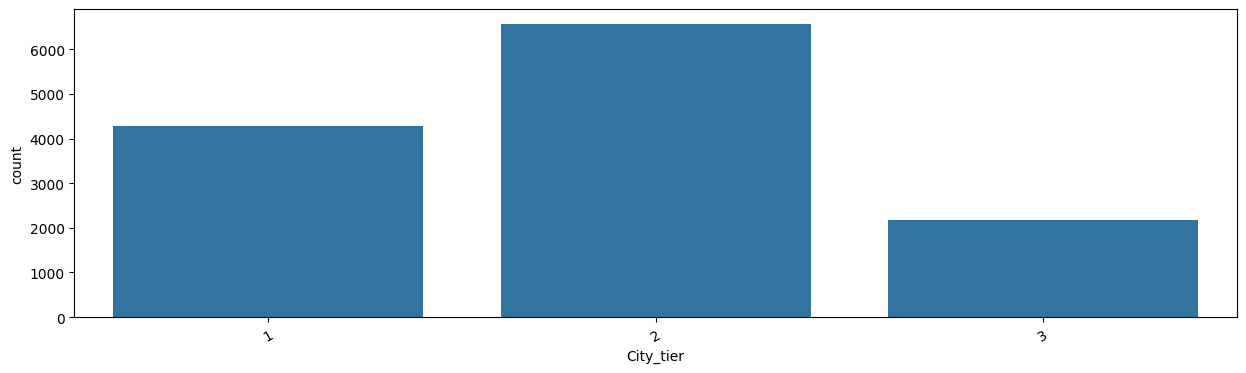

In [285]:
for i in all_cats:
    plt.figure(figsize=(15,4))
    sns.countplot(x=i, data=df_cat)
    plt.xticks(rotation=30)
    plt.show()

## No_of_enq_All

In [286]:
df_cat['No_of_enq_All'].describe()

count    13033.000000
mean      -697.272385
std       2707.256080
min     -11111.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        148.000000
Name: No_of_enq_All, dtype: float64

In [287]:
(df_cat['No_of_enq_All'] < 0).sum()

825

In [288]:
df_cat['No_of_enq_All'].value_counts().sort_index()

No_of_enq_All
-11111     825
 1        1925
 2        1921
 3        1551
 4        1252
          ... 
 101         1
 102         2
 115         1
 123         1
 148         1
Name: count, Length: 84, dtype: int64

* The value of `No_of_enq_All = -11111` doesn't make any sense.
* It must be data entry error.
* Let us replace this with `0`.

In [289]:
df_cat['No_of_enq_All'].replace(-11111, 0, inplace=True)

In [290]:
df_cat['No_of_enq_All'].describe()

count    13033.000000
mean         6.063378
std          7.840881
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        148.000000
Name: No_of_enq_All, dtype: float64

In [291]:
df_cat['No_of_enq_All'].value_counts().sort_index()

No_of_enq_All
0       825
1      1925
2      1921
3      1551
4      1252
       ... 
101       1
102       2
115       1
123       1
148       1
Name: count, Length: 84, dtype: int64

In [292]:
df_cat['No_of_enq_All'].value_counts().sort_index().index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  61,  63,  64,  65,  66,  67,  70,  71,  72,  74,
        75,  77,  79,  81,  83,  91,  98,  99, 100, 101, 102, 115, 123, 148],
      dtype='int64', name='No_of_enq_All')

In [293]:
df_cat['No_of_enq_All'].value_counts().sort_index()[:10].values.sum() # selecting the top 10

10709

* It appears that `82%` of the values of this feature are `less than 10`.

In [294]:
df_cat['No_of_enq_All'].value_counts().sort_index()[10:].values.sum() # selecting the rest

2324

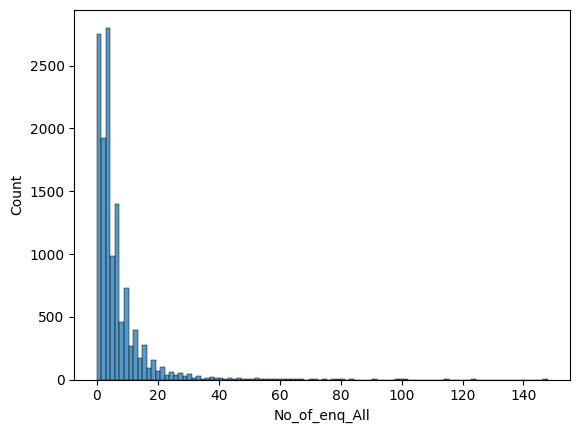

In [295]:
# Lets check the distplot of the feature
sns.histplot(df_cat['No_of_enq_All'], bins=100, kde=False)
#sns.distplot(df_cat['No_of_enq_All'], bins=80)
plt.show()

* Now let us make bins of the values in the feature for better readability.

In [296]:
df_cat['All_enq_bins'] = pd.cut(x = df_cat['No_of_enq_All'],
                                bins=[-1,1,2,3,10,20,30,50,151],
                                labels=['0','1-2','2-3','3-10','10-20','20-30','30-50','50-151'])

In [297]:
df_cat['All_enq_bins'].value_counts().sort_index()

All_enq_bins
0         2750
1-2       1921
2-3       1551
3-10      4822
10-20     1419
20-30      349
30-50      163
50-151      58
Name: count, dtype: int64

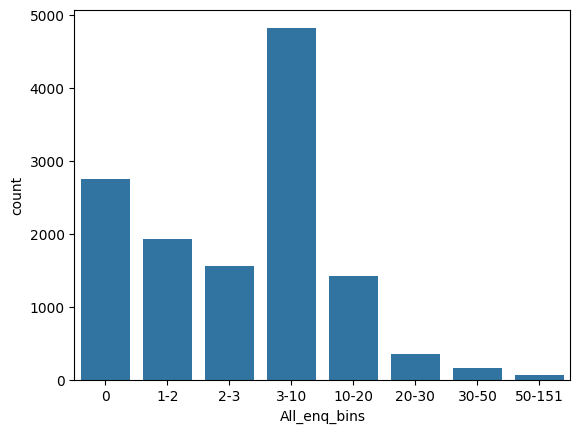

In [298]:
sns.countplot(x='All_enq_bins', data=df_cat)
plt.show()

In [299]:
df_cat['All_enq_bins'].dtype

CategoricalDtype(categories=['0', '1-2', '2-3', '3-10', '10-20', '20-30', '30-50',
                  '50-151'],
, ordered=True, categories_dtype=object)

In [300]:
# converting to object
df_cat['All_enq_bins'] = df_cat['All_enq_bins'].astype('object')

In [301]:
df_cat['All_enq_bins'].describe()

count     13033
unique        8
top        3-10
freq       4822
Name: All_enq_bins, dtype: object

* Now that the values of the feature are within bins, let us further bring down the number of bins.

In [302]:
df_cat['All_enq_bins'] = pd.cut(x = df_cat['No_of_enq_All'],
                                bins=[-1,2,4,10,151],
                                labels=['0(Inclusive)-2','2-4','4-10','10+'])

In [303]:
df_cat['All_enq_bins'].value_counts().sort_index()

All_enq_bins
0(Inclusive)-2    4671
2-4               2803
4-10              3570
10+               1989
Name: count, dtype: int64

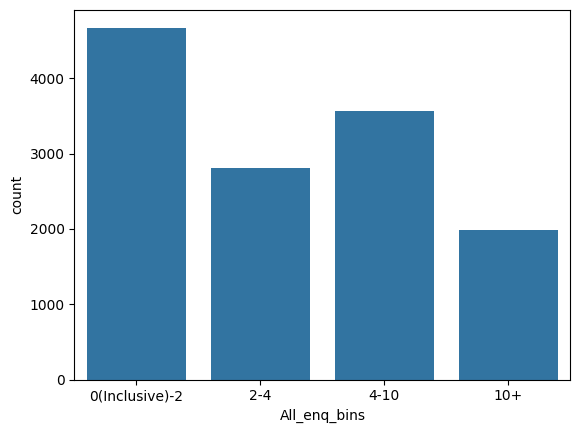

In [304]:
sns.countplot(x='All_enq_bins', data=df_cat)
plt.show()

In [305]:
df_cat['All_enq_bins'].dtype

CategoricalDtype(categories=['0(Inclusive)-2', '2-4', '4-10', '10+'], ordered=True, categories_dtype=object)

In [306]:
# converting to object
df_cat['All_enq_bins'] = df_cat['All_enq_bins'].astype('object')

In [307]:
df_cat['All_enq_bins'].describe()

count              13033
unique                 4
top       0(Inclusive)-2
freq                4671
Name: All_enq_bins, dtype: object

## All_Delinquent_TL_24M

In [308]:
df_cat['All_Delinquent_TL_24M'].nunique()

16

In [309]:
df_cat['All_Delinquent_TL_24M'].unique()

array([ 0,  2,  1,  4,  5,  3, 10,  7,  6, 13,  8, 15, 11,  9, 16, 14],
      dtype=int64)

In [310]:
df_cat['All_Delinquent_TL_24M'].describe()

count    13033.000000
mean         0.306606
std          0.759673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: All_Delinquent_TL_24M, dtype: float64

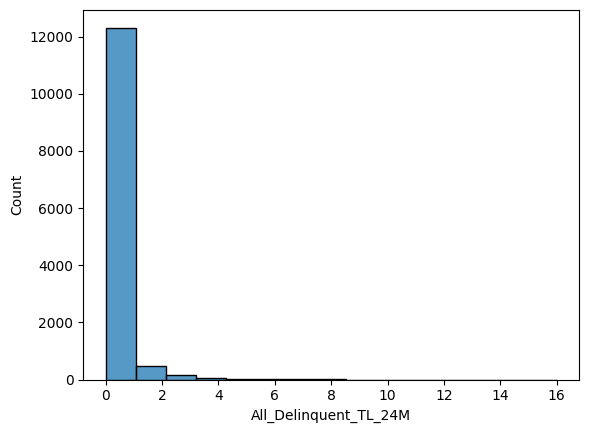

In [311]:
sns.histplot(x='All_Delinquent_TL_24M', data=df1)
plt.show()

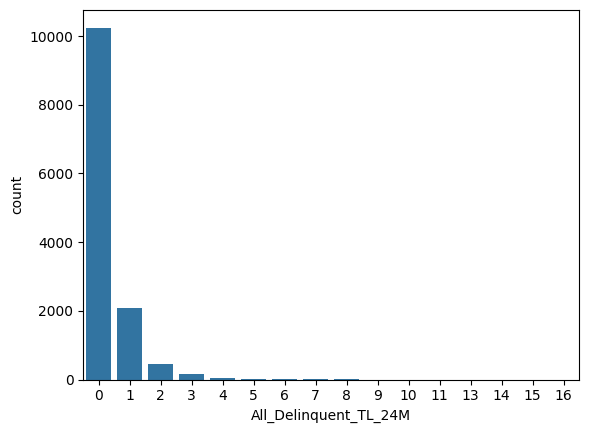

In [312]:
sns.countplot(x='All_Delinquent_TL_24M', data=df_cat)
plt.show()

In [313]:
df_cat['All_Delinquent_TL_24M'].value_counts()

All_Delinquent_TL_24M
0     10246
1      2071
2       461
3       151
4        57
5        22
7        10
6         5
8         3
10        1
13        1
15        1
11        1
9         1
16        1
14        1
Name: count, dtype: int64

* `78%` of the values are `0` and the rest are `non-zeroes`.
* `78%` of the customers have no delinquent tradelines reported in the last `24 months`.
* Let's convert it into a feature with two class viz. `zero` & `non-zero`.

In [314]:
df_cat['All_Delq_TL'] = df_cat['All_Delinquent_TL_24M'].apply(lambda x:'zero' if x==0 else 'non-zero')

In [315]:
df_cat['All_Delq_TL'].value_counts()

All_Delq_TL
zero        10246
non-zero     2787
Name: count, dtype: int64

In [316]:
df_cat['All_Delq_TL'].describe()

count     13033
unique        2
top        zero
freq      10246
Name: All_Delq_TL, dtype: object

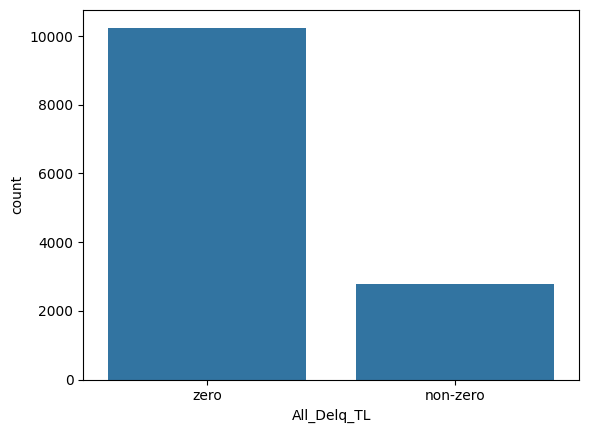

In [317]:
sns.countplot(x='All_Delq_TL', data=df_cat)
plt.show()

## No_of_years

In [318]:
df_cat['no_of_years'].nunique()

186

In [319]:
df_cat['no_of_years'].describe()

count    13033.000000
mean         4.231037
std          3.125679
min          0.000000
25%          1.800000
50%          3.600000
75%          5.900000
max         37.000000
Name: no_of_years, dtype: float64

In [320]:
df_cat['no_of_years'].value_counts()

no_of_years
1.2     354
0.8     338
1.8     336
3.2     302
2.8     297
       ... 
37.0      1
20.2      1
14.9      1
18.5      1
15.1      1
Name: count, Length: 186, dtype: int64

In [321]:
df_cat['no_of_years'].value_counts().sort_index().index

Index([ 0.0,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
       ...
       19.7, 20.1, 20.2, 20.3, 21.1, 22.0, 25.0, 25.8, 26.1, 37.0],
      dtype='float64', name='no_of_years', length=186)

In [322]:
# Let us round up the values
df_cat['no_of_years1'] = df_cat['no_of_years'].apply(lambda x: round(x,0))

In [323]:
df_cat['no_of_years1'].value_counts().sort_index().index

Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
       12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 25.0,
       26.0, 37.0],
      dtype='float64', name='no_of_years1')

In [324]:
df_cat['no_of_years1'].value_counts().sort_index()

no_of_years1
0.0      870
1.0     1802
2.0     1982
3.0     1618
4.0     1664
5.0     1262
6.0     1140
7.0      648
8.0      664
9.0      463
10.0     391
11.0     195
12.0     138
13.0      76
14.0      48
15.0      21
16.0      23
17.0       8
18.0       6
19.0       4
20.0       4
21.0       1
22.0       1
25.0       1
26.0       2
37.0       1
Name: count, dtype: int64

In [325]:
df_cat['no_of_years1'].describe()

count    13033.000000
mean         4.224047
std          3.154963
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         37.000000
Name: no_of_years1, dtype: float64

In [326]:
df_cat['no_of_years1'].value_counts().sort_index()[:8].values.sum() # selecting the top 10

11650

In [327]:
df_cat['no_of_years1'].value_counts().sort_index()[9:].values.sum() # selecting the rest

1383

* Let's make the bins for the feature.

In [328]:
df_cat['no_of_years_bins'] = pd.cut(x = df_cat['no_of_years1'],
                                    bins=[-1,2,4,7,10,37],
                                    labels=['0(Inclusive)-2','2-4','4-7','7-10','10+'])

In [329]:
df_cat['no_of_years_bins'].value_counts()

no_of_years_bins
0(Inclusive)-2    4654
2-4               3282
4-7               3050
7-10              1518
10+                529
Name: count, dtype: int64

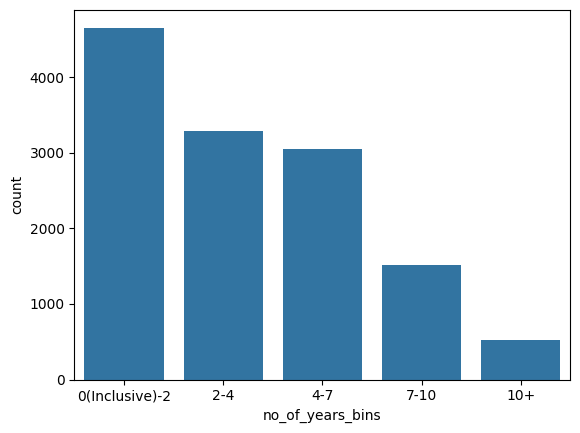

In [330]:
sns.countplot(x='no_of_years_bins', data=df_cat)
plt.show()

In [331]:
df_cat['no_of_years_bins'] = df_cat['no_of_years_bins'].astype('object')

In [332]:
df_cat['no_of_years_bins'].describe()

count              13033
unique                 5
top       0(Inclusive)-2
freq                4654
Name: no_of_years_bins, dtype: object

## No_of_years_min

In [333]:
df_cat['no_of_years_min'].nunique()

133

In [334]:
df_cat['no_of_years_min'].value_counts().sort_index().index

Index([ 0.0,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
       ...
       13.0, 13.1, 13.2, 14.5, 14.9, 15.8, 16.0, 18.0, 18.8, 25.0],
      dtype='float64', name='no_of_years_min', length=133)

In [335]:
df_cat['no_of_years_min'].value_counts().sort_index()[:6].values.sum()

12439

In [336]:
# Let us round up the values
df_cat['no_of_years_min1'] = df_cat['no_of_years_min'].apply(lambda x: round(x,0))

In [337]:
df_cat['no_of_years_min1'].value_counts().sort_index().index

Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
       12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 25.0],
      dtype='float64', name='no_of_years_min1')

In [338]:
df_cat['no_of_years_min1'].value_counts().sort_index()

no_of_years_min1
0.0     4146
1.0     4118
2.0     1956
3.0      957
4.0      723
5.0      369
6.0      275
7.0      183
8.0      148
9.0       67
10.0      47
11.0      14
12.0      13
13.0       9
14.0       2
15.0       1
16.0       2
18.0       1
19.0       1
25.0       1
Name: count, dtype: int64

In [339]:
# Bins
df_cat['no_of_years_min_bins'] = pd.cut(x=df_cat['no_of_years_min1'],
                                        bins=[-1,1,2,3,5,25],
                                        labels=['0(Inclusive)-1','1-2','2-3','3-5','5+'])

In [340]:
df_cat['no_of_years_min_bins'].value_counts()

no_of_years_min_bins
0(Inclusive)-1    8264
1-2               1956
3-5               1092
2-3                957
5+                 764
Name: count, dtype: int64

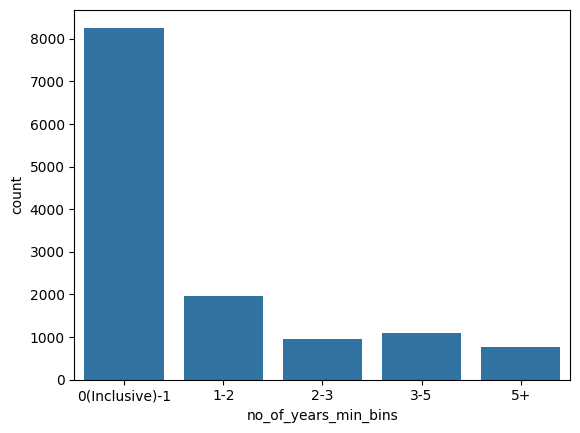

In [341]:
sns.countplot(x='no_of_years_min_bins', data=df_cat)
plt.show()

In [342]:
# Converting to object
df_cat['no_of_years_min_bins'] = df_cat['no_of_years_min_bins'].astype('object')

## All_TLs

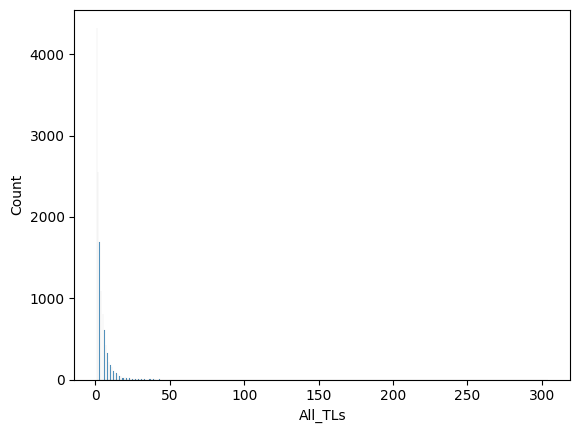

In [343]:
sns.histplot(x='All_TLs', data=df1)
plt.show()

In [344]:
df_cat['All_TLs'].nunique()

55

In [345]:
df_cat['All_TLs'].value_counts()

All_TLs
1      4328
2      2549
3      1694
4      1085
5       803
6       613
7       431
8       324
9       221
10      180
11      152
12      104
13       84
14       78
15       65
16       49
17       48
20       31
18       25
19       22
21       18
23       14
24       12
22        9
26        9
30        8
27        8
25        8
33        7
37        6
29        6
31        5
28        5
32        4
36        4
40        2
38        2
39        2
43        2
51        1
131       1
50        1
72        1
35        1
44        1
163       1
34        1
41        1
304       1
46        1
100       1
48        1
52        1
42        1
113       1
Name: count, dtype: int64

In [346]:
# making bins
df_cat['All_no_of_loans'] = pd.cut(x = df_cat['All_TLs'],
                                   bins=[-1,1,2,4,8,304],
                                   labels=['1','2','3-4','5-8','9+'])

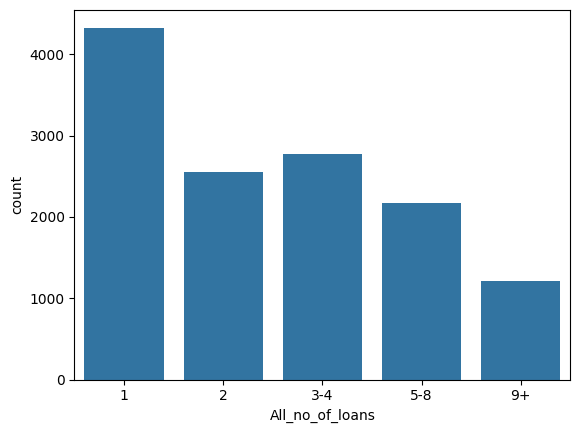

In [347]:
sns.countplot(x='All_no_of_loans', data=df_cat, order = df_cat['All_no_of_loans'].value_counts().sort_index().index)
plt.show()

In [348]:
df_cat['All_no_of_loans'].value_counts().sort_index()

All_no_of_loans
1      4328
2      2549
3-4    2779
5-8    2171
9+     1206
Name: count, dtype: int64

In [349]:
df_cat['All_no_of_loans'].describe()

count     13033
unique        5
top           1
freq       4328
Name: All_no_of_loans, dtype: object

In [350]:
#df_cat['All_no_of_loans'].isna().sum()

In [351]:
# Converting to object & filling the missing values with 1
df_cat['All_no_of_loans'] = df_cat['All_no_of_loans'].astype('object')
#df_cat['All_no_of_loans'].fillna('1', inplace=True)

## Open_TLs

In [352]:
df_cat['Open_TLs'].nunique()

28

In [353]:
df_cat['Open_TLs'].value_counts()

Open_TLs
 1      4810
 2      2469
-999    2450
 3      1295
 4       813
 5       455
 6       258
 7       180
 8        97
 9        67
 10       41
 12       28
 11       24
 13        9
 18        9
 14        8
 17        3
 20        2
 23        2
 19        2
 15        2
 22        2
 16        2
 24        1
 29        1
 159       1
 34        1
 21        1
Name: count, dtype: int64

* The value of `Open_TLs = -999` doesn't make any sense.
* It must be data entry error.
* Let us replace this with 0.

In [354]:
df_cat['Open_TLs'].replace(-999, 0, inplace=True)

In [355]:
df_cat['Open_TLs'].value_counts().sort_index()

Open_TLs
0      2450
1      4810
2      2469
3      1295
4       813
5       455
6       258
7       180
8        97
9        67
10       41
11       24
12       28
13        9
14        8
15        2
16        2
17        3
18        9
19        2
20        2
21        1
22        2
23        2
24        1
29        1
34        1
159       1
Name: count, dtype: int64

In [356]:
df_cat['Open_TLs'].value_counts().sort_index()[:5].values.sum()

11837

In [357]:
df_cat['Open_TLs'].value_counts().sort_index()[5:].values.sum()

1196

In [358]:
# Making bins
df_cat['Active_loans'] = pd.cut(x = df_cat['Open_TLs'],
                                bins=[0,1,2,4,159],
                                labels=['1','1-2','2-4','4+'])

In [359]:
df_cat['Active_loans'].describe()

count     10583
unique        4
top           1
freq       4810
Name: Active_loans, dtype: object

In [360]:
df_cat['Active_loans'].value_counts()

Active_loans
1      4810
1-2    2469
2-4    2108
4+     1196
Name: count, dtype: int64

In [361]:
df_cat.isna().sum().sort_index(ascending=True)

Active_loans             2450
All_Delinquent_TL_24M       0
All_Delq_TL                 0
All_TLs                     0
All_enq_bins                0
All_no_of_loans             0
Bureau_TL                   0
Channel_Code                0
City_tier                   0
Doc_form_16                 0
Latest_Bureau_prd           0
Loan_sub_type_1             0
Max_dependent               0
No_of_enq_All               0
Open_TLs                    0
Organization_type           0
Pprty_Ins_Amt_cat           0
Sal_Flag                    0
Salaried_Self               0
Status                      0
count_coapplicant           0
edu_max                     0
edu_min                     0
income_cat2                 0
no_of_years                 0
no_of_years1                0
no_of_years_bins            0
no_of_years_min             0
no_of_years_min1            0
no_of_years_min_bins        0
dtype: int64

In [362]:
# Converting & filling up
df_cat['Active_loans'] = df_cat['Active_loans'].astype('object')
df_cat['Active_loans'].fillna('0',inplace=True)

In [363]:
df_cat['Active_loans'].value_counts().sort_index()

Active_loans
0      2450
1      4810
1-2    2469
2-4    2108
4+     1196
Name: count, dtype: int64

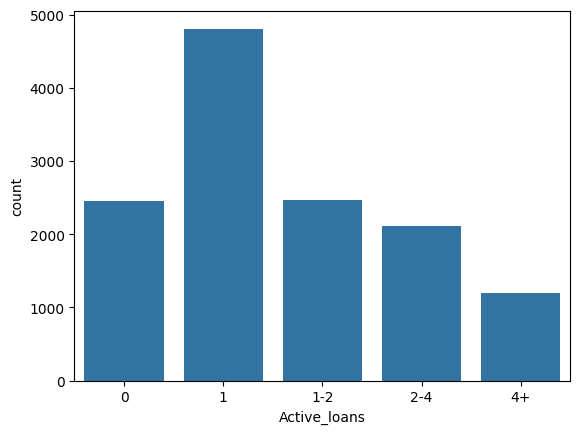

In [364]:
sns.countplot(x='Active_loans', data=df_cat, order = df_cat['Active_loans'].value_counts().sort_index().index)
plt.show()

## Max_dependent

In [365]:
df_cat['Max_dependent'].nunique()

15

In [366]:
df_cat['Max_dependent'].value_counts().sort_index()

Max_dependent
0     5178
1     2272
2     3570
3     1510
4      393
5       85
6       15
7        3
8        1
9        1
10       1
23       1
29       1
33       1
52       1
Name: count, dtype: int64

In [367]:
# making bins
df_cat['Dependent_bins'] = pd.cut(x = df_cat['Max_dependent'], bins=[-1,0,1,2,52], labels=['0','1','2','3+'])

In [368]:
df_cat['Dependent_bins'].value_counts().sort_index()

Dependent_bins
0     5178
1     2272
2     3570
3+    2013
Name: count, dtype: int64

In [369]:
# converting & filling
df_cat['Dependent_bins'] = df_cat['Dependent_bins'].astype('object')
#df_cat['Dependent_bins'].fillna('0', inplace=True)

In [370]:
df_cat['Dependent_bins'].value_counts().sort_index()

Dependent_bins
0     5178
1     2272
2     3570
3+    2013
Name: count, dtype: int64

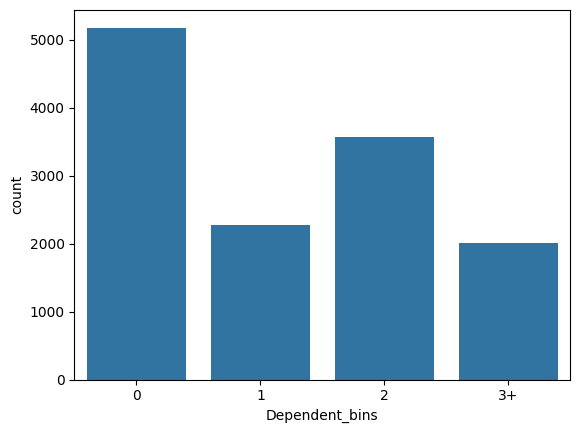

In [371]:
sns.countplot(x='Dependent_bins', data=df_cat, order = df_cat['Dependent_bins'].value_counts().sort_index().index)
plt.show()

## Channel_Code

In [372]:
df_cat['Channel_Code'].value_counts()

Channel_Code
CROSS SALES           6030
DSA                   4067
UBL Sales             2090
ALTERNATE CHANNELS     552
Open Market sales      127
DIRECT                 118
DIGITAL CIRCLE          39
IBM                     10
Name: count, dtype: int64

> Let us map the values.

In [373]:
df_cat['Channel_Code'] = df_cat['Channel_Code'].map({'CROSS SALES':1, 'DSA':2, 'UBL Sales':3,
                                                    'ALTERNATE CHANNELS':4, 'Open Market sales':4,
                                                    'DIRECT':4, 'DIGITAL CIRCLE':4, 'IBM':4})

In [374]:
df_cat['Channel_Code'].value_counts()

Channel_Code
1    6030
2    4067
3    2090
4     846
Name: count, dtype: int64

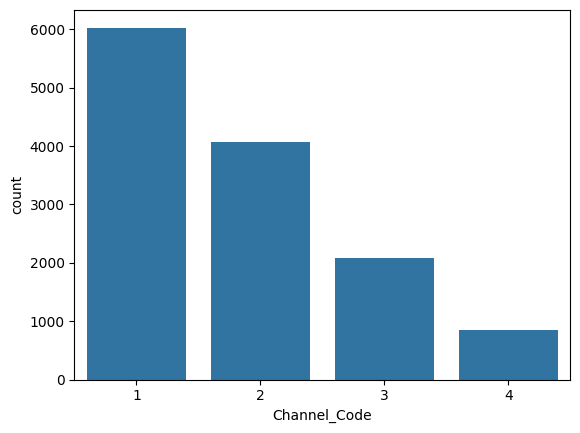

In [375]:
sns.countplot(x='Channel_Code', data=df_cat)
plt.show()

## Count_coapplicant

In [376]:
df_cat['count_coapplicant'].value_counts().sort_index(ascending=True)

count_coapplicant
0       80
1    12444
2      437
3       66
4        6
Name: count, dtype: int64

> Mapping the feature.

In [377]:
df_cat['count_coapplicant'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [378]:
df_cat['count_coapplicant'] = df_cat['count_coapplicant'].map({0:0, 1:1, 2:2, 3:2, 4:2})

In [379]:
df_cat['count_coapplicant'].unique()

array([1, 0, 2], dtype=int64)

In [380]:
df_cat['count_coapplicant'].value_counts().sort_index(ascending=True)

count_coapplicant
0       80
1    12444
2      509
Name: count, dtype: int64

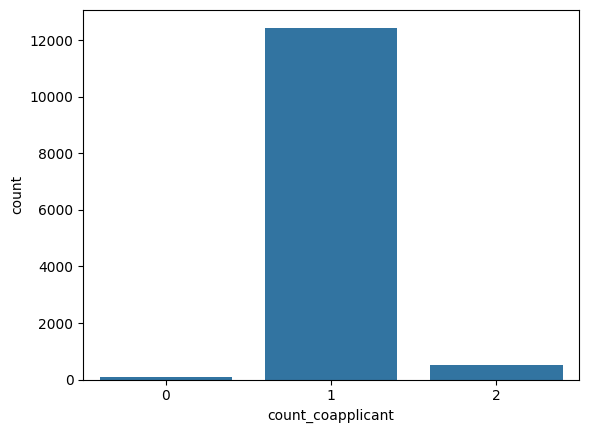

In [381]:
sns.countplot(x='count_coapplicant', data=df_cat)
plt.show()

## edu_min

In [382]:
df_cat['edu_min'].value_counts().sort_index(ascending=True)

edu_min
1    2508
2    4777
3    5300
4     448
Name: count, dtype: int64

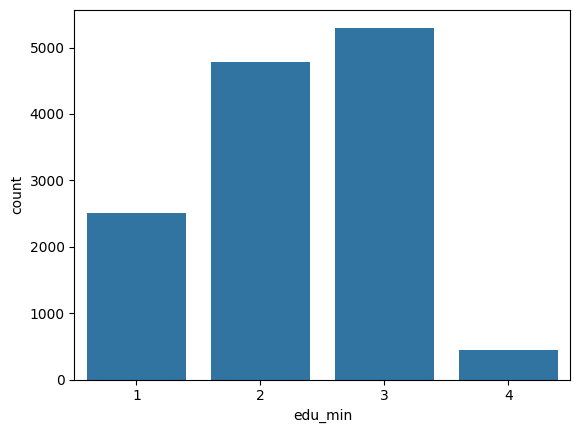

In [383]:
sns.countplot(x='edu_min', data=df_cat)
plt.show()

## edu_max

In [384]:
df_cat['edu_max'].value_counts().sort_index(ascending=True)

edu_max
1    1062
2    2853
3    7264
4    1854
Name: count, dtype: int64

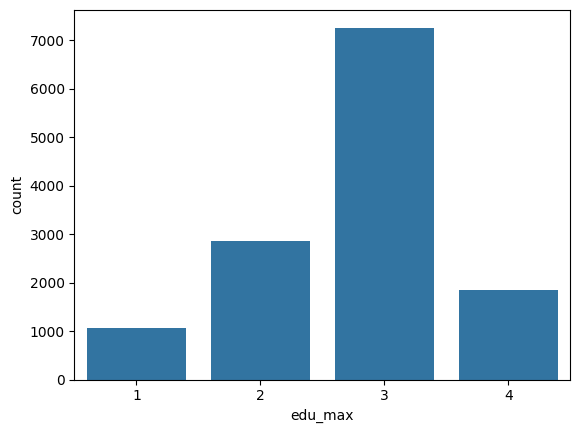

In [385]:
sns.countplot(x='edu_max', data=df_cat)
plt.show()

## Loan_sub_type_1

In [386]:
df_cat['Loan_sub_type_1'].value_counts().sort_index(ascending=True)

Loan_sub_type_1
Builder Ready        4464
Builder UNC          3638
Others+P_Cons         458
Resale Ready         2792
Self Construction    1681
Name: count, dtype: int64

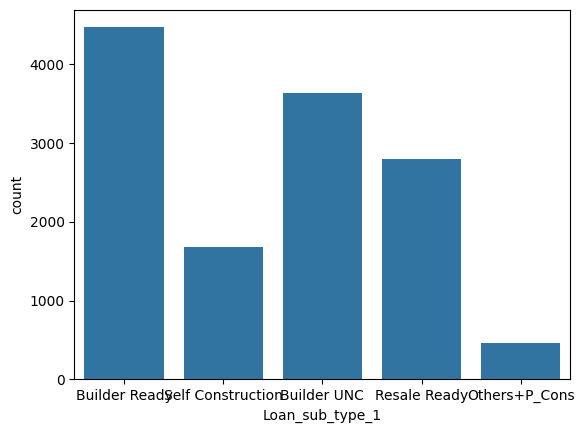

In [387]:
sns.countplot(x='Loan_sub_type_1', data=df_cat)
plt.show()

## City_tier

In [388]:
df_cat['City_tier'].value_counts().sort_index(ascending=True)

City_tier
1    4283
2    6575
3    2175
Name: count, dtype: int64

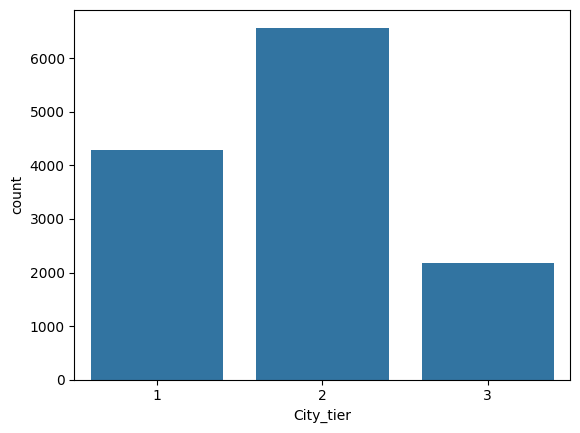

In [389]:
sns.countplot(x='City_tier', data=df_cat)
plt.show()

## Latest_Bureau_prd

* Indicates the most recent type of credit account a borrower has opened or held, as reported by a credit bureau.

In [390]:
df_cat['Latest_Bureau_prd'].value_counts()

Latest_Bureau_prd
CL        2854
CC        2778
TWL       1822
GL        1213
AL         984
Others     975
PL         944
HL         677
BL_PSL     486
BL         222
OD/EL       58
LAS         20
Name: count, dtype: int64

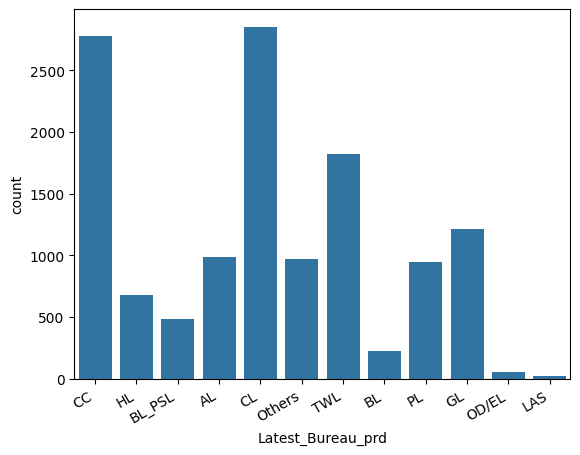

In [391]:
sns.countplot(x='Latest_Bureau_prd', data=df_cat)
plt.xticks(rotation=30, ha='right')
plt.show()

In [392]:
(df_cat['Latest_Bureau_prd'].isin(['CC', 'CL', 'TWL', 'GL', 'AL'])).sum()

9651

In [393]:
(df_cat['Latest_Bureau_prd'].isin(['Others', 'PL', 'HL', 'BL_PSL', 'BL', 'OD/EL', 'LAS'])).sum()

3382

> We can see here that **74%** of total values of the feature are dominated by these five viz. `CC`, `CL`, `TWL`, `GL`, `AL`

> There is another feature similar to `Latest_Bureau_prd`
>
> Now let us analyse the feature `Bureau_TL`

## Bureau_TL

In [394]:
df_cat['Bureau_TL'].value_counts().sort_index()

Bureau_TL
10.<36 Others       2266
11.>36 CC            382
12.>36 PL TWL GL     999
13.>36 Others        950
2.<6 CC              829
3.<6 PL              234
4.<6 BL CL Oth      1391
5.<6 Others         1054
6.<36 PL             508
7.<36 AL HL LAS      977
8.<36 TWL GL        1876
9.<36 CC            1567
Name: count, dtype: int64

> The values of `Bureau_TL` are divided into three :-
>
> * The **first** numeric suggests the credit bureau entries the borrower has
> * The **second** numeric preceeded by the signs `<` & `>` indicates the age of the oldest entry in months
> * The **third** is the type of credit accounts included in the bureau entries, separated by spaces
>
> We can seperate these into three different features and perform some analysis and find out if these hold any significance

### No_of_Bureau_TL

In [395]:
# Separate the numeric part and the category part
df_cat[['No_of_Bureau_TL', 'Bureau_TL_Cat']] = df_cat['Bureau_TL'].str.split('.', expand=True)

> Let us check out the `No_of_Bureau_TL` feature.

In [396]:
df_cat['No_of_Bureau_TL'].value_counts()#.sort_index()

No_of_Bureau_TL
10    2266
8     1876
9     1567
4     1391
5     1054
12     999
7      977
13     950
2      829
6      508
11     382
3      234
Name: count, dtype: int64

In [397]:
df_cat['No_of_Bureau_TL'].value_counts()[:5].sum()

8154

In [398]:
df_cat['No_of_Bureau_TL'].unique()

array(['2', '7', '12', '13', '11', '10', '9', '4', '8', '6', '5', '3'],
      dtype=object)

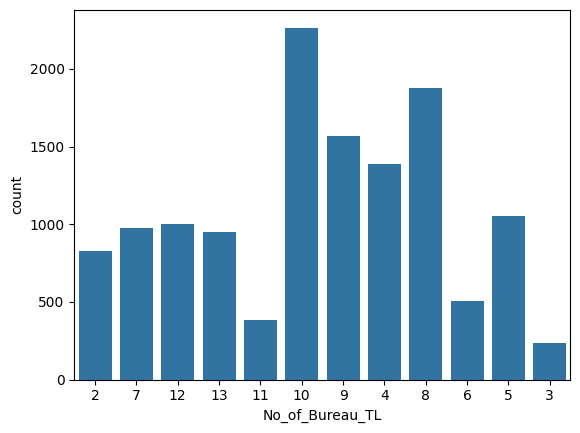

In [399]:
sns.countplot(x='No_of_Bureau_TL', data=df_cat)#, order=df_cat['No_of_Bureau_TL'].value_counts().sort_index().index)
#plt.xticks(rotation=30, ha='right')
plt.show()

In [400]:
# Dropping the feature not needed
df_cat.drop(['Bureau_TL_Cat'], axis=1, inplace=True)

### Tenure_of_Bureau_TL

> Creating the **Tenure** feature

In [401]:
# Tenure values from the Bureau_TL feature

df_cat['tenure'] = df_cat['Bureau_TL'].str.extract(r'(\d+\.[<>]?\d+)')

df_cat['Tenure_of_Bureau_TL'] = df_cat['tenure'].str.extract(r'([<>]\d+)')

In [402]:
# Mapping the Tenure_of_Bureau_TL feature

tenure_map = {
    '<6': 'Less than half year',
    '<36': 'Less than 3 years',
    '>36': 'More than 3 years',
}

df_cat['Tenure_of_Bureau_TL'] = df_cat['Tenure_of_Bureau_TL'].map(tenure_map)

In [403]:
df_cat['Tenure_of_Bureau_TL'].value_counts()

Tenure_of_Bureau_TL
Less than 3 years      7194
Less than half year    3508
More than 3 years      2331
Name: count, dtype: int64

In [404]:
# Dropping the feature not needed
df_cat.drop(['tenure',], axis=1, inplace=True)

### Bureau_TL_cat

In [405]:
# Extract only the words from 'Bureau_TL' column
import re

df_cat['Bureau_TL_cat'] = df_cat['Bureau_TL'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [406]:
df_cat['Bureau_TL_cat'].value_counts()

Bureau_TL_cat
 Others       4270
 CC           2778
 TWL GL       1876
 BL CL Oth    1391
 PL TWL GL     999
 AL HL LAS     977
 PL            742
Name: count, dtype: int64

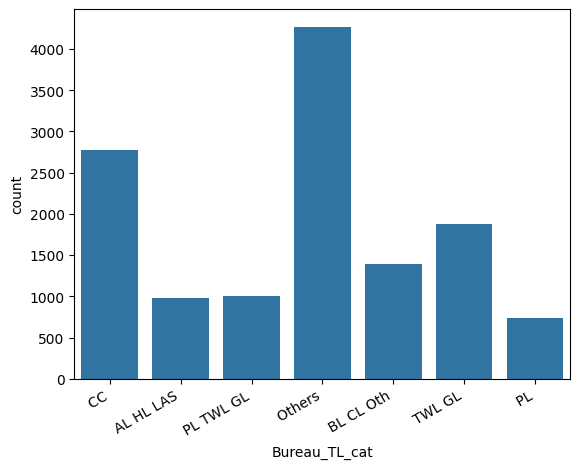

In [407]:
sns.countplot(x='Bureau_TL_cat', data=df_cat)
plt.xticks(rotation=30, ha='right')
plt.show()

### Analysis of the features

#### Latest_Bureau_prd, No_of_Bureau_TL, Tenure_of_Bureau_TL, Bureau_TL_cat

In [408]:
df_cat['Bureau_TL_cat'].nunique()

7

In [409]:
pd.crosstab(df_cat['Latest_Bureau_prd'], [df_cat['No_of_Bureau_TL'], df_cat['Tenure_of_Bureau_TL'], df_cat['Bureau_TL_cat']])

No_of_Bureau_TL                    10                11                12  \
Tenure_of_Bureau_TL Less than 3 years More than 3 years More than 3 years   
Bureau_TL_cat                  Others                CC         PL TWL GL   
Latest_Bureau_prd                                                           
AL                                  0                 0                 0   
BL                                122                 0                 0   
BL_PSL                              0                 0               105   
CC                                  0               382                 0   
CL                               1697                 0                 0   
GL                                  0                 0                57   
HL                                  0                 0                 0   
LAS                                 0                 0                 0   
OD/EL                              13                 0                 0   
Others                            434                 0                 0   
PL                                  0                 0               202   
TWL                                 0                 0               635   

No_of_Bureau_TL                    13                   2                   3  \
Tenure_of_Bureau_TL More than 3 years Less than half year Less than half year   
Bureau_TL_cat                  Others                  CC                  PL   
Latest_Bureau_prd                                                               
AL                                266                   0                   0   
BL                                 45                   0                   0   
BL_PSL                              0                   0                   0   
CC                                  0                 829                   0   
CL                                201                   0                   0   
GL                                  0                   0                   0   
HL                                230                   0                   0   
LAS                                 3                   0                   0   
OD/EL                              44                   0                   0   
Others                            161                   0                   0   
PL                                  0                   0                 234   
TWL                                 0                   0                   0   

No_of_Bureau_TL                       4                   5                 6  \
Tenure_of_Bureau_TL Less than half year Less than half year Less than 3 years   
Bureau_TL_cat                 BL CL Oth              Others                PL   
Latest_Bureau_prd                                                               
AL                                    0                 128                 0   
BL                                   55                   0                 0   
BL_PSL                                0                 150                 0   
CC                                    0                   0                 0   
CL                                  956                   0                 0   
GL                                    0                 524                 0   
HL                                    0                  74                 0   
LAS                                   0                   3                 0   
OD/EL                                 0                   1                 0   
Others                              380                   0                 0   
PL                                    0                   0               508   
TWL                                   0                 174                 0   

No_of_Bureau_TL                     7                 8                 9  
Tenure_of_Bureau_TL Less than 3 years Less than 3 years Less than 3 years  
Bureau_TL_cat        

In [410]:
pd.crosstab(df_cat['Tenure_of_Bureau_TL'], df_cat['Latest_Bureau_prd'])

Latest_Bureau_prd     AL   BL  BL_PSL    CC    CL   GL   HL  LAS  OD/EL  \
Tenure_of_Bureau_TL                                                       
Less than 3 years    590  122     231  1567  1697  632  373   14     13   
Less than half year  128   55     150   829   956  524   74    3      1   
More than 3 years    266   45     105   382   201   57  230    3     44   

Latest_Bureau_prd    Others   PL   TWL  
Tenure_of_Bureau_TL                     
Less than 3 years       434  508  1013  
Less than half year     380  234   174  
More than 3 years       161  202   635

In [411]:
pd.crosstab(df_cat['Tenure_of_Bureau_TL'], df_cat['Bureau_TL_cat'])

Bureau_TL_cat         AL HL LAS   BL CL Oth    CC   Others   PL   PL TWL GL  \
Tenure_of_Bureau_TL                                                           
Less than 3 years           977           0  1567     2266  508           0   
Less than half year           0        1391   829     1054  234           0   
More than 3 years             0           0   382      950    0         999   

Bureau_TL_cat         TWL GL  
Tenure_of_Bureau_TL           
Less than 3 years       1876  
Less than half year        0  
More than 3 years          0

In [412]:
pd.crosstab(df_cat['No_of_Bureau_TL'], df_cat['Bureau_TL_cat'])

Bureau_TL_cat     AL HL LAS   BL CL Oth    CC   Others   PL   PL TWL GL  \
No_of_Bureau_TL                                                           
10                        0           0     0     2266    0           0   
11                        0           0   382        0    0           0   
12                        0           0     0        0    0         999   
13                        0           0     0      950    0           0   
2                         0           0   829        0    0           0   
3                         0           0     0        0  234           0   
4                         0        1391     0        0    0           0   
5                         0           0     0     1054    0           0   
6                         0           0     0        0  508           0   
7                       977           0     0        0    0           0   
8                         0           0     0        0    0           0   
9                         0           0  1567        0    0           0   

Bureau_TL_cat     TWL GL  
No_of_Bureau_TL           
10                     0  
11                     0  
12                     0  
13                     0  
2                      0  
3                      0  
4                      0  
5                      0  
6                      0  
7                      0  
8                   1876  
9                      0

In [413]:
pd.crosstab(df_cat['Latest_Bureau_prd'], df_cat['Bureau_TL_cat'])

Bureau_TL_cat       AL HL LAS   BL CL Oth    CC   Others   PL   PL TWL GL  \
Latest_Bureau_prd                                                           
AL                        590           0     0      394    0           0   
BL                          0          55     0      167    0           0   
BL_PSL                      0           0     0      150    0         105   
CC                          0           0  2778        0    0           0   
CL                          0         956     0     1898    0           0   
GL                          0           0     0      524    0          57   
HL                        373           0     0      304    0           0   
LAS                        14           0     0        6    0           0   
OD/EL                       0           0     0       58    0           0   
Others                      0         380     0      595    0           0   
PL                          0           0     0        0  742         202   
TWL                         0           0     0      174    0         635   

Bureau_TL_cat       TWL GL  
Latest_Bureau_prd           
AL                       0  
BL                       0  
BL_PSL                 231  
CC                       0  
CL                       0  
GL                     632  
HL                       0  
LAS                      0  
OD/EL                    0  
Others                   0  
PL                       0  
TWL                   1013

In [414]:
# Replacing the values of No_of_Bureau_TL for simplicity

df_cat['No_of_Bureau_TL'] = df_cat['No_of_Bureau_TL'].map({'10': 1, '8': 1, '9': 1, '4': 1, '5': 1,
                                                           '12': 2, '7': 2, '13': 2,
                                                           '2': 3, '6': 3, '11': 3, '3': 3})

In [415]:
df_cat['No_of_Bureau_TL'].unique()

array([3, 2, 1], dtype=int64)

In [416]:
df_cat['No_of_Bureau_TL'].value_counts()

No_of_Bureau_TL
1    8154
2    2926
3    1953
Name: count, dtype: int64

In [417]:
# Replacing the values for simplicity

mapping = {
    ' CC': 1,
    ' AL HL LAS': 1,
    ' PL TWL GL': 2,
    ' Others': 3,
    ' BL CL Oth': 1,
    ' TWL GL': 2,
    ' PL': 2,
}

df_cat['Bureau_TL_cat'] = df_cat['Bureau_TL_cat'].replace(mapping)

In [418]:
df_cat['Bureau_TL_cat'].value_counts().sort_index(ascending=True)

Bureau_TL_cat
1    5146
2    3617
3    4270
Name: count, dtype: int64

In [419]:
pd.crosstab(df_cat['Tenure_of_Bureau_TL'], [df_cat['Bureau_TL_cat'], df_cat['No_of_Bureau_TL']])

Bureau_TL_cat           1               2               3     
No_of_Bureau_TL         1    2    3     1    2    3     1    2
Tenure_of_Bureau_TL                                           
Less than 3 years    1567  977    0  1876    0  508  2266    0
Less than half year  1391    0  829     0    0  234  1054    0
More than 3 years       0    0  382     0  999    0     0  950

* These features are better from the EDA perspective.
* Dropping these features from the final dataset.

## Dropping features

In [420]:
df_cat.shape

(13033, 34)

In [421]:
#df_cat.head()

In [422]:
# Dropping features
df_cat.drop(['Open_TLs','Max_dependent','No_of_enq_All','All_Delinquent_TL_24M',
             'Latest_Bureau_prd','Bureau_TL','All_TLs','no_of_years1','no_of_years_min1',
             'no_of_years_min', 'no_of_years', 'Latest_Bureau_prd', 'Bureau_TL', 'No_of_Bureau_TL',
             'Tenure_of_Bureau_TL',	'Bureau_TL_cat', 'income_cat2'], axis=1, inplace=True)

In [423]:
df_cat.shape

(13033, 19)

# Label Encoding the categorical features

In [424]:
df_cat.columns

Index(['Sal_Flag', 'Organization_type', 'Salaried_Self', 'Status',
       'Loan_sub_type_1', 'count_coapplicant', 'edu_min', 'edu_max',
       'Doc_form_16', 'Pprty_Ins_Amt_cat', 'Channel_Code', 'City_tier',
       'All_enq_bins', 'All_Delq_TL', 'no_of_years_bins',
       'no_of_years_min_bins', 'All_no_of_loans', 'Active_loans',
       'Dependent_bins'],
      dtype='object')

In [425]:
for i in df_cat.columns:
    print(df_cat[i].value_counts().sort_index())

Sal_Flag
NONSAL    5947
SAL       7086
Name: count, dtype: int64
Organization_type
1.Others             1009
2.Govt               1279
3.Private Ltd Co     9855
4.Public Ltd. Co.     749
5.MNC                 141
Name: count, dtype: int64
Salaried_Self
OTHERS        66
SALARIED    7086
SELF_EMP    5881
Name: count, dtype: int64
Status
0      939
1    12094
Name: count, dtype: int64
Loan_sub_type_1
Builder Ready        4464
Builder UNC          3638
Others+P_Cons         458
Resale Ready         2792
Self Construction    1681
Name: count, dtype: int64
count_coapplicant
0       80
1    12444
2      509
Name: count, dtype: int64
edu_min
1    2508
2    4777
3    5300
4     448
Name: count, dtype: int64
edu_max
1    1062
2    2853
3    7264
4    1854
Name: count, dtype: int64
Doc_form_16
0    9427
1    3606
Name: count, dtype: int64
Pprty_Ins_Amt_cat
Insured        8002
Not Insured    5031
Name: count, dtype: int64
Channel_Code
1    6030
2    4067
3    2090
4     846
Name: count, dtype: int

In [426]:
for i in df_cat.columns:
    print(df_cat[i].value_counts().sort_index())

Sal_Flag
NONSAL    5947
SAL       7086
Name: count, dtype: int64
Organization_type
1.Others             1009
2.Govt               1279
3.Private Ltd Co     9855
4.Public Ltd. Co.     749
5.MNC                 141
Name: count, dtype: int64
Salaried_Self
OTHERS        66
SALARIED    7086
SELF_EMP    5881
Name: count, dtype: int64
Status
0      939
1    12094
Name: count, dtype: int64
Loan_sub_type_1
Builder Ready        4464
Builder UNC          3638
Others+P_Cons         458
Resale Ready         2792
Self Construction    1681
Name: count, dtype: int64
count_coapplicant
0       80
1    12444
2      509
Name: count, dtype: int64
edu_min
1    2508
2    4777
3    5300
4     448
Name: count, dtype: int64
edu_max
1    1062
2    2853
3    7264
4    1854
Name: count, dtype: int64
Doc_form_16
0    9427
1    3606
Name: count, dtype: int64
Pprty_Ins_Amt_cat
Insured        8002
Not Insured    5031
Name: count, dtype: int64
Channel_Code
1    6030
2    4067
3    2090
4     846
Name: count, dtype: int

## Converting all the features to `object`

In [427]:
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype('object')

In [428]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13033 entries, 0 to 13408
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sal_Flag              13033 non-null  object
 1   Organization_type     13033 non-null  object
 2   Salaried_Self         13033 non-null  object
 3   Status                13033 non-null  object
 4   Loan_sub_type_1       13033 non-null  object
 5   count_coapplicant     13033 non-null  object
 6   edu_min               13033 non-null  object
 7   edu_max               13033 non-null  object
 8   Doc_form_16           13033 non-null  object
 9   Pprty_Ins_Amt_cat     13033 non-null  object
 10  Channel_Code          13033 non-null  object
 11  City_tier             13033 non-null  object
 12  All_enq_bins          13033 non-null  object
 13  All_Delq_TL           13033 non-null  object
 14  no_of_years_bins      13033 non-null  object
 15  no_of_years_min_bins  13033 non-null  obj

## Label Encoding

In [429]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_cat.columns:
    df_cat[i] = le.fit_transform(df_cat[i])

In [430]:
df_cat.head()

Sal_Flag  Organization_type  Salaried_Self  Status  Loan_sub_type_1  \
0         1                  2              1       1                0   
1         0                  2              2       1                4   
2         0                  2              2       1                4   
3         1                  0              1       1                1   
4         1                  2              1       1                0   

   count_coapplicant  edu_min  edu_max  Doc_form_16  Pprty_Ins_Amt_cat  \
0                  1        1        2            0                  0   
1                  1        2        2            0                  0   
2                  1        2        2            0                  0   
3                  1        2        2            0                  0   
4                  1        2        2            0                  1   

   Channel_Code  City_tier  All_enq_bins  All_Delq_TL  no_of_years_bins  \
0             1          0             3            1                 2   
1             1          2             2            0                 3   
2             0          2             0            1                 2   
3             1          0             0            1                 4   
4             2          0             0            1                 3   

   no_of_years_min_bins  All_no_of_loans  Active_loans  Dependent_bins  
0                     0                2             2               0  
1                     1                2             1               2  
2                     2                1             2               3  
3                     4                1             1               0  
4                     4                0             0               1

In [431]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13033 entries, 0 to 13408
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sal_Flag              13033 non-null  int32
 1   Organization_type     13033 non-null  int32
 2   Salaried_Self         13033 non-null  int32
 3   Status                13033 non-null  int32
 4   Loan_sub_type_1       13033 non-null  int32
 5   count_coapplicant     13033 non-null  int32
 6   edu_min               13033 non-null  int32
 7   edu_max               13033 non-null  int32
 8   Doc_form_16           13033 non-null  int32
 9   Pprty_Ins_Amt_cat     13033 non-null  int32
 10  Channel_Code          13033 non-null  int32
 11  City_tier             13033 non-null  int32
 12  All_enq_bins          13033 non-null  int32
 13  All_Delq_TL           13033 non-null  int32
 14  no_of_years_bins      13033 non-null  int32
 15  no_of_years_min_bins  13033 non-null  int32
 16  All_no_of

# Feature Selection of categorical features

* Let us use `chi2-Test` for the selection of the categorical features considered for model building.

In [432]:
from sklearn.feature_selection import chi2

In [433]:
cat1 = list(df_cat.columns)

In [434]:
len(cat1)

19

In [435]:
print(cat1)

['Sal_Flag', 'Organization_type', 'Salaried_Self', 'Status', 'Loan_sub_type_1', 'count_coapplicant', 'edu_min', 'edu_max', 'Doc_form_16', 'Pprty_Ins_Amt_cat', 'Channel_Code', 'City_tier', 'All_enq_bins', 'All_Delq_TL', 'no_of_years_bins', 'no_of_years_min_bins', 'All_no_of_loans', 'Active_loans', 'Dependent_bins']


In [436]:
df_cat[cat1].head()

Sal_Flag  Organization_type  Salaried_Self  Status  Loan_sub_type_1  \
0         1                  2              1       1                0   
1         0                  2              2       1                4   
2         0                  2              2       1                4   
3         1                  0              1       1                1   
4         1                  2              1       1                0   

   count_coapplicant  edu_min  edu_max  Doc_form_16  Pprty_Ins_Amt_cat  \
0                  1        1        2            0                  0   
1                  1        2        2            0                  0   
2                  1        2        2            0                  0   
3                  1        2        2            0                  0   
4                  1        2        2            0                  1   

   Channel_Code  City_tier  All_enq_bins  All_Delq_TL  no_of_years_bins  \
0             1          0             3            1                 2   
1             1          2             2            0                 3   
2             0          2             0            1                 2   
3             1          0             0            1                 4   
4             2          0             0            1                 3   

   no_of_years_min_bins  All_no_of_loans  Active_loans  Dependent_bins  
0                     0                2             2               0  
1                     1                2             1               2  
2                     2                1             2               3  
3                     4                1             1               0  
4                     4                0             0               1

## Calculating the p-values of all the features

In [437]:
# Creating a dataframe
resultant = pd.DataFrame(data=[(0 for i in range(len(df_cat[cat1].columns))) for i in range(len(df_cat[cat1].columns))],
                         columns=list(df_cat[cat1].columns))
# Indexing
resultant.set_index(pd.Index(list(df_cat[cat1].columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df_cat[cat1].columns):
    for j in list(df_cat[cat1].columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df_cat[cat1][i]).reshape(-1, 1), np.array(df_cat[cat1][j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val

In [438]:
resultant

Sal_Flag  Organization_type  Salaried_Self  \
Sal_Flag              0.000000e+00      1.888991e-210   0.000000e+00   
Organization_type     9.375871e-01       0.000000e+00   1.309740e-07   
Salaried_Self         0.000000e+00       2.789037e-76   0.000000e+00   
Status                1.268333e-02       9.482309e-01   4.367092e-02   
Loan_sub_type_1       3.133286e-14       3.089525e-26   1.758456e-13   
count_coapplicant     5.135713e-01       9.993275e-01   7.067097e-01   
edu_min               1.613866e-22       8.485007e-05   1.686789e-21   
edu_max               3.626193e-53       1.944572e-10   3.107579e-52   
Doc_form_16           4.359528e-09       1.335145e-01   5.099298e-09   
Pprty_Ins_Amt_cat     4.504512e-01       1.065709e-03   7.517049e-01   
Channel_Code          3.548555e-02       1.275364e-02   1.095780e-01   
City_tier             3.988807e-08       8.507423e-06   2.353198e-07   
All_enq_bins          7.305425e-04       2.896981e-04   3.187301e-03   
All_Delq_TL           6.021551e-01       7.281747e-01   8.175145e-01   
no_of_years_bins      6.711190e-01       4.735508e-03   1.123313e-01   
no_of_years_min_bins  4.622861e-18       6.236633e-15   3.781262e-17   
All_no_of_loans       7.665520e-07       3.609229e-08   2.846035e-06   
Active_loans          1.842124e-17       8.491648e-14   1.945232e-16   
Dependent_bins        1.171646e-19       5.882543e-09   2.331590e-19   

                            Status  Loan_sub_type_1  count_coapplicant  \
Sal_Flag              3.547202e-10     2.834233e-15       4.347912e-02   
Organization_type     1.278381e-01     1.176861e-02       7.639159e-01   
Salaried_Self         2.489558e-04     1.344249e-05       2.048208e-01   
Status                0.000000e+00     7.878069e-01       8.248874e-01   
Loan_sub_type_1       4.042826e-08     0.000000e+00       6.575568e-13   
count_coapplicant     7.920775e-01     4.341914e-01       0.000000e+00   
edu_min               2.121911e-01     4.770135e-06       6.261306e-17   
edu_max               1.022652e-01     1.877090e-01       1.226530e-03   
Doc_form_16           7.974421e-03     7.955126e-61       6.533846e-16   
Pprty_Ins_Amt_cat     4.961222e-03     2.016628e-03       2.667045e-02   
Channel_Code          4.118472e-01     2.938246e-44       8.898177e-01   
City_tier             2.672449e-02    3.139105e-121       3.841498e-02   
All_enq_bins          1.409403e-04     5.904426e-27       9.620655e-01   
All_Delq_TL           9.301853e-10     9.237881e-01       6.531349e-01   
no_of_years_bins      9.845411e-01     1.673427e-04       5.873342e-01   
no_of_years_min_bins  7.599319e-15     8.375681e-06       1.216524e-02   
All_no_of_loans       2.069522e-17     4.685953e-27       1.486355e-01   
Active_loans          1.406520e-14     7.612360e-08       5.214633e-02   
Dependent_bins        1.730706e-01     5.526670e-36       3.881818e-04   

                           edu_min       edu_max   Doc_form_16  \
Sal_Flag              9.764900e-31  5.256578e-74  3.127657e-06   
Organization_type     2.916543e-01  8.160938e-02  4.870864e-01   
Salaried_Self         9.925602e-12  9.140897e-28  2.194562e-03   
Status                9.648597e-01  8.859307e-01  4.023948e-01   
Loan_sub_type_1       1.030126e-27  2.866591e-21  1.652564e-54   
count_coapplicant     7.907839e-02  6.486658e-01  4.656513e-02   
edu_min               0.000000e+00  0.000000e+00  8.042378e-29   
edu_max               0.000000e+00  0.000000e+00  1.027115e-12   
Doc_form_16           5.809077e-39  3.355745e-23  0.000000e+00   
Pprty_Ins_Amt_cat     2.442622e-02  4.717908e-03  1.915316e-11   
Channel_Code          1.176138e-08  1.693264e-06  2.451588e-05   
City_tier             2.586262e-13  1.798999e-10  1.189969e-28   
All_enq_bins          4.408465e-07  9.158770e-14  2.444907e-18   
All_Delq_TL           1.385839e-01  3.355663e-01  4.920234e-01   
no_of_years_bins      3.708442e-15  1.766462e-08  1.985133e-12   
no_of_years_min_bins  9.552862e-04  2.175924e-05

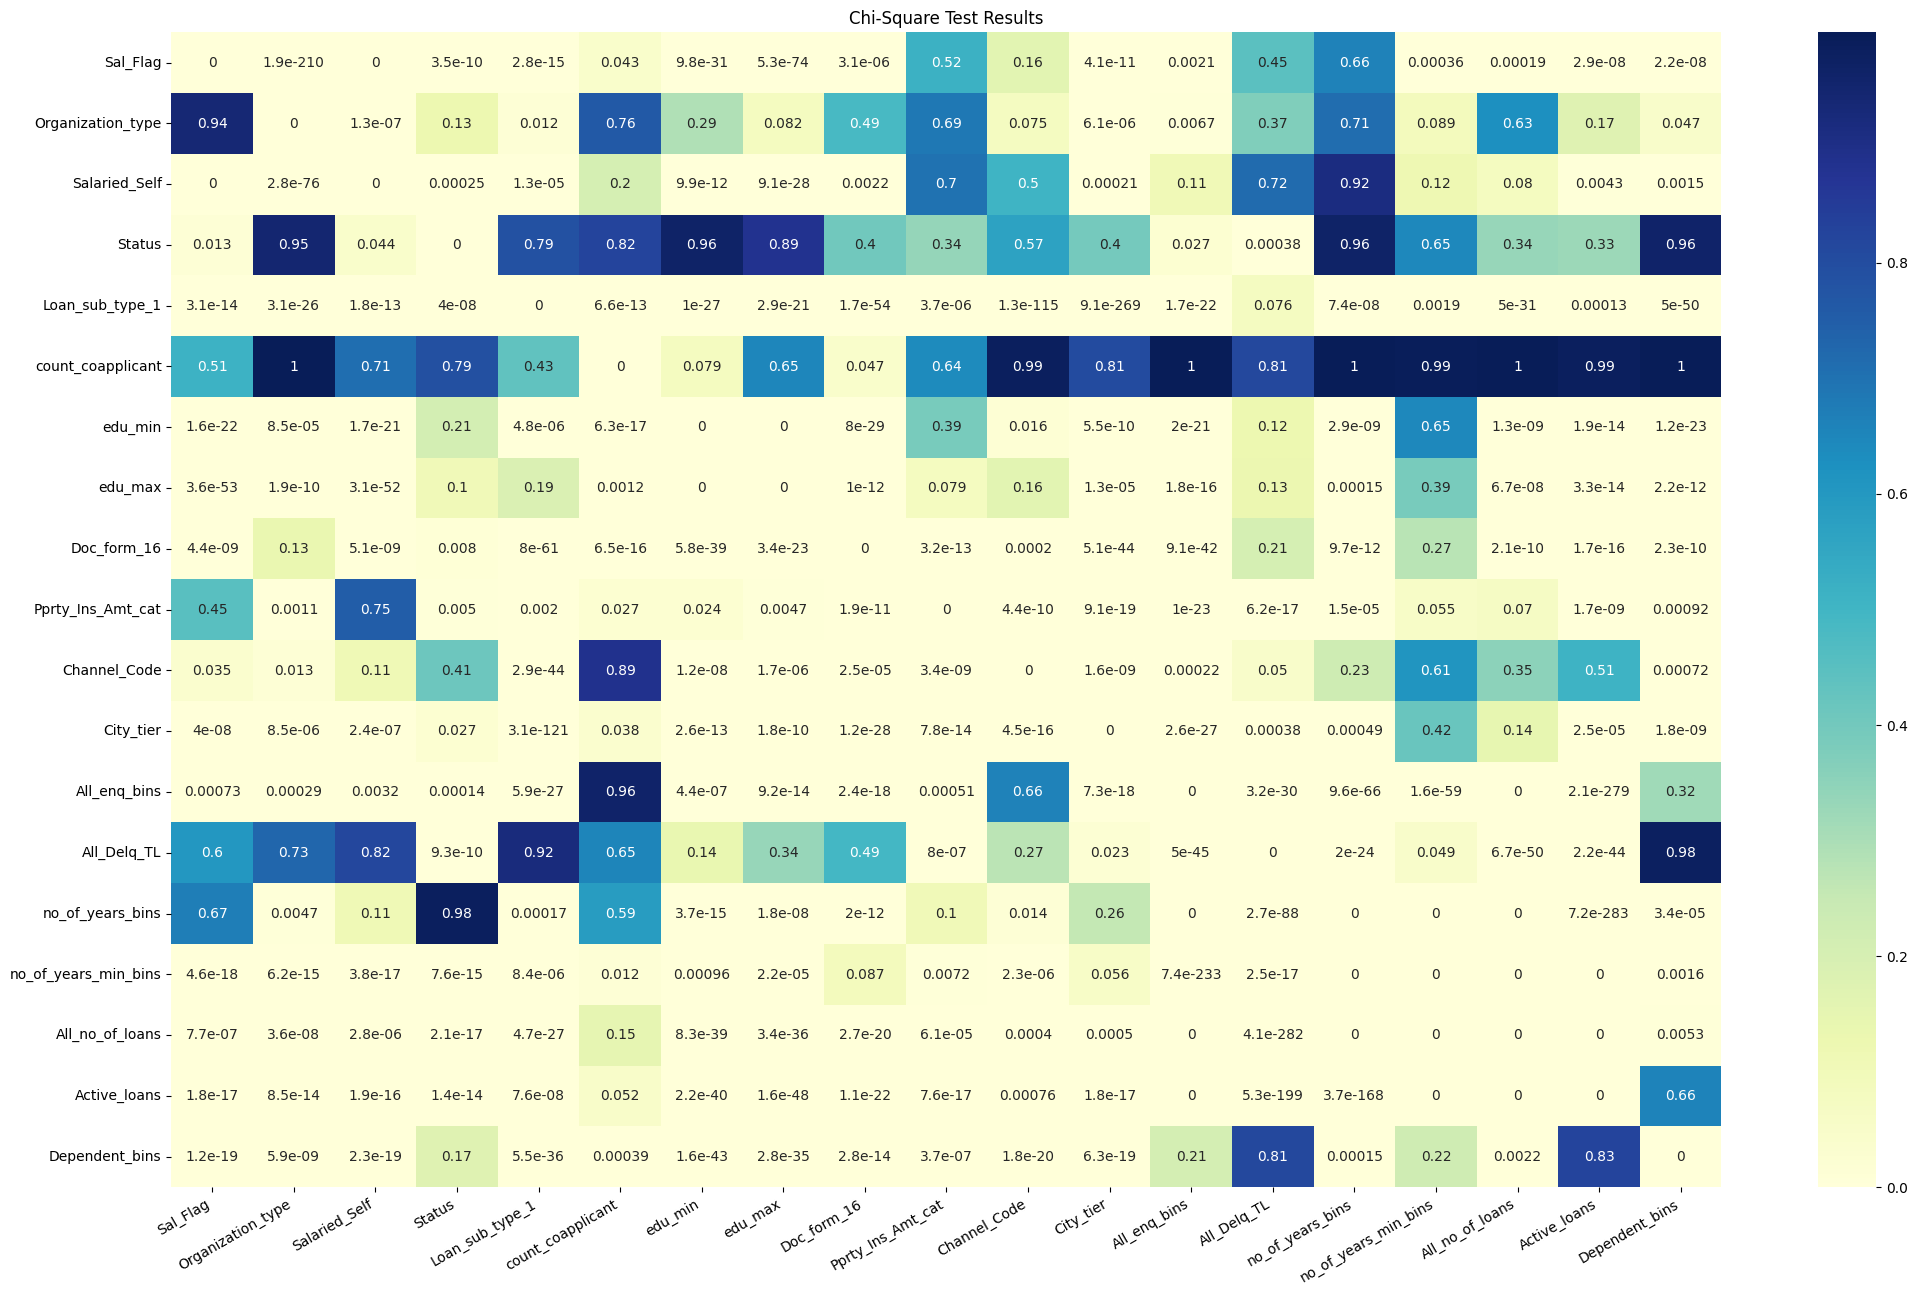

In [439]:
# Plotting a heatmap
fig = plt.figure(figsize=(25,15))
sns.heatmap(resultant, annot=True, cmap='YlGnBu')
plt.title('Chi-Square Test Results')
plt.xticks(rotation=30, ha='right')
plt.show()

## Checking significance w.r.t. `Status`

In [440]:
cat2 = cat1.remove('Status')

In [441]:
print(cat1)

['Sal_Flag', 'Organization_type', 'Salaried_Self', 'Loan_sub_type_1', 'count_coapplicant', 'edu_min', 'edu_max', 'Doc_form_16', 'Pprty_Ins_Amt_cat', 'Channel_Code', 'City_tier', 'All_enq_bins', 'All_Delq_TL', 'no_of_years_bins', 'no_of_years_min_bins', 'All_no_of_loans', 'Active_loans', 'Dependent_bins']


In [442]:
fpvalues = chi2(df_cat[cat1], df_cat['Status'])

In [443]:
pval = fpvalues[1]

In [444]:
# Storing the important features in a list
feature_imp = []

for i, j in  zip(cat1, pval):
    if j < 0.05:
        print(i,':', j, ':', '\nThis feature has a relationship with the target feature.\n')
        feature_imp.append(i)
    else:
        print(i, ':', j, '''\nIt doesn't have a relationship with the target feature.\n''')

Sal_Flag : 3.547201881798631e-10 : 
This feature has a relationship with the target feature.

Organization_type : 0.1278381166147699 
It doesn't have a relationship with the target feature.

Salaried_Self : 0.00024895584254775105 : 
This feature has a relationship with the target feature.

Loan_sub_type_1 : 4.0428255528740414e-08 : 
This feature has a relationship with the target feature.

count_coapplicant : 0.7920775282825256 
It doesn't have a relationship with the target feature.

edu_min : 0.21219111851546787 
It doesn't have a relationship with the target feature.

edu_max : 0.10226521299685673 
It doesn't have a relationship with the target feature.

Doc_form_16 : 0.00797442057824977 : 
This feature has a relationship with the target feature.

Pprty_Ins_Amt_cat : 0.0049612217027095295 : 
This feature has a relationship with the target feature.

Channel_Code : 0.4118471565461326 
It doesn't have a relationship with the target feature.

City_tier : 0.026724488081876874 : 
This fea

In [445]:
feature_imp

['Sal_Flag',
 'Salaried_Self',
 'Loan_sub_type_1',
 'Doc_form_16',
 'Pprty_Ins_Amt_cat',
 'City_tier',
 'All_enq_bins',
 'All_Delq_TL',
 'no_of_years_min_bins',
 'All_no_of_loans',
 'Active_loans']

In [446]:
len(feature_imp)

11

## Visualising the feature importance

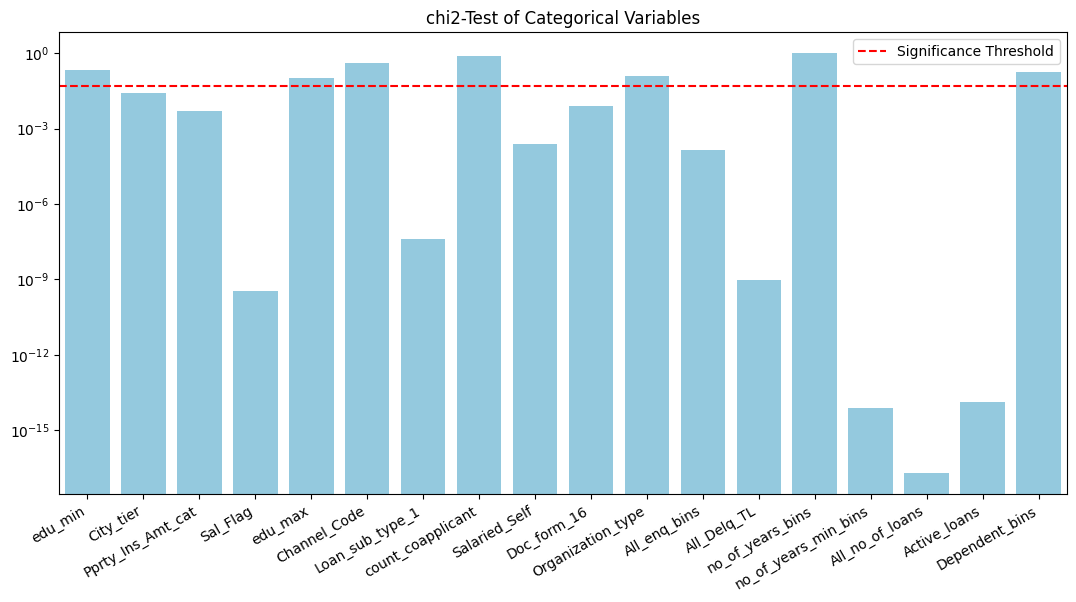

In [447]:
feat = ['edu_min', 'City_tier', 'Pprty_Ins_Amt_cat', 'Sal_Flag', 'edu_max',
        'Channel_Code', 'Loan_sub_type_1', 'count_coapplicant', 'Salaried_Self', 'Doc_form_16',
        'Organization_type', 'All_enq_bins', 'All_Delq_TL', 'no_of_years_bins', 'no_of_years_min_bins',
        'All_no_of_loans', 'Active_loans', 'Dependent_bins']

p_values_chi = [
    0.21163672539898679, 0.026755639694650578, 0.004936373841957096, 3.5833366171318494e-10, 0.10179755672225899,
    0.41309674693927, 4.018541215533468e-08, 0.7921388003096066, 0.00025011417591121605, 0.007941930470623802,
    0.12776206384247657, 0.00013922592447911014, 9.272326916698532e-10, 0.9870882638272798, 7.713256107824183e-15,
    2.0118934747331662e-17, 1.3928792607205672e-14, 0.17221878651256703]

# Plotting
plt.figure(figsize=(13,6))

sns.barplot(x=feat, y=p_values_chi, color='skyblue')
plt.yscale('log')  # Log scale for better visualization of small p-values
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold')
#plt.xlabel('Numeric Variables')
#plt.ylabel('p-value (log scale)')
plt.title('chi2-Test of Categorical Variables')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.show()

# Final dataframe for model training

In [448]:
df_final.head()

LTV  Tenure_Years    EMI  income_sum_box Status
0  0.715563            20   5196        1.824110      1
1  0.544463            15  12511        1.828274      1
2  0.566012            20  11431        1.827793      1
3  0.536455            20  18920        1.829882      1
4  0.511949            27  10838        1.826468      1

In [449]:
df_cat = df_cat[feature_imp]

In [450]:
df_cat.head()

Sal_Flag  Salaried_Self  Loan_sub_type_1  Doc_form_16  Pprty_Ins_Amt_cat  \
0         1              1                0            0                  0   
1         0              2                4            0                  0   
2         0              2                4            0                  0   
3         1              1                1            0                  0   
4         1              1                0            0                  1   

   City_tier  All_enq_bins  All_Delq_TL  no_of_years_min_bins  \
0          0             3            1                     0   
1          2             2            0                     1   
2          2             0            1                     2   
3          0             0            1                     4   
4          0             0            1                     4   

   All_no_of_loans  Active_loans  
0                2             2  
1                2             1  
2                1             2  
3                1             1  
4                0             0

> **Concatinating** the two dataframes

In [451]:
final_df = pd.concat([df_cat, df_final], axis=1)

In [452]:
final_df.shape

(13033, 16)

In [453]:
final_df.head()

Sal_Flag  Salaried_Self  Loan_sub_type_1  Doc_form_16  Pprty_Ins_Amt_cat  \
0         1              1                0            0                  0   
1         0              2                4            0                  0   
2         0              2                4            0                  0   
3         1              1                1            0                  0   
4         1              1                0            0                  1   

   City_tier  All_enq_bins  All_Delq_TL  no_of_years_min_bins  \
0          0             3            1                     0   
1          2             2            0                     1   
2          2             0            1                     2   
3          0             0            1                     4   
4          0             0            1                     4   

   All_no_of_loans  Active_loans       LTV  Tenure_Years    EMI  \
0                2             2  0.715563            20   5196   
1                2             1  0.544463            15  12511   
2                1             2  0.566012            20  11431   
3                1             1  0.536455            20  18920   
4                0             0  0.511949            27  10838   

   income_sum_box Status  
0        1.824110      1  
1        1.828274      1  
2        1.827793      1  
3        1.829882      1  
4        1.826468      1

In [454]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13033 entries, 0 to 13408
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sal_Flag              13033 non-null  int32  
 1   Salaried_Self         13033 non-null  int32  
 2   Loan_sub_type_1       13033 non-null  int32  
 3   Doc_form_16           13033 non-null  int32  
 4   Pprty_Ins_Amt_cat     13033 non-null  int32  
 5   City_tier             13033 non-null  int32  
 6   All_enq_bins          13033 non-null  int32  
 7   All_Delq_TL           13033 non-null  int32  
 8   no_of_years_min_bins  13033 non-null  int32  
 9   All_no_of_loans       13033 non-null  int32  
 10  Active_loans          13033 non-null  int32  
 11  LTV                   13033 non-null  float64
 12  Tenure_Years          13033 non-null  int64  
 13  EMI                   13033 non-null  int64  
 14  income_sum_box        13033 non-null  float64
 15  Status                13

# Saving the final dataframe in `csv` for model training

In [457]:
#final_df.to_csv('Loan_Data_Preprocessed_Final.csv') # 13034
#final_df.to_csv('Loan_Data_Preprocessed_Final1.csv') # 13033